### 1) Concatenate Manual + API df's & Inspect Label Distributions

In [2]:
# load libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

In [110]:
df_gaza_israel_manual = pd.read_csv("../gaza_israel/Manual_data_collection/gaza_israel_manual_dataset_010724_300425.csv", index_col = 0)
df_gaza_israel_api = pd.read_csv("../gaza_israel/API_data_collection/API-fact-tools-google/gaza_israel_api_dataset_010724_300425.csv", index_col = 0)

print(f"Number of claims in manual gaza-israel df: {len(df_gaza_israel_manual)}")
print(f"Number of claims in api gaza-israel df: {len(df_gaza_israel_api)}")

print(f"\nColumn names in manual gaza-israel df: \n {df_gaza_israel_manual.columns}")
print(f"Column names in api gaza-israel df: \n {df_gaza_israel_api.columns}")

print(f"\nColumn data types in manual gaza-israel df: \n {df_gaza_israel_manual.dtypes}")
print(f"Column data types in api gaza-israel df: \n {df_gaza_israel_api.dtypes}")




Number of claims in manual gaza-israel df: 57
Number of claims in api gaza-israel df: 55

Column names in manual gaza-israel df: 
 Index(['id', 'Website', 'Article_URL', 'Headline', 'Claim_Date', 'Review_Date',
       'Query/Keyword', 'Label_Website', 'Image_URL', 'Original_Claim_Website',
       'Original_Claim_Only', 'Context/Label_Explanation', 'Text_Only_Claim',
       'Normal_Image', 'AI_Generated_Image', 'Altered_Image'],
      dtype='object')
Column names in api gaza-israel df: 
 Index(['id', 'Website', 'Article_URL', 'Headline', 'Claim_Date', 'Review_Date',
       'Query/Keyword', 'Label_Website', 'Image_URL', 'Original_Claim_Only',
       'Context/Label_Explanation', 'Text_Only_Claim', 'Normal_Image',
       'AI_Generated_Image', 'Altered_Image'],
      dtype='object')

Column data types in manual gaza-israel df: 
 id                            int64
Website                      object
Article_URL                  object
Headline                     object
Claim_Date          

## The only differences between df's:

- The manual_df has additional column "Original_Claim_Website", this will be filled with NaN values for the api claims in the concatenated final gaza-israel df 
- The columns for the claim types ("Text_Only_Claim", "Normal_Image", "AI_Generated_Image", "Altered_Image") have different data types: they are strings in the manual df ("Yes" or "No") and boolean values in the api df (True, False) -> making the manual df samples also boolean

## Steps that need to be done now:

### Before concatenation

1) Transforming the manual df samples claim types columns into boolean values
2) Removing the day time information from the "Claim/Review_Date" columns in the api df & transforming the "Claim_Date" and "Review_Date" columns into datetime data types 
3) Reindexing the api dataset, to have consistent values in "id" column -> starting with manual claims and then api claims

### Concatenation

4) Adding an identifier column, where each sample was collected manually or with the api
5) Concatenating the manual + api df's into one final df 

### After concatenation


6) Lowercasing the "Label_Website" column for consistent/comparable label values
7) Analyzing the label distribution


In [111]:
df_gaza_israel_manual.head()

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Website,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image
0,0,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.42JE3T2,False claims about US general being killed in Gaza spread online,2025-04-06,2025-04-17,Israeli-Palestinian conflict,FALSE,https://pbs.twimg.com/media/Gn4wjgBXoAALax1?format=jpg&name=medium,"""BREAKING: Reports confirm the death of General John Pagri, Commander of the Special Tasks Battalion in the U.S. Army, in the Gaza Strip,"" says an April 6, 2025 X post with more than 30,000 likes.","""BREAKING: Reports confirm the death of General John Pagri, Commander of the Special Tasks Battalion in the U.S. Army, in the Gaza Strip.""","A reverse image search reveals the photograph was uploaded to Wikimedia Commons, a website that collects free-use images, with a description that says that it was taken in 2007 in Iraq's Babil province (archived here). Wikimedia Commons credits a blog post from the US National Guard as the source of the image. While the site has since been deleted, an archived version available via the Internet Archive says that the men in the image are two sergeants named Robbie Doman and Christopher W. Sullenberger. Doman, standing in the middle of the photograph, received media coverage in 2017 when he appeared on the NBC television show ""American Ninja Warrior"" after being injured in an explosion in 2008 (archived here, and here). Several US media outlets published images of Doman from his service in Iraq, which are similar to those used in the social media posts (archived here).",No,Yes,No,No
1,1,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.39432WD,"Pictures show Gaza in ruins, not Myanmar quake damage",2025-03-29,2025-04-17,Israeli-Palestinian conflict,FALSE,https://web.archive.org/web/20250402070342im_/https://scontent-sjc3-1.xx.fbcdn.net/v/t39.30808-6/487419008_122233817522067190_5197398173696178365_n.jpg?stp=dst-jpg_s600x600_tt6&_nc_cat=108&ccb=1-7&_nc_sid=833d8c&_nc_ohc=Vrh6myPuQ6QQ7kNvgEk5XXK&_nc_oc=AdlUD89_DZpLh7YT1h3kFtbXsa5hjVVf72r_jD7lK9JlOF-ZbIpsMP742_7qAbGCwXM&_nc_zt=23&_nc_ht=scontent-sjc3-1.xx&_nc_gid=fSR43b_Iy30vsY8iyeCKXQ&oh=00_AYHnGD8C7-NR7_yARBjobfW6AGmcjuJ4rs3dDhokDkqldw&oe=67F29A7A,"""A 7.9-magnitude earthquake in Myanmar, devastation everywhere, everything in ruins,"" read part of a simplified Chinese caption of a Facebook post published March 29.","""A 7.9-magnitude earthquake in Myanmar, devastation everywhere, everything in ruins.""","However, a reverse image search for the first photo in the post led to a TikTok video shared February 20 by a user based in Gaza. The clip shows the same destroyed building (archived link). A photo from the Turkish Anadolu news agency shows the same scene. ""A view of the destruction in Jabalia camp after Israeli forces withdrew from the area following the ceasefire in Gaza on February 05, 2025,"" the caption says.",No,Yes,No,No
2,2,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.37W26WD,Image of 'Gazan mother with son's bones' is made with AI,2025-03-24,2025-03-27,Israeli-Palestinian conflict,FALSE,https://scontent-hou1-1.xx.fbcdn.net/v/t39.30808-6/486290815_1290888865331200_3774810229142652666_n.jpg?_nc_cat=108&ccb=1-7&_nc_sid=127cfc&_nc_ohc=dJB5KMYY-K8Q7kNvwG36ECt&_nc_oc=Adm1o8yPbYbSNkcgvalWokrqaqaaHITQDp4TW4yh1603BysZ0yTW6m3OzdfFRAcVyc0&_nc_zt=23&_nc_ht=scontent-hou1-1.xx&_nc_gid=7AoU9LU1o_p7jCObsgUWlQ&oh=00_AfH7GWH4PBqeBawSJ9_R87ZfrG1kYAoZjldaIHBiuECusg&oe=681E8A2A,"""A mother holds the bones of her son in Gaza. After more than a year and a half of searching for him under the rubble of their bombed-out house,"" reads a Malay-language Facebook post shared on March 24.","""A mother holds the bones of her son in Gaza. After more than a year and a half of searching for him under the rubble of their bombed-out house.""","A keyword search found a wider-angle version

In [112]:
df_gaza_israel_api.head() #ids need to be reindexed before concatenation

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image
1,1,misbar.com,https://www.misbar.com/en/factcheck/2025/04/13/contrary-trolls-baby-sham-lost-her-arm-and-died-israeli-airstrike,"Contrary to Trolls, Baby Sham Lost Her Arm and Died in Israeli Airstrike",2025-04-13T05:39:22Z,2025-04-13T05:39:22Z,Gaza,fake,https://pbs.twimg.com/media/GoQLcf6WUAAkeXV?format=jpg&name=medium,"Baby Sham did not lose her arm in an Israeli airstrike on the Shejaeya neighborhood, east of Gaza City.","Misbar’s investigative team spoke with Nahed Hajjaj, the original photographer of the widely shared photo showing Sham after her amputation. Hajjaj told Misbar he took the photo two days earlier at Al-Ahli Arab Baptist Hospital, where Sham was treated after an Israeli attack targeted her family’s house in the Shuja’iyya neighborhood. He confirmed that Sham lost her right arm and died the following day due to the severity of her injuries. Nahed also posted footage of baby Sham on his Instagram account two days ago, providing details about the Israeli airstrike that targeted her family.",False,True,False,False
3,3,newsmobile.in,https://www.newsmobile.in/nm-fact-checker/fact-check-this-picture-of-dog-holding-a-childs-body-is-from-bangladesh-not-gaza/,"Fact Check: This Picture Of Dog Holding A Child’s Body Is From Bangladesh, NOT Gaza",2024-12-30T00:00:00Z,2024-12-31T00:00:00Z,Gaza,False,https://scontent-cph2-1.xx.fbcdn.net/v/t39.30808-6/490831653_1358031626327521_2944457293246742450_n.jpg?_nc_cat=102&ccb=1-7&_nc_sid=833d8c&_nc_ohc=g9VbatabM0AQ7kNvwFk4Bk8&_nc_oc=AdmiWNNzFrYWqZhWDfYrS2jaarKZaZ4nkwT2IG8ywhY85-7lp1cAB3qi_-SoQYnrbwc&_nc_zt=23&_nc_ht=scontent-cph2-1.xx&_nc_gid=YMrknCTsIQnyAUAaSIkiug&oh=00_AfKNZimjK1cOf29uCMhvAKDS1l5cfmMbZhMYamHCh_jdMw&oe=682EB65C,picture of a dog holding an infant in his mouth is from Gaza,"Running the picture through Google Reverse Image Search, the NM team found the image shared by Facebook users in January 2024. According to the posts, the picture was taken in front of Mymensingh Medical College in Bangladesh. The post can be seen here and here. On searching further, we found a report by BanglaNews on January 16, 2024, saying that the deputy director of the hospital, M. Zakiur Rahman, clarified that the picture had been in circulation for years. Another report by Protidiner Sangbad says netizens claimed that the picture was taken near Mymensingh Medical College (MMEC) Hospital as some of the images showed a tin fence which resembled the construction work that was underway in January near the hospital. Similar reports was also published by another local media outlet stating that the image was circulating online with a claim that it was taken near the MMEC Hospital area.",False,True,False,False
4,4,misbar.com,https://www.misbar.com/en/factcheck/2024/12/30/this-footage-does-not-show-and-aerial-footage-of-gaza-but-zamalka-in-syria,This Footage Does Not Show Aerial Footage of Gaza But Zamalka ...,2024-12-30T10:26:01Z,2024-12-30T10:26:01Z,Gaza,misleading,https://assets.misbar.com/styles/large_870x490/public/218e6fd5e84f5220e65b83e8bc2470036f4a9b9b.jpg.webp?itok=jePQTGS7,"This is Gaza, completely destroyed. It looks like hell on earth.","Aerial Footage Shows the Destruction in Zamalka City, in Syria. The video includes an Arabic phrase, which upon translation, indicates that the footage does not show Gaza. After selecting the text, using the translation option in Google reverse image search, Google Translate showed that the Arabic phrase means, “Aerial shots of the town of Zamalka in the Damascus countryside,” not Gaza as claimed. The video ends with the logo of the Syria TV channel, casting further doubt on the claim's validity. Upon searching for the keywords “Zamalka” and “Syria TV” in Arabic, Misbar’s team found the same video published on the Syria TV YouTube channel on Dec. 16, 202

In [113]:
## 1) Transforming the manual df samples claim types columns into boolean values

boolean_map = {"Yes": True, "No": False}
columns_to_replace = {"Text_Only_Claim", "Normal_Image", "AI_Generated_Image", "Altered_Image"}
for col in columns_to_replace:
    df_gaza_israel_manual[col] = df_gaza_israel_manual[col].map(boolean_map).astype(bool)

#check data types
print(df_gaza_israel_manual.dtypes)
df_gaza_israel_manual.head()

id                            int64
Website                      object
Article_URL                  object
Headline                     object
Claim_Date                   object
Review_Date                  object
Query/Keyword                object
Label_Website                object
Image_URL                    object
Original_Claim_Website       object
Original_Claim_Only          object
Context/Label_Explanation    object
Text_Only_Claim                bool
Normal_Image                   bool
AI_Generated_Image             bool
Altered_Image                  bool
dtype: object


,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Website,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image
0,0,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.42JE3T2,False claims about US general being killed in Gaza spread online,2025-04-06,2025-04-17,Israeli-Palestinian conflict,FALSE,https://pbs.twimg.com/media/Gn4wjgBXoAALax1?format=jpg&name=medium,"""BREAKING: Reports confirm the death of General John Pagri, Commander of the Special Tasks Battalion in the U.S. Army, in the Gaza Strip,"" says an April 6, 2025 X post with more than 30,000 likes.","""BREAKING: Reports confirm the death of General John Pagri, Commander of the Special Tasks Battalion in the U.S. Army, in the Gaza Strip.""","A reverse image search reveals the photograph was uploaded to Wikimedia Commons, a website that collects free-use images, with a description that says that it was taken in 2007 in Iraq's Babil province (archived here). Wikimedia Commons credits a blog post from the US National Guard as the source of the image. While the site has since been deleted, an archived version available via the Internet Archive says that the men in the image are two sergeants named Robbie Doman and Christopher W. Sullenberger. Doman, standing in the middle of the photograph, received media coverage in 2017 when he appeared on the NBC television show ""American Ninja Warrior"" after being injured in an explosion in 2008 (archived here, and here). Several US media outlets published images of Doman from his service in Iraq, which are similar to those used in the social media posts (archived here).",False,True,False,False
1,1,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.39432WD,"Pictures show Gaza in ruins, not Myanmar quake damage",2025-03-29,2025-04-17,Israeli-Palestinian conflict,FALSE,https://web.archive.org/web/20250402070342im_/https://scontent-sjc3-1.xx.fbcdn.net/v/t39.30808-6/487419008_122233817522067190_5197398173696178365_n.jpg?stp=dst-jpg_s600x600_tt6&_nc_cat=108&ccb=1-7&_nc_sid=833d8c&_nc_ohc=Vrh6myPuQ6QQ7kNvgEk5XXK&_nc_oc=AdlUD89_DZpLh7YT1h3kFtbXsa5hjVVf72r_jD7lK9JlOF-ZbIpsMP742_7qAbGCwXM&_nc_zt=23&_nc_ht=scontent-sjc3-1.xx&_nc_gid=fSR43b_Iy30vsY8iyeCKXQ&oh=00_AYHnGD8C7-NR7_yARBjobfW6AGmcjuJ4rs3dDhokDkqldw&oe=67F29A7A,"""A 7.9-magnitude earthquake in Myanmar, devastation everywhere, everything in ruins,"" read part of a simplified Chinese caption of a Facebook post published March 29.","""A 7.9-magnitude earthquake in Myanmar, devastation everywhere, everything in ruins.""","However, a reverse image search for the first photo in the post led to a TikTok video shared February 20 by a user based in Gaza. The clip shows the same destroyed building (archived link). A photo from the Turkish Anadolu news agency shows the same scene. ""A view of the destruction in Jabalia camp after Israeli forces withdrew from the area following the ceasefire in Gaza on February 05, 2025,"" the caption says.",False,True,False,False
2,2,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.37W26WD,Image of 'Gazan mother with son's bones' is made with AI,2025-03-24,2025-03-27,Israeli-Palestinian conflict,FALSE,https://scontent-hou1-1.xx.fbcdn.net/v/t39.30808-6/486290815_1290888865331200_3774810229142652666_n.jpg?_nc_cat=108&ccb=1-7&_nc_sid=127cfc&_nc_ohc=dJB5KMYY-K8Q7kNvwG36ECt&_nc_oc=Adm1o8yPbYbSNkcgvalWokrqaqaaHITQDp4TW4yh1603BysZ0yTW6m3OzdfFRAcVyc0&_nc_zt=23&_nc_ht=scontent-hou1-1.xx&_nc_gid=7AoU9LU1o_p7jCObsgUWlQ&oh=00_AfH7GWH4PBqeBawSJ9_R87ZfrG1kYAoZjldaIHBiuECusg&oe=681E8A2A,"""A mother holds the bones of her son in Gaza. After more than a year and a half of searching for him under the rubble of their bombed-out house,"" reads a Malay-language Facebook post shared on March 24.","""A mother holds the bones of her son in Gaza. After more than a year and a half of searching for him under the rubble of their bombed-out house.""","A keyword search found a

In [114]:
## 2) Removing the day time information from the "Claim/Review_Date" columns in the api df & transforming the "Claim_Date" and "Review_Date" columns into datetime data types 

# Convert the string values in the Claim_Date and Review_Date column to datetime values for both df's first

df_gaza_israel_manual["Claim_Date"] = pd.to_datetime(df_gaza_israel_manual["Claim_Date"], format='%Y-%m-%d')
df_gaza_israel_manual["Review_Date"] = pd.to_datetime(df_gaza_israel_manual["Review_Date"], format='%Y-%m-%d')

df_gaza_israel_api["Claim_Date"] = pd.to_datetime(df_gaza_israel_api["Claim_Date"]).dt.normalize() #remove the hour/minute/second information
df_gaza_israel_api["Review_Date"] = pd.to_datetime(df_gaza_israel_api["Review_Date"]).dt.normalize() #remove the hour/minute/second information

# check the data types
print(df_gaza_israel_manual.dtypes)
print(df_gaza_israel_api.dtypes)

df_gaza_israel_api.head()

id                                    int64
Website                              object
Article_URL                          object
Headline                             object
Claim_Date                   datetime64[ns]
Review_Date                  datetime64[ns]
Query/Keyword                        object
Label_Website                        object
Image_URL                            object
Original_Claim_Website               object
Original_Claim_Only                  object
Context/Label_Explanation            object
Text_Only_Claim                        bool
Normal_Image                           bool
AI_Generated_Image                     bool
Altered_Image                          bool
dtype: object
id                                         int64
Website                                   object
Article_URL                               object
Headline                                  object
Claim_Date                   datetime64[ns, UTC]
Review_Date                  datetime

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image
1,1,misbar.com,https://www.misbar.com/en/factcheck/2025/04/13/contrary-trolls-baby-sham-lost-her-arm-and-died-israeli-airstrike,"Contrary to Trolls, Baby Sham Lost Her Arm and Died in Israeli Airstrike",2025-04-13 00:00:00+00:00,2025-04-13 00:00:00+00:00,Gaza,fake,https://pbs.twimg.com/media/GoQLcf6WUAAkeXV?format=jpg&name=medium,"Baby Sham did not lose her arm in an Israeli airstrike on the Shejaeya neighborhood, east of Gaza City.","Misbar’s investigative team spoke with Nahed Hajjaj, the original photographer of the widely shared photo showing Sham after her amputation. Hajjaj told Misbar he took the photo two days earlier at Al-Ahli Arab Baptist Hospital, where Sham was treated after an Israeli attack targeted her family’s house in the Shuja’iyya neighborhood. He confirmed that Sham lost her right arm and died the following day due to the severity of her injuries. Nahed also posted footage of baby Sham on his Instagram account two days ago, providing details about the Israeli airstrike that targeted her family.",False,True,False,False
3,3,newsmobile.in,https://www.newsmobile.in/nm-fact-checker/fact-check-this-picture-of-dog-holding-a-childs-body-is-from-bangladesh-not-gaza/,"Fact Check: This Picture Of Dog Holding A Child’s Body Is From Bangladesh, NOT Gaza",2024-12-30 00:00:00+00:00,2024-12-31 00:00:00+00:00,Gaza,False,https://scontent-cph2-1.xx.fbcdn.net/v/t39.30808-6/490831653_1358031626327521_2944457293246742450_n.jpg?_nc_cat=102&ccb=1-7&_nc_sid=833d8c&_nc_ohc=g9VbatabM0AQ7kNvwFk4Bk8&_nc_oc=AdmiWNNzFrYWqZhWDfYrS2jaarKZaZ4nkwT2IG8ywhY85-7lp1cAB3qi_-SoQYnrbwc&_nc_zt=23&_nc_ht=scontent-cph2-1.xx&_nc_gid=YMrknCTsIQnyAUAaSIkiug&oh=00_AfKNZimjK1cOf29uCMhvAKDS1l5cfmMbZhMYamHCh_jdMw&oe=682EB65C,picture of a dog holding an infant in his mouth is from Gaza,"Running the picture through Google Reverse Image Search, the NM team found the image shared by Facebook users in January 2024. According to the posts, the picture was taken in front of Mymensingh Medical College in Bangladesh. The post can be seen here and here. On searching further, we found a report by BanglaNews on January 16, 2024, saying that the deputy director of the hospital, M. Zakiur Rahman, clarified that the picture had been in circulation for years. Another report by Protidiner Sangbad says netizens claimed that the picture was taken near Mymensingh Medical College (MMEC) Hospital as some of the images showed a tin fence which resembled the construction work that was underway in January near the hospital. Similar reports was also published by another local media outlet stating that the image was circulating online with a claim that it was taken near the MMEC Hospital area.",False,True,False,False
4,4,misbar.com,https://www.misbar.com/en/factcheck/2024/12/30/this-footage-does-not-show-and-aerial-footage-of-gaza-but-zamalka-in-syria,This Footage Does Not Show Aerial Footage of Gaza But Zamalka ...,2024-12-30 00:00:00+00:00,2024-12-30 00:00:00+00:00,Gaza,misleading,https://assets.misbar.com/styles/large_870x490/public/218e6fd5e84f5220e65b83e8bc2470036f4a9b9b.jpg.webp?itok=jePQTGS7,"This is Gaza, completely destroyed. It looks like hell on earth.","Aerial Footage Shows the Destruction in Zamalka City, in Syria. The video includes an Arabic phrase, which upon translation, indicates that the footage does not show Gaza. After selecting the text, using the translation option in Google reverse image search, Google Translate showed that the Arabic phrase means, “Aerial shots of the town of Zamalka in the Damascus countryside,” not Gaza as claimed. The video ends with the logo of the Syria TV channel, casting further doubt on the claim's validity. Upon searching for the keywords “Zamalka” and “Syria TV” in Arabic, Misbar’s team found the same video published on the Syria TV Y

In [123]:
print(df_gaza_israel_api["id"].isnull().sum())

18


In [132]:
# 3) Reindexing the id column of the api df 

print(len(df_gaza_israel_manual))
df_gaza_israel_manual[-1:] # access last id value -> 56

new_index = pd.RangeIndex(start=57, stop=57+len(df_gaza_israel_api))
df_gaza_israel_api.index = new_index

df_gaza_israel_api["id"] = np.arange(57, 57+len(df_gaza_israel_api), dtype=np.int64)


# Check, whether rendexing was successful
print(df_gaza_israel_api.index[0])  # Should show 57
print(df_gaza_israel_api["id"].iloc[0])  # Should show 57 (no decimal)
print(df_gaza_israel_api.index[-1]) #last id
print(df_gaza_israel_api["id"].iloc[-1]) #last id


df_gaza_israel_manual
df_gaza_israel_api.head() #worked
df_gaza_israel_api[-5:] #worked

57
57
57
111
111


,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image
107,107,logicallyfacts.com,https://www.logicallyfacts.com/en/fact-check/false-no-photo-doesn-t-show-gaza-man-holding-hand-of-son-killed-in-israeli-bombing,"No, photo doesn’t show Gaza man holding hand of son killed in Israeli bombing",2024-07-14 00:00:00+00:00,2024-07-16 00:00:00+00:00,Israel,False,"https://media.cnn.com/api/v1/images/stellar/prod/230213132643-01-earthquake-mesut-hancer-020723.jpg?c=16x9&q=h_653,w_1160,c_fill/f_webp",This photo shows a man from Gaza holding the hand of his son killed in an Israeli bombing.,"Upon conducting a reverse image search, we found that several news outlets had published a wider version of the same photograph in February 2023, showing more of the surrounding devastation and debris. These reports stated that the image shows Mesut Hancer holding the hand of his 15-year-old daughter, Irmak, who had died in the earthquake that hit Kahramanmaraş, a city in Turkey, on February 7. We found the same photograph on Getty Images credited to Adem Altan of the Agence France-Presse. There are multiple similar photos of the scene from different angles on Getty Images. Contrary to claims, the image does not originate from Gaza and does not depict a father holding the hand of his son, who was purportedly killed in an Israeli bombing and trapped under the rubble of their house.",False,True,False,False
108,108,misbar.com,https://www.misbar.com/en/factcheck/2024/07/15/israel-tragically-killed-the-hamida-siblings-in-october-2023-not-recently,"Israel Tragically Killed the Hamida Siblings in October 2023, Not Recently",2024-07-15 00:00:00+00:00,2024-07-15 00:00:00+00:00,Israel,misleading,https://assets.misbar.com/styles/large_870x490/public/e33d3f264eb26703bca355d4eb8f98626071da1a.jpg.webp?itok=pAECPD3p,Mayar Hamida (9 years old) and Bilal Hamida (6 years old) were killed by Israel along with their mother and grandmother at Al-Jaoni UN school in Al-Nuseirat refugee camp today.,"Israel Killed the Two Siblings in October 2023, Not in July 2024. Contrary to social media users’ viral claim, the two Hamida children were not killed in a recent Israeli airstrike targeting Al-Jaouni school on July 6. Misbar's investigation team conducted searches using the names of the children and found earlier reports indicating that the children were killed in an Israeli assault on October 22, 2023. A Palestinian media agency published a photo of Mayar Hamida, reporting that she was killed along with her brother Bilal and their mother after Israel bombed their house in the Gaza Strip. The agency stated that they were killed on October 22, 2023. Misbar’s investigative team also found a published photo from October 22, 2023, showing a tweet from a friend of Nidal Hamida, the father of the two siblings. In the photo, Nidal Hamida is seen sitting in front of the bodies of his wife Fatima, his son Bilal, and his daughter Mayar, who were killed in their home while he was working as a news producer for the Palestine Today channel, according to the post’s description.",False,True,False,False
109,109,usatoday.com,https://www.usatoday.com/story/news/factcheck/2024/07/12/us-draft-israel-hamas-war-fact-check/74359207007/,False claim Americans drafted for Israel-Hamas war | Fact check,2024-07-09 00:00:00+00:00,2024-07-12 00:00:00+00:00,Israel,False,NaN,US reinstituted draft for Israel-Hamas war,"The U.S. is not conscripting Americans into the military for the ongoing Israel-Hamas war. The video references a bill passed by the House that would automatically register 18- to 25-year-old men for the selective service, but the bill isn't law and doesn't automatically induct individuals into the armed forces. To reinstate a draft, Congress and the president would be required to act. There is no evidence the U.S. has begun forcing Americans to enlist i

In [133]:
# 4) Adding an identifier column, where each sample was collected manually or with the api

df_gaza_israel_manual["Data_Collection_Type"] = "manual"
df_gaza_israel_api["Data_Collection_Type"] = "api"

# 5) Concatenate the df's


df_gaza_israel_combined = pd.concat([df_gaza_israel_manual, df_gaza_israel_api], axis = 0,
                                    join = "outer", ignore_index=True) #concatenate along index

print(len(df_gaza_israel_combined))
print(df_gaza_israel_combined.dtypes)
df_gaza_israel_combined

112
id                            int64
Website                      object
Article_URL                  object
Headline                     object
Claim_Date                   object
Review_Date                  object
Query/Keyword                object
Label_Website                object
Image_URL                    object
Original_Claim_Website       object
Original_Claim_Only          object
Context/Label_Explanation    object
Text_Only_Claim                bool
Normal_Image                   bool
AI_Generated_Image             bool
Altered_Image                  bool
Data_Collection_Type         object
dtype: object


,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Website,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
0,0,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.42JE3T2,False claims about US general being killed in Gaza spread online,2025-04-06 00:00:00,2025-04-17 00:00:00,Israeli-Palestinian conflict,FALSE,https://pbs.twimg.com/media/Gn4wjgBXoAALax1?format=jpg&name=medium,"""BREAKING: Reports confirm the death of General John Pagri, Commander of the Special Tasks Battalion in the U.S. Army, in the Gaza Strip,"" says an April 6, 2025 X post with more than 30,000 likes.","""BREAKING: Reports confirm the death of General John Pagri, Commander of the Special Tasks Battalion in the U.S. Army, in the Gaza Strip.""","A reverse image search reveals the photograph was uploaded to Wikimedia Commons, a website that collects free-use images, with a description that says that it was taken in 2007 in Iraq's Babil province (archived here). Wikimedia Commons credits a blog post from the US National Guard as the source of the image. While the site has since been deleted, an archived version available via the Internet Archive says that the men in the image are two sergeants named Robbie Doman and Christopher W. Sullenberger. Doman, standing in the middle of the photograph, received media coverage in 2017 when he appeared on the NBC television show ""American Ninja Warrior"" after being injured in an explosion in 2008 (archived here, and here). Several US media outlets published images of Doman from his service in Iraq, which are similar to those used in the social media posts (archived here).",False,True,False,False,manual
1,1,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.39432WD,"Pictures show Gaza in ruins, not Myanmar quake damage",2025-03-29 00:00:00,2025-04-17 00:00:00,Israeli-Palestinian conflict,FALSE,https://web.archive.org/web/20250402070342im_/https://scontent-sjc3-1.xx.fbcdn.net/v/t39.30808-6/487419008_122233817522067190_5197398173696178365_n.jpg?stp=dst-jpg_s600x600_tt6&_nc_cat=108&ccb=1-7&_nc_sid=833d8c&_nc_ohc=Vrh6myPuQ6QQ7kNvgEk5XXK&_nc_oc=AdlUD89_DZpLh7YT1h3kFtbXsa5hjVVf72r_jD7lK9JlOF-ZbIpsMP742_7qAbGCwXM&_nc_zt=23&_nc_ht=scontent-sjc3-1.xx&_nc_gid=fSR43b_Iy30vsY8iyeCKXQ&oh=00_AYHnGD8C7-NR7_yARBjobfW6AGmcjuJ4rs3dDhokDkqldw&oe=67F29A7A,"""A 7.9-magnitude earthquake in Myanmar, devastation everywhere, everything in ruins,"" read part of a simplified Chinese caption of a Facebook post published March 29.","""A 7.9-magnitude earthquake in Myanmar, devastation everywhere, everything in ruins.""","However, a reverse image search for the first photo in the post led to a TikTok video shared February 20 by a user based in Gaza. The clip shows the same destroyed building (archived link). A photo from the Turkish Anadolu news agency shows the same scene. ""A view of the destruction in Jabalia camp after Israeli forces withdrew from the area following the ceasefire in Gaza on February 05, 2025,"" the caption says.",False,True,False,False,manual
2,2,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.37W26WD,Image of 'Gazan mother with son's bones' is made with AI,2025-03-24 00:00:00,2025-03-27 00:00:00,Israeli-Palestinian conflict,FALSE,https://scontent-hou1-1.xx.fbcdn.net/v/t39.30808-6/486290815_1290888865331200_3774810229142652666_n.jpg?_nc_cat=108&ccb=1-7&_nc_sid=127cfc&_nc_ohc=dJB5KMYY-K8Q7kNvwG36ECt&_nc_oc=Adm1o8yPbYbSNkcgvalWokrqaqaaHITQDp4TW4yh1603BysZ0yTW6m3OzdfFRAcVyc0&_nc_zt=23&_nc_ht=scontent-hou1-1.xx&_nc_gid=7AoU9LU1o_p7jCObsgUWlQ&oh=00_AfH7GWH4PBqeBawSJ9_R87ZfrG1kYAoZjldaIHBiuECusg&oe=681E8A2A,"""A mother holds the bones of her son in Gaza. After more than a year and a half of searching for him under the rubble of their bombed-out house,"" reads a Malay-language Facebook post shared on March 24.","""A mother holds the bones of her son in Gaza. After more than a year and a half of s

In [134]:
# 6) Lowercasing the "Label_Website" column for consistent/comparable label values

df_gaza_israel_combined["Label_Website"] = df_gaza_israel_combined["Label_Website"].str.lower()

df_gaza_israel_combined.head()

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Website,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
0,0,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.42JE3T2,False claims about US general being killed in Gaza spread online,2025-04-06 00:00:00,2025-04-17 00:00:00,Israeli-Palestinian conflict,false,https://pbs.twimg.com/media/Gn4wjgBXoAALax1?format=jpg&name=medium,"""BREAKING: Reports confirm the death of General John Pagri, Commander of the Special Tasks Battalion in the U.S. Army, in the Gaza Strip,"" says an April 6, 2025 X post with more than 30,000 likes.","""BREAKING: Reports confirm the death of General John Pagri, Commander of the Special Tasks Battalion in the U.S. Army, in the Gaza Strip.""","A reverse image search reveals the photograph was uploaded to Wikimedia Commons, a website that collects free-use images, with a description that says that it was taken in 2007 in Iraq's Babil province (archived here). Wikimedia Commons credits a blog post from the US National Guard as the source of the image. While the site has since been deleted, an archived version available via the Internet Archive says that the men in the image are two sergeants named Robbie Doman and Christopher W. Sullenberger. Doman, standing in the middle of the photograph, received media coverage in 2017 when he appeared on the NBC television show ""American Ninja Warrior"" after being injured in an explosion in 2008 (archived here, and here). Several US media outlets published images of Doman from his service in Iraq, which are similar to those used in the social media posts (archived here).",False,True,False,False,manual
1,1,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.39432WD,"Pictures show Gaza in ruins, not Myanmar quake damage",2025-03-29 00:00:00,2025-04-17 00:00:00,Israeli-Palestinian conflict,false,https://web.archive.org/web/20250402070342im_/https://scontent-sjc3-1.xx.fbcdn.net/v/t39.30808-6/487419008_122233817522067190_5197398173696178365_n.jpg?stp=dst-jpg_s600x600_tt6&_nc_cat=108&ccb=1-7&_nc_sid=833d8c&_nc_ohc=Vrh6myPuQ6QQ7kNvgEk5XXK&_nc_oc=AdlUD89_DZpLh7YT1h3kFtbXsa5hjVVf72r_jD7lK9JlOF-ZbIpsMP742_7qAbGCwXM&_nc_zt=23&_nc_ht=scontent-sjc3-1.xx&_nc_gid=fSR43b_Iy30vsY8iyeCKXQ&oh=00_AYHnGD8C7-NR7_yARBjobfW6AGmcjuJ4rs3dDhokDkqldw&oe=67F29A7A,"""A 7.9-magnitude earthquake in Myanmar, devastation everywhere, everything in ruins,"" read part of a simplified Chinese caption of a Facebook post published March 29.","""A 7.9-magnitude earthquake in Myanmar, devastation everywhere, everything in ruins.""","However, a reverse image search for the first photo in the post led to a TikTok video shared February 20 by a user based in Gaza. The clip shows the same destroyed building (archived link). A photo from the Turkish Anadolu news agency shows the same scene. ""A view of the destruction in Jabalia camp after Israeli forces withdrew from the area following the ceasefire in Gaza on February 05, 2025,"" the caption says.",False,True,False,False,manual
2,2,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.37W26WD,Image of 'Gazan mother with son's bones' is made with AI,2025-03-24 00:00:00,2025-03-27 00:00:00,Israeli-Palestinian conflict,false,https://scontent-hou1-1.xx.fbcdn.net/v/t39.30808-6/486290815_1290888865331200_3774810229142652666_n.jpg?_nc_cat=108&ccb=1-7&_nc_sid=127cfc&_nc_ohc=dJB5KMYY-K8Q7kNvwG36ECt&_nc_oc=Adm1o8yPbYbSNkcgvalWokrqaqaaHITQDp4TW4yh1603BysZ0yTW6m3OzdfFRAcVyc0&_nc_zt=23&_nc_ht=scontent-hou1-1.xx&_nc_gid=7AoU9LU1o_p7jCObsgUWlQ&oh=00_AfH7GWH4PBqeBawSJ9_R87ZfrG1kYAoZjldaIHBiuECusg&oe=681E8A2A,"""A mother holds the bones of her son in Gaza. After more than a year and a half of searching for him under the rubble of their bombed-out house,"" reads a Malay-language Facebook post shared on March 24.","""A mother holds the bones of her son in Gaza. After more than a year and a half of s

In [135]:
# save the concatenated, final gaza-israel df (before label aggregation)

df_gaza_israel_combined.to_csv("../gaza_israel/gaza_israel_dataset_combined_010724_300425_before_methodology_check_before_label_aggregation.csv")

In [136]:
# 6) Analyzing the label distribution


## Overall label distribution

print(df_gaza_israel_combined["Label_Website"].value_counts()) #overwhelming majority is either "false" or "misleading"


## Label distribution by data collection type (manual vs api)

print(df_gaza_israel_combined.groupby("Data_Collection_Type")["Label_Website"].value_counts()) #way more "misleading" in api and way more "false" in  manual df

## Label distribution by data collection and website (different websites for manual and api, since manual one's have been filtered out from api df)


print(df_gaza_israel_combined.groupby(["Data_Collection_Type", "Website"])["Label_Website"].value_counts())


Label_Website
false                    47
misleading               27
fake                     12
miscaptioned              7
true                      4
unproven                  2
correct attribution       2
altered                   2
synthetic media           1
incorrect attribution     1
no evidence               1
originated as satire      1
fake poster               1
unsubstantiated           1
disinformation            1
ai generated              1
edited picture            1
Name: count, dtype: int64
Data_Collection_Type  Label_Website        
api                   misleading               23
                      false                    15
                      fake                     11
                      ai generated              1
                      altered                   1
                      disinformation            1
                      edited picture            1
                      fake poster               1
                      unsubstantiated   

In [137]:
## Label distribution per claim type: especially interesting the labels of the claims with AI-generated/altered images

print(df_gaza_israel_combined.groupby("AI_Generated_Image")["Label_Website"].value_counts())
print(df_gaza_israel_combined.groupby("Altered_Image")["Label_Website"].value_counts())


## Website and claim type

print(df_gaza_israel_combined.groupby(["AI_Generated_Image", "Website"])["Label_Website"].value_counts())
print(df_gaza_israel_combined.groupby(["Altered_Image", "Website"])["Label_Website"].value_counts())



AI_Generated_Image  Label_Website        
False               false                    42
                    misleading               25
                    fake                     10
                    miscaptioned              7
                    true                      4
                    altered                   2
                    correct attribution       2
                    unproven                  2
                    disinformation            1
                    edited picture            1
                    incorrect attribution     1
                    no evidence               1
                    originated as satire      1
                    unsubstantiated           1
True                false                     5
                    fake                      2
                    misleading                2
                    ai generated              1
                    fake poster               1
                    synthetic media           

In [138]:
## Label website distribution for manual vs api dataset part

df_gaza_israel_combined.groupby("Data_Collection_Type")["Website"].value_counts()

Data_Collection_Type  Website           
api                   misbar.com            26
                      logicallyfacts.com     7
                      newsmobile.in          4
                      usatoday.com           4
                      checkyourfact.com      3
                      newsmeter.in           3
                      factly.in              2
                      leadstories.com        2
                      factchecker.gr         1
                      thequint.com           1
                      thip.media             1
                      voanews.com            1
manual                Reuters               22
                      AFP Factcheck         18
                      Snopes                12
                      Politifact             5
Name: count, dtype: int64

#### Observations regarding label distribution:

- Overall:
  - Overwhelming majority of labels is either "false" or "misleading", followed by some "miscaptioned", "fake" and "true" labels 

- By Data Collection Type:
  - There are way more "misleading" labels and less "false" labels in the api than the manual dataset
  - The "fake" label is also mostly used in the api dataset (n=6 vs. manual: n = 1)
  - The overwhelming majority of the labels in the manual dataset is "false"

- By Data Collection Type & Website:

  - API data collection:
    - Majority of claims are from "misbar.com" and they mostly contain the "misleading" label
    - The other website mostly contain "false" or "fake" labels

  - Manual data collection:
  
    - Most of the "false" labels in the manual dataset are in the articles from AFT Factcheck and Politifact
    - The "miscaptioned" and "misleading" labels are part of the Reuters articles
    - All of the "true" labels from all 100 claims are from the Snopes articles 


### 2) Inspect Labeling Rules/Systems of the Fact-Checking Websites

In [139]:
# Creating json/df with labeling methodologies of fact-checking websites 

gaza_israel_manual_websites_methodology = {

    "AFP Factcheck": {

        "False": "We state an item is false when multiple and reliable sources disprove it.",
        "True": "We state an item is true when multiple and reliable sources have confirmed the information to be authentic.",
        "Misleading": "We state an item is misleading when it uses genuine information (text, photo or video), taken out of context or mixed with false context.",
        "Altered Photo": "When a photo has been manipulated to deceive.",
        "Altered Video": "When a video has been manipulated to deceive.",
        "Missing Context": "When a claim is authentic but might be deceiving without further information.",
        "Satire":  "When a claim is false and has the potential to fool, but it has no intention to deceive (e.g., humour, parody).",
        "URL": "https://factcheck.afp.com/afp-fact-checking-stylebook"


    },

    "Reuters": {

        "False": "We rate a claim or media content as false when it can be independently disproven, such as imposter content and hoaxes. Statements are also rated false when several credible sources and experts disprove the claim.",
        "Misleading": "Genuine content that includes factual inaccuracies or missing context with suspected intent to deceive or harm.",
        "Missing Context": "Statement that has an element of truth but has a false implication. The statement does not necessarily have the intent to deceive or harm.",
        "Altered": "Genuine image, audio, or video that has been manipulated with the intent to deceive or harm.",
        "Synthetic media": "A video, audio or image that has been created or altered using artificial intelligence. In some cases, it is also known as a deepfake.",
        "Miscaptioned": "Genuine imagery that includes a false caption.",
        "Satire": "False information using irony or exaggeration that does not intend to harm but can be easily mistaken as genuine.",
        "No evidence": "When a claim has no credible evidence and cannot be independently verified.",
        "True": "Content or statements that are accurate.",
        "URL": "https://www.reuters.com/fact-check/about/"
    },

    "Snopes": {

        "Research in Progress": "This rating is used with pages that present items which we are currently investigating but have not yet reached any publishable conclusion about.",
        "True": "This rating indicates that the primary elements of a claim are demonstrably true.",
        "Mostly True": "This rating indicates that the primary elements of a claim are demonstrably true, but some of the ancillary details surrounding the claim may be inaccurate.",
        "Mixture": "This rating indicates that a claim has significant elements of both truth and falsity to it such that it could not fairly be described by any other rating.",
        "Mostly False": "This rating indicates that the primary elements of a claim are demonstrably false, but some of the ancillary details surrounding the claim may be accurate.",
        "False": "This rating indicates that the primary elements of a claim are demonstrably false.",
        "Unproven": "This rating applies to a claim for which we have examined the available evidence but could not arrive at a true or false determination, meaning the evidence is inconclusive or self-contradictory.",
        "Unfounded": "This rating applies to a claim that we have investigated but found no demonstrable evidence to support it. Such claims typically originate as hearsay, speculation, or groundless rumor.",
        "Outdated": "This rating applies to items for which subsequent events have rendered their original truth rating irrelevant (e.g., a condition that was the subject of protest has been rectified, or the passage of a controversial law has since been repealed).",
        "Miscaptioned": "This rating is used with photographs and videos that are “real” (i.e., not the product, partially or wholly, of digital manipulation) but are nonetheless misleading because they are accompanied by explanatory material that falsely describes their origin, context, and/or meaning.",
        "Correct Attribution": "This rating indicates that quoted material (speech or text) has been correctly attributed to the person who spoke or wrote it.",
        "Incorrect Attribution": "This rating indicates that quoted material (speech or text) has been incorrectly attributed to a person who didn't speak or write it.",
        "Legend": "https://www.snopes.com/fact-check/rating/legend/",
        "Scam": "This “rating” is not a truth rating but rather indicates pages that describe the details of verified scams.",
        "Legit": "This rating describes authentic, legitimate offers or initiatives available to consumers or members of the public.",
        "Labeled Satire": "This rating indicates that a claim is derived from content described by its creator and/or the wider audience as satire. Not all content described by its creator or audience as ‘satire’ necessarily constitutes satire, and this rating does not make a distinction between 'real' satire and content that may not be effectively recognized or understood as satire despite being labeled as such.",
        "Originated as Satire": "This rating refers to content that originally came from a site described as satire, but was later stripped of some of its satirical markings, repackaged, and posted elsewhere. The rating also applies to content not necessarily labeled as satire but that audiences perceived as satirical nonetheless, such as content from The Onion.",
        "Recall": "This rating is applied to genuine product recall notices.",
        "Lost Legend": "These legends aren’t really lost — we’ve known where they were the whole time! We created The Repository of Lost Legends (TRoLL for short) for those of you who don’t let the truth get in the way of a good story. If you have a taste for the unusual and arcane (and can suspend your disbelief just a little), sample some of these precious gems.",
        "Fake": "This rating applies to photographs and videos that were either manipulated via digital editing, or manufactured from scratch via CGI (computer-generated imagery) or AI (artificial intelligence) software, such that they convey a false or misleading message or an outright misrepresentation of reality.",
        "URL": "https://www.snopes.com/fact-check-ratings/"


    },

    "Politifact": {

        "True": "The statement is accurate and there’s nothing significant missing.",
        "Mostly True": "The statement is accurate but needs clarification or additional information.",
        "Half True": "The statement is partially accurate but leaves out important details or takes things out of context.",
        "Mostly False": "The statement contains an element of truth but ignores critical facts that would give a different impression.",
        "False": "The statement is not accurate.",
        "Pants on Fire": "The statement is not accurate and makes a ridiculous claim.",
        "URL": "https://www.politifact.com/article/2018/feb/12/principles-truth-o-meter-politifacts-methodology-i/#Truth-O-Meter%20ratings"
        
    }

}


#### Comments/Thoughts (Websites used for manual part of df):

- AFP Factcheck:
  - "Misleading" and "Missing Context" into one label?
  - "Satire": How should one detect the "intention to deceive" of a user?

- Reuters:
  - "Misleading": 
    - "intent to deceive": see AFP Factcheck -> How should one detect the "intention to deceive" of a user?
    - also includes "missing context" -> see "Missing Context" label
  - "Altred"/"Synthetic media":
    - "Synthetic media" also includes "altered using artificail intelligence" -> how distinct are the labels?
  - "Miscaptioned":
    - Where is the difference to "Misleading"? 
      - aggregating into one label?
      - manually looking at examples again -> gaza-israel df has 7 "miscaptioned" claims and 3 "misleading" claims

- Snopes:
  - "Unproven":
    - The label has the same information as the "No evidence" label from Reuters -> will be aggregated into one, e.g., "Not Enough Information"
  - "Miscaptioned":
    - very similar to "miscaptioned" from Reuters, yet it also includes/refers to descriptions of false context -> AFP Factcheck's "Misleading" also refers to "taken out of context or mixed with false context."
     - might be another indication/argument to aggregate "Misleading", "Miscaptioned" (and maybe "Missing Context") into one label 
     - Snopes also does not have a separate "Misleading" label 
  - "Correct Attribution":
    - Is the same as "True", only specifically refers to a correct attribution to a person. Will be aggregated/relabeled to "True"
  - "Incorrect Attribution":
    - Is the same as "False", only specifically refers to a correct attribution to a person. Will be aggregated/relabeled to "False"
  - "Labeled Satire/Originated as Satire":
    - What should be the difference? Only have "originated as satire" label in the gaza-israel df
  - "Fake":
    - aggregated AI-generated and edited/altered content into one label, whereas, e.g., Reuters has two separate labels: "Synthetic media" and "Altered"


- "Satire"-Related Labels:
  - looking at the 1 claim with the label ("originated as satire") and see whether it can be relabeld to "True"/"False"


- How to label claims with AI-generated/altered images?
  - looking at the label distribution again 
    - have both traditional ("false"/"misleading") and ai/altered-specific labels ("altered", "edited", "synthetic media")
  - making a coherent labeling: either traditional or ai/altered-specific labels
  - manually looking at the claims with AI-generated/altered images again 

In [140]:
gaza_israel_api_websites_methodology = {

    "misbar.com": {

        "Fake": "The primary aspects of the claim are false and lack supporting evidence. Elements of a claim are demonstrably false.", 
        "Misleading": "The claim has significant elements of both truth and falsity to it such that it could not fairly be described by any other rating. The claim contains misleading information, bias, stereotype, hate speech, irrelated data, inaccurate translation, or context fragmentation.",
        "True": "The primary aspects of the claim are true and can be backed up with evidence to prove it.",
        "Myth": "The claim includes an irrational and illogical attitude which reflects a belief related to magic or myths and is not based on logical or scientific knowledge.",
        "Selective": "The claim is correct but includes only certain elements of the story and ignores others, aiming to promote certain news and prevent other news from spreading.",
        "Commotion": "The title and claim contain exaggerated elements aimed to attract attention and arouse the readers’ interest, but the content of the story is unrelated to the claim or the title.",
        "Satire": "The claim / news contains satirical content or a satirical title based on the description of the author / publisher or audience. This classification seeks to alert the public to material that is being circulated as real without knowing that the purpose of the article is satirical.",
        "URL": "https://www.misbar.com/en/our-methodology"

        
    },

    "logicallyfacts.com": {

        "True": "This claim is entirely justified by the available evidence and helpful in understanding the point at issue.",
        "Partly True": "This claim may be misleading in some nonsubstantive respects, but is still helpful in understanding the point at issue.",
        "Misleading": "This claim is mostly unhelpful in understanding the point at issue, even though elements of this claim may be justified by available evidence.",
        "False": "This claim is entirely unjustified by the available evidence.",
        "Fake": "The claim is entirely unjustified by the available evidence and the photo/video was fabricated.",
        "Unverifiable": "This claim cannot be verified based on the available evidence.",
        "URL": "https://www.logicallyfacts.com/en/faq"

    },

    "newsmeter.in": {
        "True": "The claim is accurate with supporting evidence.",
        "False": "The claim is inaccurate and misleading.",
        "Misleading": "The claim has elements of truth but is taken out of context or misrepresented.",
        "Partly True": "The claim is partially accurate but missing key details.",
        "Satire/Parody": "The claim originates from a satirical source and is not meant to be taken as fact.",
        "URL": "https://newsmeter.in/fact-check-methodology"


    },

    "usatoday.com": {

        "False": "Claim is provably wrong.",
        "Manipulated media": "Image, audio or video that has been fabricated or edited in a deceptive way. This includes AI and deepfake images.",
        "Partly false": "Claim has a mix of true and false elements.",
        "False implication": "Claim implies a falsehood but doesn’t directly state it.",
        "Missing context": "Claim is largely accurate but misleads by omitting key context.",
        "Satire": "False information that uses irony or exaggeration and is presented as satirical, though some mistake it as genuine.",
        "True": "Claim is provably accurate, with no key context omitted.",
        "URL": "https://eu.usatoday.com/story/news/factcheck/2020/02/12/fact-check-guidelines-usa-today/4735217002/"
    },
    

    "checkyourfact.com": {

        "True": "The primary aspects of the claim are true and can be backed up with evidence.",
        "False": "The primary aspects of the claim are false and lack supporting evidence.",
        "Misleading": "The claim contains some true information but also contains factual inaccuracies that make it misleading.",
        "Unsubstantiated": "There’s not enough evidence to establish a claim as true or false. The claim may have been made prematurely, or there might be conflicting data.",
        "URL": "https://checkyourfact.com/methodology/"

        
    },



}

#### Comments/Thoughts (Websites used for api part of df):


- "misbar.com":
  - "Fake": 
    - Seems like the "False" labels of the previous fact-checking websites. Does it also include AI-generated/altered content or mostly focuses on lacking evidence and false claims? 
      - See the "Fake" label of "Snopes" -> AI-generated/altered content
      - There are 4 claims from misbar.com with the "Fake" label in the gaza-israel dataset -> manually go through them
  - "Misleading": 
    - The label seems to incorporate more than the "Misleading"/"Miscaptioned" labels of the previsous fact-checking websites.

- "logicallyfacts.com":
  - "Fake":
     - Very similar to the "Fake" label of Snopes
  - "Unverifiable":
     - The same meaning as "Unproven" or "No evidence"
    
- "newsmeter.in":
  - "False":
    - Why is "misleading" mentioned in this label?
      - Manually looking at the 2 claims with "false" and 1 claim with "misleading" label
  - "Misleading": 
    - The same meaning as most other "Misleading" labels from previous fact-checking websites -> out of context, misrepresented

- "newsmobile.in":
  - Labels: 
     - "Misleading": n = 2
     - "Edited picture": n = 1
  - Labels are not explained in fact check methodology: https://www.newsmobile.in/fact-check-methodology/; https://www.newsmobile.in/how-we-fact-check/
  - **Remove claims with "newsmobile.in" from data frame -> n = 3**

  - claims from newsmobile.in:
    - Viral Image Claiming To Show Body Of A Journalist From Gaza Is Not Real But AI-generated -> "AI_Generated_Image"
    - Fact Check: Image of Aircraft Carrier Falsely Claim To Show US’ Support For Israel In Red Sea -> "Normal_Image"
    - Fact Check: Edited Picture Of Israeli Contingent From 2024 Olympics Opening Ceremony Shared	-> "Altered_Image"

- "usatoday.com":
  - "Manipulated media": 
    - Seems like this label has been split up into multiple labels before or has been named "altered" before. The dataframe contains 3 claims from usatoday.com and 1 claim has the label "altered". Since the new label "manipulated media" also covers "fabricated or edited" content, it is plausible to assume that "altered" would now be labeled as "manipulated media".
      - The methodology article also states: 'These ratings were updated in January 2025. Prior to that, the team used Meta's ratings definitions as our own.'
  - "Missing context": 
    - Has the same/similar meaning as most of the "Misleading" labels from the previous fact checking websites.


- "leadstories.com":
  - Labels:
    - "ai generated" (n=1)
    - "fake poster" (n=1)
  - No standardized rating scale, see: https://leadstories.com/how-we-work.html
  - The labels are thus not explained. And it is thus not clear how the authors came to the labels ("ai generated", "fake poster") of the 2 claims in the data frame
  - **Thus, the claims with "leadstories.com" will also be removed from the data frame** (n=3)

  - claims from leadstories.com:
    - Eminem Did NOT Announce a Concert in Israel for June 2025 -> "AI_Generated_Image"
    - FAKE Photo Shows 'Five Dancing Israelis' On September 11, 2001, -> "AI_Generated_Image"


- "factchecker.gr":
  - Methodology article is in Greek: https://www.factchecker.gr/methodology/
  - Machine-translated the article with Claude 3.7 Sonnet (Thinking Mode) -> The text just mentions the general methodology and the steps, but not any rating/labeling system.
  - The labels are thus not explained. And it is thus not clear how the authors came to a specific label (here e.g., "disinformation")
  - **Thus, the claim with "factchecker.gr" will also be removed from the data frame** (n=1)

  - claim from factchecker.gr:
    - Has Israel deliberately targeted French multinational company -> "Normal_Image"


- "factly.in": https://factly.in/factchecking-methodology/
  - 'Rating: Based on the above research, a conclusion is arrived at. The broad ratings we follow are
    – TRUE
    – PARTLY TRUE
    – FALSE
    – MISLEADING
    – UNVERIFIED (for those claims which can’t be fact-checked)'
  - Problem: The labels are not explained. It is especially not clear, what the "Misleading" label means. 
  - Thus, it is not clear how the authors came to a specific label
  - **Thus, the claims with "factly.in" will also be removed from the data frame** (n=2)

  - claims from factly.in:
    - Old photo from Yemen is being falsely shared as the death of a man in Gaza following an Israeli attack -> "Normal_Image" (Label: "false")
    - Photo of 15-year-old Diaa Al-Adini, injured in an August 2024 Israeli -> "Normal_Image" (Label: "false")


- "thequint.com":
  - Methodology article does not mention any rating system: https://www.thequint.com/about-us/webqoof
  - Thus, it is not clear how the authors of an article came to a specific label. 
  - **Thus, the claim with "thequint.com" will also be removed from the dataframe** (n=1)

  - claim from thequint.com:
    - Fact-Check: Does This Image Show A Massive Protest Against Israel in Kerala? No, Claim is False! -> "Normal_Image"


- "voanews.com":
  - Could not find any fact-checking methodology article
  - Thus, it is not clear how the authors of an article came to a specific label. 
  - **Thus, the claim with "voanews.com" will also be removed from the dataframe** (n=1)

  - claim from voanews.com:
    - Shocking. EU leaders responded more swiftly and strongly to assassination attempt at Trump than they responded at all to the mass killings of Palestinians in Gaza -> "Text_Only_Claim"

- "thip.media":
   - Could not find any fact-checking methodology article
   - Thus, it is not clear how the authors of an article came to a specific label. 
   - Moreover, the website focuses on fact-checking health-related claims
   - Thus, the focus is not on fact-checking political claims as it is for the other used websites
   - Due to all of this, **the claim with "thip.media" will be removed from the dataframe (n = 1)**



    

In [141]:
## Combine the two dictionaries and create one data frame for a good overview of the explanations for each label 

gaza_israel_websites_methodology = gaza_israel_manual_websites_methodology | gaza_israel_api_websites_methodology
gaza_israel_websites_methodology


# Get all unique labels first
all_labels = set()
for website_dict in gaza_israel_websites_methodology.values():
    all_labels.update(website_dict.keys())

# Create DataFrame ensuring all labels are included
df_websites_methodology = pd.DataFrame(
    {website: [labels_dict.get(label, None) for label in sorted(all_labels)]
     for website, labels_dict in gaza_israel_websites_methodology.items()},
    index=sorted(all_labels)
)

print(len(df_websites_methodology))
df_websites_methodology.head(10)

42


,AFP Factcheck,Reuters,Snopes,Politifact,misbar.com,logicallyfacts.com,newsmeter.in,usatoday.com,checkyourfact.com
Altered,None,"Genuine image, audio, or video that has been manipulated with the intent to deceive or harm.",None,None,None,None,None,None,None
Altered Photo,When a photo has been manipulated to deceive.,None,None,None,None,None,None,None,None
Altered Video,When a video has been manipulated to deceive.,None,None,None,None,None,None,None,None
Commotion,None,None,None,None,"The title and claim contain exaggerated elements aimed to attract attention and arouse the readers’ interest, but the content of the story is unrelated to the claim or the title.",None,None,None,None
Correct Attribution,None,None,This rating indicates that quoted material (speech or text) has been correctly attributed to the person who spoke or wrote it.,None,None,None,None,None,None
Fake,None,None,"This rating applies to photographs and videos that were either manipulated via digital editing, or manufactured from scratch via CGI (computer-generated imagery) or AI (artificial intelligence) software, such that they convey a false or misleading message or an outright misrepresentation of reality.",None,The primary aspects of the claim are false and lack supporting evidence. Elements of a claim are demonstrably false.,The claim is entirely unjustified by the available evidence and the photo/video was fabricated.,None,None,None
False,We state an item is false when multiple and reliable sources disprove it.,"We rate a claim or media content as false when it can be independently disproven, such as imposter content and hoaxes. Statements are also rated false when several credible sources and experts disprove the claim.",This rating indicates that the primary elements of a claim are demonstrably false.,The statement is not accurate.,None,This claim is entirely unjustified by the available evidence.,The claim is inaccurate and misleading.,Claim is provably wrong.,The primary aspects of the claim are false and lack supporting evidence.
False implication,None,None,None,None,None,None,None,Claim implies a falsehood but doesn’t directly state it.,None
Half True,None,None,None,The statement is partially accurate but leaves out important details or takes things out of context.,None,None,None,None,None
Incorrect Attribution,None,None,This rating indicates that quoted material (speech or text) has been incorrectly attributed to a person who didn't speak or write it.,None,None,None,None,None,None


In [84]:
## Save the df websites methodology as a csv that will later be presented as an overview table in the thesis

df_websites_methodology.to_csv("df_websites_methodology_label_overview.csv")

In [142]:
# # Combine the two dictionaries
# gaza_israel_websites_methodology = gaza_israel_manual_websites_methodology | gaza_israel_api_websites_methodology

# # Define the specific labels to include
# selected_labels = ["True", "Correct Attribution", "False", "Incorrect Attribution", "Miscaptioned", "Misleading" , "URL"]

# # Create DataFrame with only the selected labels
# df_websites_methodology_selected = pd.DataFrame(
#     {website: [labels_dict.get(label, None) for label in selected_labels]
#      for website, labels_dict in gaza_israel_websites_methodology.items()},
#     index=selected_labels
# )

# print(f"DataFrame shape: {df_websites_methodology_selected.shape}")
# print(f"Labels included: {len(df_websites_methodology_selected)}")
# print(f"Websites included: {len(df_websites_methodology_selected.columns)}")

# # Display the dataframe
# df_websites_methodology_selected

# # Optional: Check which websites have which labels
# print("\nLabel availability by website:")
# for label in selected_labels[:-1]:  # Exclude URL from this check
#     websites_with_label = [col for col in df_websites_methodology_selected.columns 
#                           if df_websites_methodology_selected.loc[label, col] is not None]
#     print(f"{label}: {len(websites_with_label)} websites - {websites_with_label}")

# # Optional: Check for missing labels
# print("\nMissing labels by website:")
# for website in df_websites_methodology_selected.columns:
#     missing_labels = [label for label in selected_labels[:-1] 
#                      if df_websites_methodology_selected.loc[label, website] is None]
#     if missing_labels:
#         print(f"{website}: missing {missing_labels}")

In [143]:
# df_websites_methodology_selected

In [26]:
#pd.set_option('display.max_colwidth', None)
df_gaza_israel_combined[df_gaza_israel_combined["Website"] == "thip.media"]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Website,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
76,76,thip.media,https://www.thip.media/health-news-fact-check/...,Fact Check: Is Israeli PM Netanyahu suffering ...,2025-01-08 00:00:00+00:00,2025-01-09 00:00:00+00:00,Israel,false,NaN,NaN,Israeli PM Netanyahu is suffering from prostat...,"No, Netanyahu’s medical team has not confirme...",True,False,False,False,api


In [144]:
##### Removing claims where the fact-checking website did not have an overview of its fact-checking methodology at all or it did not have a clear labeling/rating system within the methodology
####### All of this related to websites from the api data collection 

## Check the website distribution again for an overview

df_gaza_israel_combined.groupby("Data_Collection_Type")["Website"].value_counts()

## Websites to be removed

websites_to_remove = ["newsmobile.in", "factly.in", "voanews.com", "thip.media", "factchecker.gr", "thequint.com", "leadstories.com"] 

df_gaza_israel_combined_filtered_by_website = df_gaza_israel_combined.drop(
    df_gaza_israel_combined[df_gaza_israel_combined['Website'].isin(websites_to_remove)].index
)

print(f"Number of claims before website removal: {len(df_gaza_israel_combined)}")
print(f"Number of claims after website removal: {len(df_gaza_israel_combined_filtered_by_website)}")


df_gaza_israel_combined_filtered_by_website.head()



Number of claims before website removal: 112
Number of claims after website removal: 100


,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Website,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
0,0,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.42JE3T2,False claims about US general being killed in Gaza spread online,2025-04-06 00:00:00,2025-04-17 00:00:00,Israeli-Palestinian conflict,false,https://pbs.twimg.com/media/Gn4wjgBXoAALax1?format=jpg&name=medium,"""BREAKING: Reports confirm the death of General John Pagri, Commander of the Special Tasks Battalion in the U.S. Army, in the Gaza Strip,"" says an April 6, 2025 X post with more than 30,000 likes.","""BREAKING: Reports confirm the death of General John Pagri, Commander of the Special Tasks Battalion in the U.S. Army, in the Gaza Strip.""","A reverse image search reveals the photograph was uploaded to Wikimedia Commons, a website that collects free-use images, with a description that says that it was taken in 2007 in Iraq's Babil province (archived here). Wikimedia Commons credits a blog post from the US National Guard as the source of the image. While the site has since been deleted, an archived version available via the Internet Archive says that the men in the image are two sergeants named Robbie Doman and Christopher W. Sullenberger. Doman, standing in the middle of the photograph, received media coverage in 2017 when he appeared on the NBC television show ""American Ninja Warrior"" after being injured in an explosion in 2008 (archived here, and here). Several US media outlets published images of Doman from his service in Iraq, which are similar to those used in the social media posts (archived here).",False,True,False,False,manual
1,1,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.39432WD,"Pictures show Gaza in ruins, not Myanmar quake damage",2025-03-29 00:00:00,2025-04-17 00:00:00,Israeli-Palestinian conflict,false,https://web.archive.org/web/20250402070342im_/https://scontent-sjc3-1.xx.fbcdn.net/v/t39.30808-6/487419008_122233817522067190_5197398173696178365_n.jpg?stp=dst-jpg_s600x600_tt6&_nc_cat=108&ccb=1-7&_nc_sid=833d8c&_nc_ohc=Vrh6myPuQ6QQ7kNvgEk5XXK&_nc_oc=AdlUD89_DZpLh7YT1h3kFtbXsa5hjVVf72r_jD7lK9JlOF-ZbIpsMP742_7qAbGCwXM&_nc_zt=23&_nc_ht=scontent-sjc3-1.xx&_nc_gid=fSR43b_Iy30vsY8iyeCKXQ&oh=00_AYHnGD8C7-NR7_yARBjobfW6AGmcjuJ4rs3dDhokDkqldw&oe=67F29A7A,"""A 7.9-magnitude earthquake in Myanmar, devastation everywhere, everything in ruins,"" read part of a simplified Chinese caption of a Facebook post published March 29.","""A 7.9-magnitude earthquake in Myanmar, devastation everywhere, everything in ruins.""","However, a reverse image search for the first photo in the post led to a TikTok video shared February 20 by a user based in Gaza. The clip shows the same destroyed building (archived link). A photo from the Turkish Anadolu news agency shows the same scene. ""A view of the destruction in Jabalia camp after Israeli forces withdrew from the area following the ceasefire in Gaza on February 05, 2025,"" the caption says.",False,True,False,False,manual
2,2,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.37W26WD,Image of 'Gazan mother with son's bones' is made with AI,2025-03-24 00:00:00,2025-03-27 00:00:00,Israeli-Palestinian conflict,false,https://scontent-hou1-1.xx.fbcdn.net/v/t39.30808-6/486290815_1290888865331200_3774810229142652666_n.jpg?_nc_cat=108&ccb=1-7&_nc_sid=127cfc&_nc_ohc=dJB5KMYY-K8Q7kNvwG36ECt&_nc_oc=Adm1o8yPbYbSNkcgvalWokrqaqaaHITQDp4TW4yh1603BysZ0yTW6m3OzdfFRAcVyc0&_nc_zt=23&_nc_ht=scontent-hou1-1.xx&_nc_gid=7AoU9LU1o_p7jCObsgUWlQ&oh=00_AfH7GWH4PBqeBawSJ9_R87ZfrG1kYAoZjldaIHBiuECusg&oe=681E8A2A,"""A mother holds the bones of her son in Gaza. After more than a year and a half of searching for him under the rubble of their bombed-out house,"" reads a Malay-language Facebook post shared on March 24.","""A mother holds the bones of her son in Gaza. After more than a year and a half of s

In [145]:
## Looking at website distribution again to make sure it worked

print(df_gaza_israel_combined_filtered_by_website.groupby("Data_Collection_Type")["Website"].value_counts())

## Re-index the filtered data frame (both the index and the "id" column)
df_gaza_israel_combined_filtered_by_website = df_gaza_israel_combined_filtered_by_website.reset_index(drop=True)
df_gaza_israel_combined_filtered_by_website["id"] = range(len(df_gaza_israel_combined_filtered_by_website))

df_gaza_israel_combined_filtered_by_website

Data_Collection_Type  Website           
api                   misbar.com            26
                      logicallyfacts.com     7
                      usatoday.com           4
                      checkyourfact.com      3
                      newsmeter.in           3
manual                Reuters               22
                      AFP Factcheck         18
                      Snopes                12
                      Politifact             5
Name: count, dtype: int64


,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Website,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
0,0,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.42JE3T2,False claims about US general being killed in Gaza spread online,2025-04-06 00:00:00,2025-04-17 00:00:00,Israeli-Palestinian conflict,false,https://pbs.twimg.com/media/Gn4wjgBXoAALax1?format=jpg&name=medium,"""BREAKING: Reports confirm the death of General John Pagri, Commander of the Special Tasks Battalion in the U.S. Army, in the Gaza Strip,"" says an April 6, 2025 X post with more than 30,000 likes.","""BREAKING: Reports confirm the death of General John Pagri, Commander of the Special Tasks Battalion in the U.S. Army, in the Gaza Strip.""","A reverse image search reveals the photograph was uploaded to Wikimedia Commons, a website that collects free-use images, with a description that says that it was taken in 2007 in Iraq's Babil province (archived here). Wikimedia Commons credits a blog post from the US National Guard as the source of the image. While the site has since been deleted, an archived version available via the Internet Archive says that the men in the image are two sergeants named Robbie Doman and Christopher W. Sullenberger. Doman, standing in the middle of the photograph, received media coverage in 2017 when he appeared on the NBC television show ""American Ninja Warrior"" after being injured in an explosion in 2008 (archived here, and here). Several US media outlets published images of Doman from his service in Iraq, which are similar to those used in the social media posts (archived here).",False,True,False,False,manual
1,1,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.39432WD,"Pictures show Gaza in ruins, not Myanmar quake damage",2025-03-29 00:00:00,2025-04-17 00:00:00,Israeli-Palestinian conflict,false,https://web.archive.org/web/20250402070342im_/https://scontent-sjc3-1.xx.fbcdn.net/v/t39.30808-6/487419008_122233817522067190_5197398173696178365_n.jpg?stp=dst-jpg_s600x600_tt6&_nc_cat=108&ccb=1-7&_nc_sid=833d8c&_nc_ohc=Vrh6myPuQ6QQ7kNvgEk5XXK&_nc_oc=AdlUD89_DZpLh7YT1h3kFtbXsa5hjVVf72r_jD7lK9JlOF-ZbIpsMP742_7qAbGCwXM&_nc_zt=23&_nc_ht=scontent-sjc3-1.xx&_nc_gid=fSR43b_Iy30vsY8iyeCKXQ&oh=00_AYHnGD8C7-NR7_yARBjobfW6AGmcjuJ4rs3dDhokDkqldw&oe=67F29A7A,"""A 7.9-magnitude earthquake in Myanmar, devastation everywhere, everything in ruins,"" read part of a simplified Chinese caption of a Facebook post published March 29.","""A 7.9-magnitude earthquake in Myanmar, devastation everywhere, everything in ruins.""","However, a reverse image search for the first photo in the post led to a TikTok video shared February 20 by a user based in Gaza. The clip shows the same destroyed building (archived link). A photo from the Turkish Anadolu news agency shows the same scene. ""A view of the destruction in Jabalia camp after Israeli forces withdrew from the area following the ceasefire in Gaza on February 05, 2025,"" the caption says.",False,True,False,False,manual
2,2,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.37W26WD,Image of 'Gazan mother with son's bones' is made with AI,2025-03-24 00:00:00,2025-03-27 00:00:00,Israeli-Palestinian conflict,false,https://scontent-hou1-1.xx.fbcdn.net/v/t39.30808-6/486290815_1290888865331200_3774810229142652666_n.jpg?_nc_cat=108&ccb=1-7&_nc_sid=127cfc&_nc_ohc=dJB5KMYY-K8Q7kNvwG36ECt&_nc_oc=Adm1o8yPbYbSNkcgvalWokrqaqaaHITQDp4TW4yh1603BysZ0yTW6m3OzdfFRAcVyc0&_nc_zt=23&_nc_ht=scontent-hou1-1.xx&_nc_gid=7AoU9LU1o_p7jCObsgUWlQ&oh=00_AfH7GWH4PBqeBawSJ9_R87ZfrG1kYAoZjldaIHBiuECusg&oe=681E8A2A,"""A mother holds the bones of her son in Gaza. After more than a year and a half of searching for him under the rubble of their bombed-out house,"" reads a Malay-language Facebook post shared on March 24.","""A mother holds the bones of her son in Gaza. After more than a year and a half of s

In [146]:
### Save the csv

df_gaza_israel_combined_filtered_by_website.to_csv("../gaza_israel/gaza_israel_dataset_010724_300425_after_methodology_check_before_label_aggregation.csv")

- https://en.wikipedia.org/wiki/List_of_fact-checking_websites


- International Fact-Checking Network: https://www.poynter.org/ifcn/
  - https://ifcncodeofprinciples.poynter.org/signatories

- European Fact Checking Network Members: https://members.efcsn.com/signatories

- Journal Article about fact checkers: https://misinforeview.hks.harvard.edu/article/fact-checking-fact-checkers-a-data-driven-approach/

Which of the used fact-checking websites is part of the International Fact-Checking Network (https://ifcncodeofprinciples.poynter.org/signatories):



- 'Signatories of the IFCN Code of Principles are subjected to the established vetting process and evaluated by external assessors. Through this process, an organization must exhibit a commitment to nonpartisanship and fairness, transparency of sources, transparency of funding and organization, transparency of methodology, and a commitment to open and honest corrections.'


Active:

- *AFP Factcheck*, Verified: 9/25/2024, Expires: 9/25/2026 (https://ifcncodeofprinciples.poynter.org/profile/afp-fact-checking)
  - Last Assessment: https://ifcncodeofprinciples.poynter.org/application/public/afp-fact-checking/6661be7ce67fee621b9f37cc
    - Assessed By: Laurent Bigot
    - Assessed On: 9/25/2024
    - Laurent Bigot: Journalist & Researcher/Acacedmic: https://fr.wikipedia.org/wiki/Laurent_Bigot

- *Reuters*, Verified: 4/23/2025, Expires: 4/23/2027 (https://ifcncodeofprinciples.poynter.org/profile/reuters)
  - Last Assessment: https://ifcncodeofprinciples.poynter.org/application/public/reuters/677ba34fe9796a569c49c69e 
    - Assessed By: Margot Susca
    - Assessed On: 2/28/2025
    - Who are the individuals who assess it? academics? 
      - Margot Susca: Researcher/Academic: https://www.american.edu/soc/faculty/susca.cfm
      
- *Politifact* -> True, Verified: 1/19/2024, Expires: 1/19/2026 (https://ifcncodeofprinciples.poynter.org/profile/politifact)
   - Why is this under "Active" and not "In Renewal"? -> Same Verification Date as Snopes; Why are some verifiations 1 year and other 2 years valid?
   - 


- *newsmeter.in*, Verified: 6/18/2024, Expires: 6/18/2025 (https://ifcncodeofprinciples.poynter.org/profile/newsmeter-fifth-estate-digital-private-limited)
   - Last Assessment: https://ifcncodeofprinciples.poynter.org/application/public/newsmeter-fifth-estate-digital-private-limited/661a8b13ba7689d48143387f
     - Assessed By: Surekha Deepak
     - Assessed On: 4/28/2024
     - Surekha Deepak: Assistant Dean, Indian Institute of Journalism & New Media (https://www.iijnm.org/profile/surekha-deepak/)


- *newsmobile.in*, Verified: 2/27/2025, Expires: 2/27/2027 (https://ifcncodeofprinciples.poynter.org/profile/newsmobile)
    - Last Assessment: https://ifcncodeofprinciples.poynter.org/application/public/newsmobile/669e4857cb76ceb90bd0de95
      - Assessed By: Kanchan Kaur
      - Assessed On: 10/22/2024
      - Kanchan Kaur: Researcher/Academic: https://www.manipal.edu/mu/campuses/mahe-bengaluru/academics/institution-list/dlhs/faculty-members/kanchan-kaur/_jcr_content.html; https://bangaloreinternationalcentre.org/event/fake-and-fact/


- *usatoday.com*, Verified: 6/18/2024, Expires: 6/18/2025 (https://ifcncodeofprinciples.poynter.org/profile/usa-today)
    - Last Assessment: https://ifcncodeofprinciples.poynter.org/application/public/usa-today/661a8b14ba7689d481433eaf
      - Assessed By: Margot Susca
      - Assessed On: 3/29/2024


- *leadstories.com*, Verified: 12/08/2023, Expires: 12/08/2025 (https://ifcncodeofprinciples.poynter.org/profile/lead-stories)
    - Last Assessment: https://ifcncodeofprinciples.poynter.org/application/public/lead-stories/661a8b13ba7689d481431eb6
      - Assessed By: Margot Susca
      - Assessed On: 10/26/2023


- *factly.in*, Verified: 5/10/2024, Expires: 5/10/2026 (https://ifcncodeofprinciples.poynter.org/profile/factly-media-research)
    - Last Assessment: https://ifcncodeofprinciples.poynter.org/application/public/factly-media-research/661a8b14ba7689d481433ef3
      - Assessed By: Surekha Deepak
      - Assessed On: 3/20/2024

- *thquint.com*, Verified: 12/05/2024, Expires: 12/05/2026 (https://ifcncodeofprinciples.poynter.org/profile/the-quint)
    - Last Assessment: https://ifcncodeofprinciples.poynter.org/application/public/the-quint/66cab77ce1cab64f9ede3bf3
      - Assessed By: Sudhakar Reddy Udumula
      - Assessed On: 9/18/2024
      - Sudhakar Reddy Udumula: Journalist (https://sudhakarudumula.com)





In Renewal: (https://ifcncodeofprinciples.poynter.org/signatories)

- 'Verified signatories are reminded a month prior to their expiration date with a notice to start their renewal process and the IFCN offers them a three months period to complete their renewal process. The renewal process is subject to a new assessment and approval by IFCN's advisory board in reference to IFCN's Code of Principles.'

- *Snopes*: In Renewal, Verified: 1/19/2024, Expires: 1/19/2025 (https://ifcncodeofprinciples.poynter.org/profile/snopes.com)

- *factchecker.gr*: In Renewal, Verified: 1/23/2024, Expires: 1/23/2025 (https://ifcncodeofprinciples.poynter.org/profile/greece-fact-check)






Not Part of the IFCN Signatories:

- *misbar.com*
- *logicallyfacts.com*
  - We were verified as a signatory of the International Fact-Checking Network (IFCN) in 2020 and are members of the Misinformation Combat Alliance (MCA) in India and the European Digital Media Observatory (EDMO) in Europe.
  - Logically Facts is an Ireland registered company and an independent subsidiary of the UK-based TheLogically.
- "voanews.com"



Problems with Members of the International Fact Checking Network?: 

- https://raheemkassam.substack.com/p/a-google-funded-fact-check-team-appears
  - "The Healthy Indian Project" -> member of IFCN 

Labels:

 - True
 - False
 - Misleading/Miscaptioned/Missing Context
 - Not Enough Information

 - AI-Generated/Altered/Fake?

In [84]:
## Inspect all the fact-checking websites in api full df (see whether they are part of the IFCN)


df_gaza_israel_api_full = pd.read_csv("../gaza_israel/API_data_collection/API-fact-tools-google/gaza_israel_api_dataset_full.csv", index_col = 0)
print(len(df_gaza_israel_api_full))
df_gaza_israel_api_full.head()


76


,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image
id,,,,,,,,,,,,,,
0,misbar.com,https://www.misbar.com/en/factcheck/2025/04/18...,Image Does Not Show Debris of Turkish-Made Bom...,2025-04-18T14:37:44Z,2025-04-18T14:37:44Z,Gaza,misleading,NaN,Photo shows a Turkey-made bomb that was droppe...,NaN,NaN,NaN,NaN,NaN
1,misbar.com,https://www.misbar.com/en/factcheck/2025/04/13...,"Contrary to Trolls, Baby Sham Lost Her Arm and...",2025-04-13T05:39:22Z,2025-04-13T05:39:22Z,Gaza,fake,NaN,Baby Sham did not lose her arm in an Israeli a...,NaN,NaN,NaN,NaN,NaN
2,ndtv.com,https://www.ndtv.com/world-news/did-taylor-swi...,Did Taylor Swift Say LA Fires Are Payback For ...,2025-01-15T10:57:34Z,2025-01-15T10:57:34Z,Gaza,False,NaN,Did Taylor Swift Say LA Fires Are Payback For ...,NaN,NaN,NaN,NaN,NaN
3,newsmobile.in,https://www.newsmobile.in/nm-fact-checker/fact...,Fact Check: This Picture Of Dog Holding A Chil...,2024-12-30T00:00:00Z,2024-12-31T00:00:00Z,Gaza,False,NaN,picture of a dog holding an infant in his mout...,NaN,NaN,NaN,NaN,NaN
4,misbar.com,https://www.misbar.com/en/factcheck/2024/12/30...,This Footage Does Not Show Aerial Footage of G...,2024-12-30T10:26:01Z,2024-12-30T10:26:01Z,Gaza,misleading,NaN,"This is Gaza, completely destroyed. It looks l...",NaN,NaN,NaN,NaN,NaN


In [85]:
df_gaza_israel_api_full["Website"].value_counts()

Website
misbar.com            35
logicallyfacts.com     7
newsmobile.in          4
checkyourfact.com      4
usatoday.com           4
leadstories.com        3
newsmeter.in           3
factly.in              2
voanews.com            2
ndtv.com               2
indiatvnews.com        1
thequint.com           1
politifact.com         1
en.youturn.in          1
thip.media             1
youturn.in             1
factchecker.gr         1
ptinews.com            1
factcheck.org          1
indiatoday.in          1
Name: count, dtype: int64

Active:

- *checkyourfact.com*, Verified: 3/13/2024, Expires: 3/13/2026 (https://ifcncodeofprinciples.poynter.org/profile/check-your-fact)
  - Last Assessment: https://ifcncodeofprinciples.poynter.org/application/public/check-your-fact/661a8b13ba7689d481433105
    - Assessed By: Srijan Batra
    - Assessed On: 1/16/2024
    - Srijan Batra: Researcher/Academic (https://www.brainpower.ca/our-instructors/)



Not part of the network:

- *ndtv.com*



In [96]:
# Check the distribution of the websites in the filtered ukraine-russia api json files

import json 

file_path_russia_json = "../ukraine_russia/API_data_collection/claims_russia_010724_040525_filtered_111_claims.json"

try:
    with open(file_path_russia_json, "r", encoding = "utf-8") as f:
        russia_json = json.load(f)
except FileNotFoundError:
    print(f"Error: File not found at {file_path_russia_json}")

file_path_ukraine_json = "../ukraine_russia/API_data_collection/claims_ukraine_010724_040525_filtered_104_claims.json"

try:
    with open(file_path_ukraine_json, "r", encoding = "utf-8") as f:
        ukraine_json = json.load(f)
except FileNotFoundError:
    print(f"Error: File not found at {file_path_ukraine_json}")

In [87]:
russia_json

{'query': 'Russia',
 'after_date': '2024-07-01T00:00:00Z',
 'language_code': 'en',
 'claims': [{'text': 'Russian President Vladimir Putin has died in an explosion in one of his limousines.',
   'claimant': 'Kaalam PH',
   'claimDate': '2025-04-17T06:49:48Z',
   'claimReview': [{'publisher': {'name': 'Rappler', 'site': 'rappler.com'},
     'url': 'https://www.rappler.com/newsbreak/fact-check/vladimir-putin-alive-not-dead-moscow-limousine-explosion/',
     'title': 'FACT CHECK: Putin is alive, not killed in Moscow limo explosion',
     'reviewDate': '2025-04-17T06:49:48Z',
     'textualRating': 'False',
     'languageCode': 'en'}],
   'index': 8},
  {'text': 'Russian President Vladimir Putin had sent a letter saying he will help former president Rodrigo Duterte be released from the ICC detention in The Hague, Netherlands.',
   'claimant': 'YouTube channel PINAS NEWS HEADLINES',
   'claimDate': '2025-04-06T00:00:00Z',
   'claimReview': [{'publisher': {'name': 'VERA Files',
      'site': '

In [89]:
russia_json_claims = russia_json['claims']


In [90]:
## 3.2) Deciding which keys to keep and which to remove (see markdown ceel above)

## first define the keys to keep at each dictionary level (nested structure)
top_level_keys_to_keep = ["text", "claimDate", "claimReview", "index", "query"]
claim_review_keys_to_keep = ["publisher", "url", "title", "reviewDate", "textualRating"]
publisher_keys_to_keep = ["site"]

def filter_keys_from_list_of_claims(list_of_claims):

    """ 
    Add a description of the function here
    
    """

    filtered_claims = []

    for claim in list_of_claims:
        # Filter top level
        filtered_claim = {key: claim[key] for key in top_level_keys_to_keep if key in claim}

        # Handle the nested claimReview list
        if "claimReview" in filtered_claim and filtered_claim["claimReview"]:
            filtered_claim_reviews = []

            for review in filtered_claim["claimReview"]:
                # Filter each review
                filtered_review = {key: review[key] for key in claim_review_keys_to_keep if key in review}

                # Handle the nested publisher dictionary
                if "publisher" in filtered_review and filtered_review["publisher"]:
                    # Create a new publisher dict with only the specified keys
                    filtered_publisher = {key: filtered_review["publisher"][key] for key 
                                          in publisher_keys_to_keep if key in filtered_review["publisher"]}
                    filtered_review["publisher"] = filtered_publisher
                
                filtered_claim_reviews.append(filtered_review)

            filtered_claim["claimReview"] = filtered_claim_reviews

        filtered_claims.append(filtered_claim)

    return filtered_claims


# Apply the function


russia_json_claims_keys = filter_keys_from_list_of_claims(russia_json_claims)
russia_json_claims_keys

[{'text': 'Russian President Vladimir Putin has died in an explosion in one of his limousines.',
  'claimDate': '2025-04-17T06:49:48Z',
  'claimReview': [{'publisher': {'site': 'rappler.com'},
    'url': 'https://www.rappler.com/newsbreak/fact-check/vladimir-putin-alive-not-dead-moscow-limousine-explosion/',
    'title': 'FACT CHECK: Putin is alive, not killed in Moscow limo explosion',
    'reviewDate': '2025-04-17T06:49:48Z',
    'textualRating': 'False'}],
  'index': 8},
 {'text': 'Russian President Vladimir Putin had sent a letter saying he will help former president Rodrigo Duterte be released from the ICC detention in The Hague, Netherlands.',
  'claimDate': '2025-04-06T00:00:00Z',
  'claimReview': [{'publisher': {'site': 'verafiles.org'},
    'url': 'https://verafiles.org/articles/fact-check-putin-not-helping-duterte-get-released-from-icc-detention',
    'title': 'FACT CHECK: Putin NOT helping Duterte get released from ICC detention',
    'reviewDate': '2025-04-14T00:00:00Z',
  

In [92]:
## 3.3) Convert the json/list of dictionaries into a pandas df &  Renaming the columns to align with the naming of the manual df 

import numpy as np

df_data = []

for claim in russia_json_claims_keys:

    # Extract the claim review
    claim_review = claim["claimReview"][0] if claim["claimReview"] else {}

    row = {
        "id": claim["index"],
        "Website": claim_review.get("publisher", {}).get("site", np.nan), #add nan value if there is no value
        "Article_URL": claim_review.get("url", np.nan),
        "Headline": claim_review.get("title", np.nan),
        "Claim_Date": claim["claimDate"],
        "Review_Date": claim_review.get("reviewDate", np.nan),
       # "Query/Keyword": claim["query"],
        "Label_Website": claim_review.get("textualRating", np.nan),
        "Original_Claim_Only": claim["text"],

    }
    df_data.append(row)

# Create df
df_russia_json = pd.DataFrame(df_data)
print(len(df_russia_json))
print(df_russia_json.dtypes)
df_russia_json.head()



111
id                      int64
Website                object
Article_URL            object
Headline               object
Claim_Date             object
Review_Date            object
Label_Website          object
Original_Claim_Only    object
dtype: object


,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Label_Website,Original_Claim_Only
0,8,rappler.com,https://www.rappler.com/newsbreak/fact-check/v...,"FACT CHECK: Putin is alive, not killed in Mosc...",2025-04-17T06:49:48Z,2025-04-17T06:49:48Z,False,Russian President Vladimir Putin has died in a...
1,9,verafiles.org,https://verafiles.org/articles/fact-check-puti...,FACT CHECK: Putin NOT helping Duterte get rele...,2025-04-06T00:00:00Z,2025-04-14T00:00:00Z,False,Russian President Vladimir Putin had sent a le...
2,10,newsmobile.in,https://www.newsmobile.in/nm-fact-checker/fact...,Fact Check: Image Of President Putin With An I...,2025-03-31T00:00:00Z,2025-03-31T00:00:00Z,Fake/AI-generated,Russian President Putin Ice Skating With A Child
3,13,misbar.com,https://www.misbar.com/en/factcheck/2025/03/23...,Old Photo Misrepresented as Recent U.S. MQ-9 D...,2025-03-22T21:12:56Z,2025-03-22T21:12:56Z,misleading,Photo of the US drone shot down by Russian mis...
4,16,checkyourfact.com,https://checkyourfact.com/2025/03/19/fact-chec...,FACT CHECK: Did Tulsi Gabbard Say Trump And Pu...,2025-03-17T00:00:00Z,2025-03-19T15:40:53Z,False,A post shared on X claims Director of National...


In [93]:
df_russia_json["Website"].value_counts()

Website
voanews.com                   53
misbar.com                     6
leadstories.com                6
newsmobile.in                  5
checkyourfact.com              5
newsweek.com                   5
rappler.com                    4
cambodia.factcrescendo.com     3
logicallyfacts.com             3
usatoday.com                   2
politifact.com                 2
factly.in                      2
thequint.com                   2
verafiles.org                  2
factcheck.org                  2
factchecker.gr                 2
lighthousejournalism.com       1
vishvasnews.com                1
en.youturn.in                  1
gwaramedia.com                 1
newsmeter.in                   1
indiatoday.in                  1
apnews.com                     1
Name: count, dtype: int64

In [95]:
df_russia_json["Label_Website"].value_counts()

Label_Website
False                62
Misleading           14
FALSE                 7
misleading            5
Unsubstantiated       4
Fake                  2
MISLEADING            2
Unconfirmed           1
Old Photo             1
excitement            1
false                 1
unsubstantiated       1
Likely false          1
Needs Context         1
Missing Context       1
Fake/AI-Generated     1
Unverified            1
Fake/AI-generated     1
Context Cut           1
True                  1
Not His Words         1
No Treaty             1
Name: count, dtype: int64

In [97]:
ukraine_json_claims = ukraine_json['claims']

ukraine_json_claims_keys = filter_keys_from_list_of_claims(ukraine_json_claims)
ukraine_json_claims_keys


[{'text': "BBC News chyron naming Valerii Zaluzhnyi as 'Ukraine's next president.'",
  'claimDate': '2025-04-01T00:00:00Z',
  'claimReview': [{'publisher': {'site': 'logicallyfacts.com'},
    'url': 'https://www.logicallyfacts.com/en/fact-check/bbc-news-did-not-say-zaluzhny-the-next-president-of-ukraine-is-fake',
    'title': "No, this isn't a real BBC News broadcast about Valerii Zaluzhny",
    'reviewDate': '2025-04-22T00:00:00Z',
    'textualRating': 'Fake'}],
  'index': 9},
 {'text': 'Trump & Netanyahu are Planning on Resettling Gazans in Ukraine or Syria',
  'claimDate': '2025-04-15T11:01:51Z',
  'claimReview': [{'publisher': {'site': 'thequint.com'},
    'url': 'https://www.thequint.com/news/webqoof/trump-netanyahu-gaza-immigrants-ukraine-syria-misleading-post-fact-check',
    'title': 'No, Trump & Netanyahu are Not Planning on Resettling Gazans in Ukraine or Syria',
    'reviewDate': '2025-04-15T11:01:51Z',
    'textualRating': 'False'}],
  'index': 18},
 {'text': 'Netanyahu rec

In [98]:
## 3.3) Convert the json/list of dictionaries into a pandas df &  Renaming the columns to align with the naming of the manual df 

import numpy as np

df_data = []

for claim in ukraine_json_claims_keys:

    # Extract the claim review
    claim_review = claim["claimReview"][0] if claim["claimReview"] else {}

    row = {
        "id": claim["index"],
        "Website": claim_review.get("publisher", {}).get("site", np.nan), #add nan value if there is no value
        "Article_URL": claim_review.get("url", np.nan),
        "Headline": claim_review.get("title", np.nan),
        "Claim_Date": claim["claimDate"],
        "Review_Date": claim_review.get("reviewDate", np.nan),
       # "Query/Keyword": claim["query"],
        "Label_Website": claim_review.get("textualRating", np.nan),
        "Original_Claim_Only": claim["text"],

    }
    df_data.append(row)

# Create df
df_ukraine_json = pd.DataFrame(df_data)
print(len(df_ukraine_json))
print(df_ukraine_json.dtypes)
df_ukraine_json.head()



104
id                      int64
Website                object
Article_URL            object
Headline               object
Claim_Date             object
Review_Date            object
Label_Website          object
Original_Claim_Only    object
dtype: object


,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Label_Website,Original_Claim_Only
0,9,logicallyfacts.com,https://www.logicallyfacts.com/en/fact-check/b...,"No, this isn't a real BBC News broadcast about...",2025-04-01T00:00:00Z,2025-04-22T00:00:00Z,Fake,BBC News chyron naming Valerii Zaluzhnyi as 'U...
1,18,thequint.com,https://www.thequint.com/news/webqoof/trump-ne...,"No, Trump & Netanyahu are Not Planning on Rese...",2025-04-15T11:01:51Z,2025-04-15T11:01:51Z,False,Trump & Netanyahu are Planning on Resettling G...
2,19,misbar.com,https://www.misbar.com/en/factcheck/2025/04/14...,Netanyahu Did Not Announce Plans to Relocate G...,2025-04-14T15:07:02Z,2025-04-14T15:07:02Z,misleading,Netanyahu recently announced plans to resettle...
3,23,factchecker.gr,https://www.factchecker.gr/2025/04/10/fact-che...,Fact-check: Did Ukrainian Soldiers Sign Organ ...,2025-03-29T00:00:00Z,2025-04-10T00:00:00Z,DISINFORMATION,A Captured Ukrainian soldier did not know that...
4,33,checkyourfact.com,https://checkyourfact.com/2025/03/28/fact-chec...,FACT CHECK: Charlie Hebdo Magazine Cover Of Ze...,2025-03-22T00:00:00Z,2025-03-28T15:19:01Z,False,A post shared on Facebook claims to show a Cha...


In [99]:
df_ukraine_json["Website"].value_counts()

Website
voanews.com              29
factchecker.gr           11
checkyourfact.com        11
newsweek.com              9
logicallyfacts.com        7
leadstories.com           7
misbar.com                7
factcheck.org             5
usatoday.com              4
washingtonpost.com        3
newschecker.in            1
thequint.com              1
en.youturn.in             1
verafiles.org             1
czech.leadstories.com     1
politifact.com            1
indiatoday.in             1
dw.com                    1
gwaramedia.com            1
newsmobile.in             1
apnews.com                1
Name: count, dtype: int64

#### Which fact checks are included in Google's FactCheck Claim Search API?


- See FAQ: https://toolbox.google.com/factcheck/about#fce
    - The Fact Check Tools consist of two tools: Fact Check Explorer and Fact Check Markup Tool. Both tools aim to facilitate the work of fact checkers, journalists and researchers. Google does not endorse or create any of these fact checks. If you disagree with one, please contact the website owner that published it.


- Which fact checks are included?

- Fact check articles appear in the Explorer if they are published in claim review schema and meet the guidelines for showing in Search or YouTube.
  - claim review schema: https://developers.google.com/search/docs/appearance/structured-data/factcheck
  - search guidelines: https://developers.google.com/search/docs/appearance/structured-data/factcheck#guidelines
  - YouTube guidelines: https://support.google.com/youtube/answer/9229632?hl=en



- YouTube guidelines:
    - Identify fact check publishers
        - When you watch a YouTube video from a fact check publisher, you may notice an information panel providing context on the source underneath the video.
        - This panel appears on channels belonging to verified signatories of the International Fact Checking Network (IFCN) or the European Fact-Checking Standards Network (EFCSN) that are also actively uploading videos on YouTube. You may not always see this information panel on a fact checker publisher’s channel, including if the channel instead has an information panel providing other publisher context.


- Search guidelines:
    
  Eligibility guidelines
  Google doesn't guarantee that fact checks will be shown in search results, even if your page is marked up correctly according to the Rich Result Test. Using structured data enables a feature to be present, it does not guarantee that it will be present. The Google algorithm programmatically determines the eligibility for fact check rich results, depending on many variables, including the following guidelines.

  For your fact check content to be eligible to display as a fact check rich result on Google Search, you must meet the following guidelines:

  Your site must have several pages marked with ClaimReview structured data.
  You must follow all the structured data guidelines and Search Essentials.
  There must not be any mismatch between the structured data and page content (for example, if the structured data indicated that the claim is true, but the content on the page said the claim was false). Instead, make sure that both the content and structured data match (for example, both indicate that the claim is true).
  You must meet the standards for accountability, transparency, readability, and site misrepresentation, as articulated in our Google News General Guidelines.
  You must have a corrections policy or have a mechanism for users to report errors.
  Websites for political entities (such as campaigns, parties, or elected officials) aren't eligible for this feature.
  Your readers can easily identify the claims and checks in the body of the article. Your readers are able to understand what was checked and what conclusions were reached.
  You must clearly attribute the specific claim that you're assessing to a distinct origin (separate from your website), whether it's another website, public statement, social media, or other traceable source.
  Your fact check analysis must be traceable and transparent about sources and methods, with citations and references to primary sources.

  - **You must meet the standards for accountability, transparency, readability, and site misrepresentation, as articulated in our Google News General Guidelines.** -> Google News General Guidelines: https://support.google.com/news/publisher-center/answer/6204050


- Note that this also applies to markup that was submitted via the Fact Check Markup Tool. However, articles with only MediaReview markup will not appear.





### 3) Label Distribution of other multimodal fact-checking datasets (e.g., VERITE, MOCHEG, CLAIMREVIEW2024+)

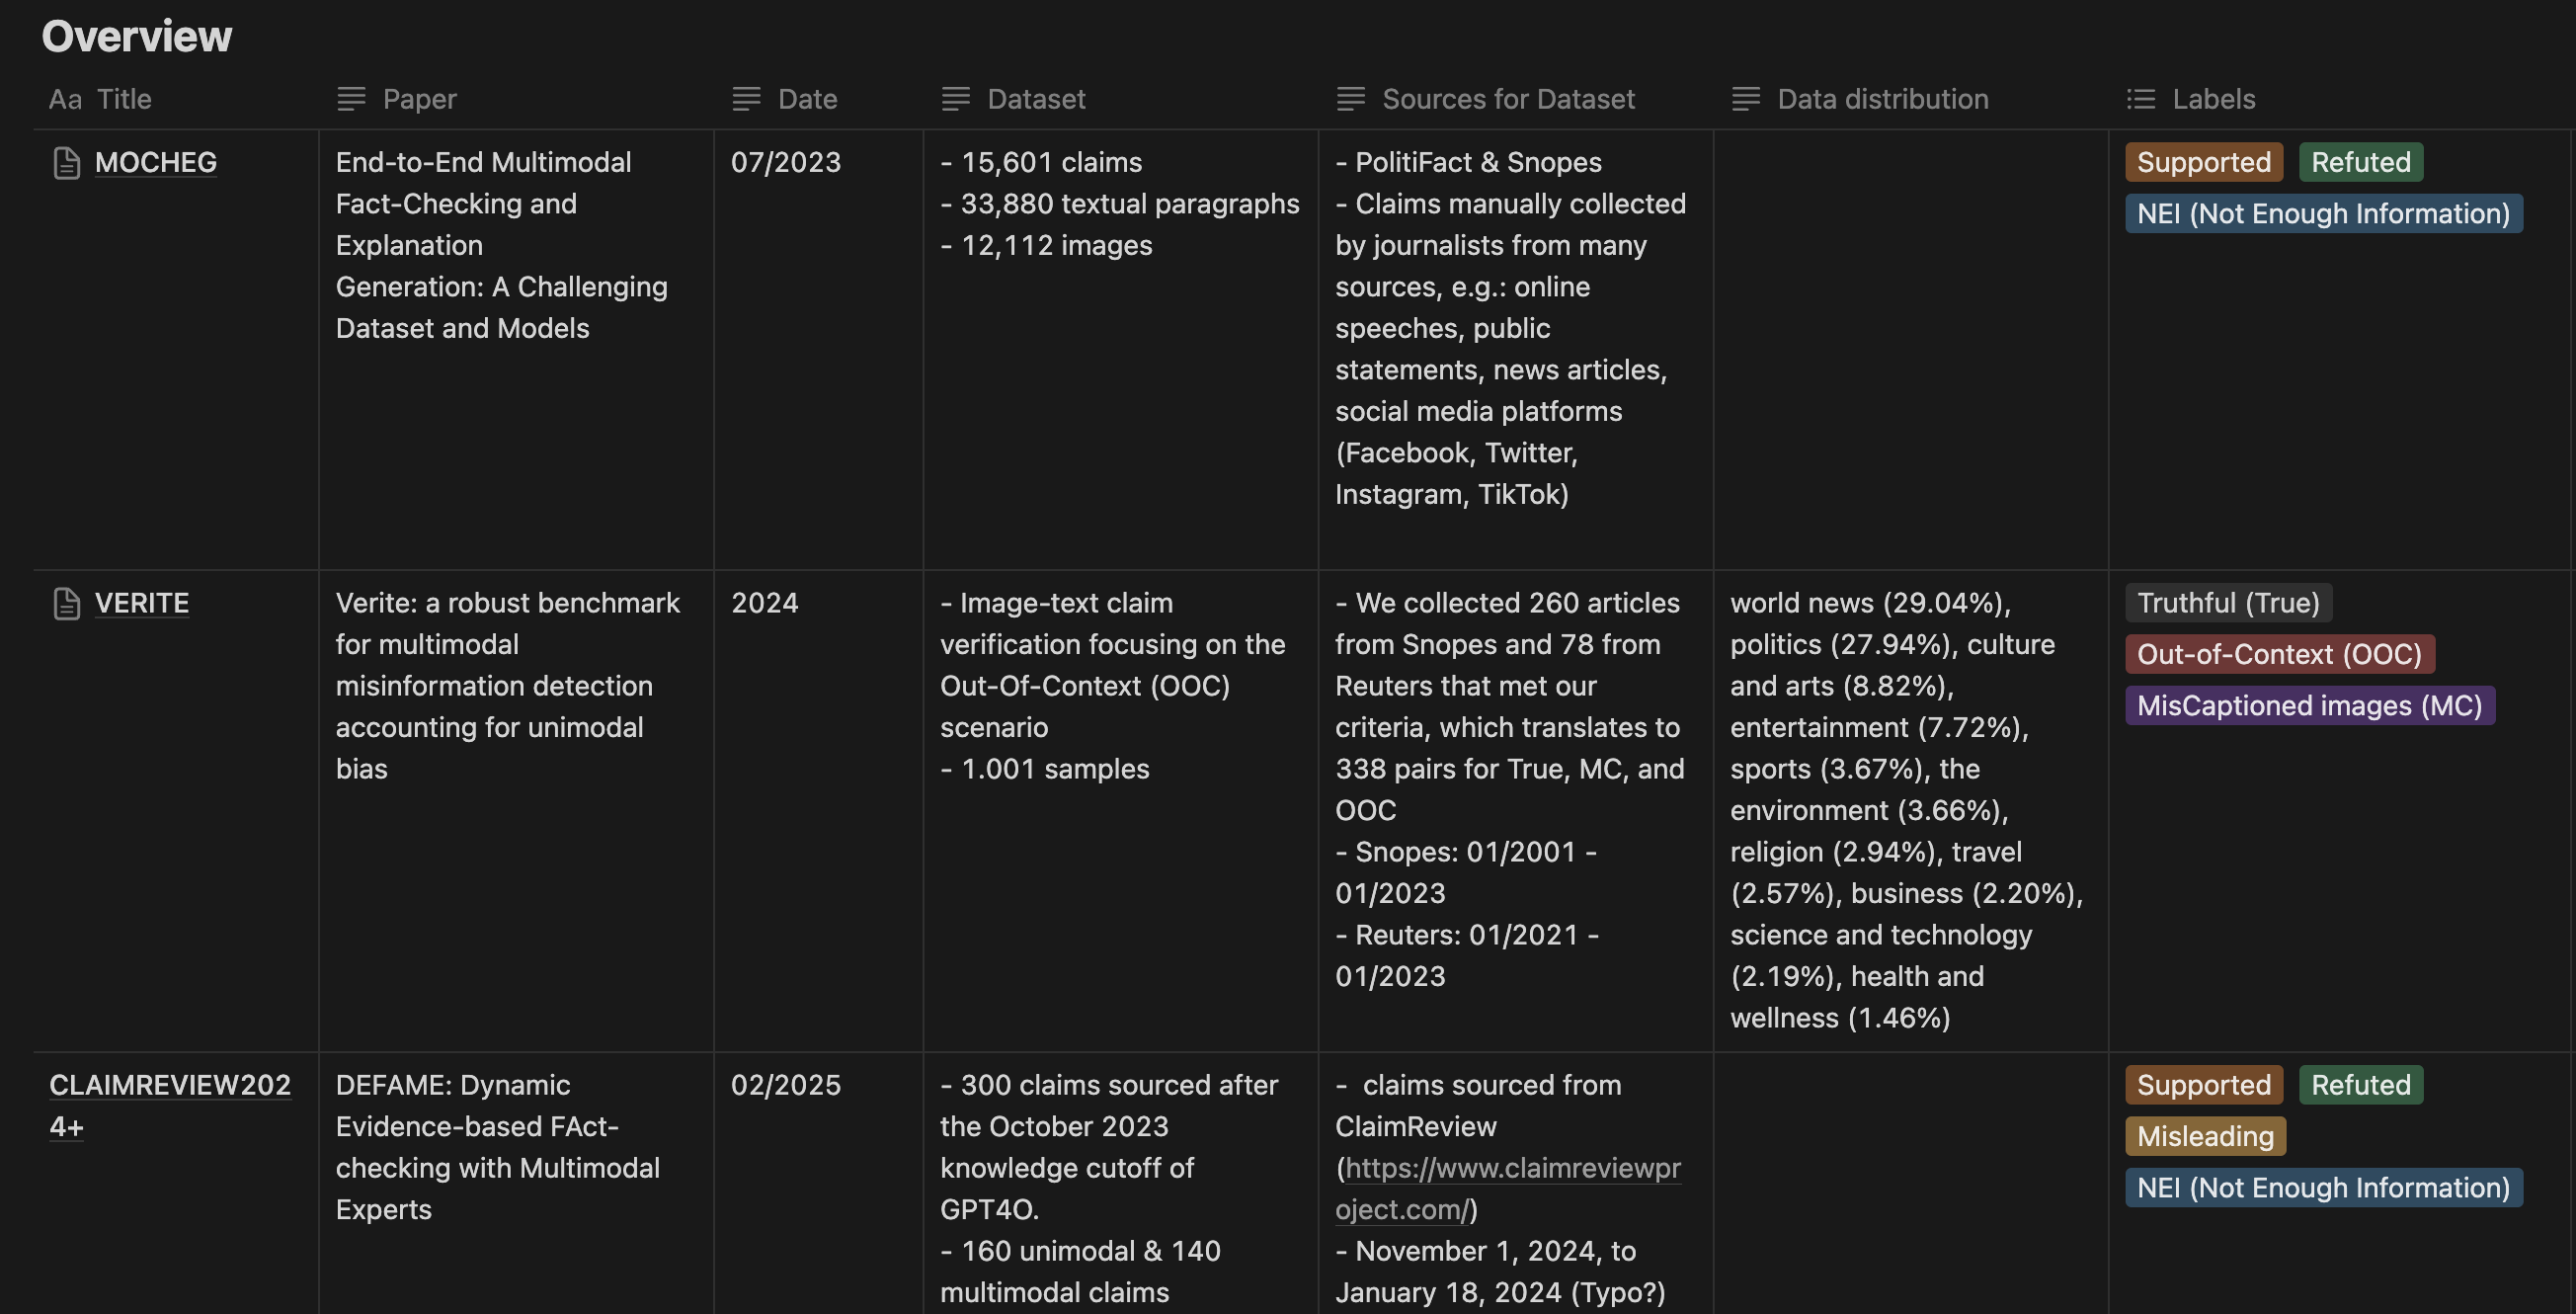

### 4) Perform Label Aggregation

#### Relabeling:

- Correct Attribution -> True
- Incorrect Attribution -> False 
  - looking at samples again to make sure the label is not misleading

- No Evidence/Unproven/Unverifiable -> Not Enough Information (see MOCHEG, CLAIMREVIEW2024+)

- AI-Generated Images / Altered Images
  - 1) Looking at label distribution -> how many traditional label (True, False, Misleading) and how many specific new label (AI Generated, Altered)
  - 2) Manually going through all claims with AI-Generated/Altered images 
  - 3) Would it make sense to reformulate all claims with AI-generated/altered images to have a true/false label, e.g.: 
      - "This image authentically shows...." -> Vgl. Snopes claim Biden Book
      - "This is an authentic image ...."
      - "This is a real image of ....."


- Misleading/Miscaptioned/Missing Context 
  - Manually going through the claims

#### 4.1) Relabeling correct/incorrect attribution

In [21]:
## load df 

df_gaza_israel = pd.read_csv("../gaza_israel/gaza_israel_dataset_010724_300425_after_methodology_check_before_label_aggregation.csv", index_col=0)
print(len(df_gaza_israel))
print(df_gaza_israel.dtypes)
df_gaza_israel.head()

100
id                            int64
Website                      object
Article_URL                  object
Headline                     object
Claim_Date                   object
Review_Date                  object
Query/Keyword                object
Label_Website                object
Image_URL                    object
Original_Claim_Website       object
Original_Claim_Only          object
Context/Label_Explanation    object
Text_Only_Claim                bool
Normal_Image                   bool
AI_Generated_Image             bool
Altered_Image                  bool
Data_Collection_Type         object
dtype: object


,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Website,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
0,0,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.42JE3T2,False claims about US general being killed in Gaza spread online,2025-04-06 00:00:00,2025-04-17 00:00:00,Israeli-Palestinian conflict,false,https://pbs.twimg.com/media/Gn4wjgBXoAALax1?format=jpg&name=medium,"""BREAKING: Reports confirm the death of General John Pagri, Commander of the Special Tasks Battalion in the U.S. Army, in the Gaza Strip,"" says an April 6, 2025 X post with more than 30,000 likes.","""BREAKING: Reports confirm the death of General John Pagri, Commander of the Special Tasks Battalion in the U.S. Army, in the Gaza Strip.""","A reverse image search reveals the photograph was uploaded to Wikimedia Commons, a website that collects free-use images, with a description that says that it was taken in 2007 in Iraq's Babil province (archived here). Wikimedia Commons credits a...",False,True,False,False,manual
1,1,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.39432WD,"Pictures show Gaza in ruins, not Myanmar quake damage",2025-03-29 00:00:00,2025-04-17 00:00:00,Israeli-Palestinian conflict,false,https://web.archive.org/web/20250402070342im_/https://scontent-sjc3-1.xx.fbcdn.net/v/t39.30808-6/487419008_122233817522067190_5197398173696178365_n.jpg?stp=dst-jpg_s600x600_tt6&_nc_cat=108&ccb=1-7&_nc_sid=833d8c&_nc_ohc=Vrh6myPuQ6QQ7kNvgEk5XXK&_n...,"""A 7.9-magnitude earthquake in Myanmar, devastation everywhere, everything in ruins,"" read part of a simplified Chinese caption of a Facebook post published March 29.","""A 7.9-magnitude earthquake in Myanmar, devastation everywhere, everything in ruins.""","However, a reverse image search for the first photo in the post led to a TikTok video shared February 20 by a user based in Gaza. The clip shows the same destroyed building (archived link). A photo from the Turkish Anadolu news agency shows the s...",False,True,False,False,manual
2,2,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.37W26WD,Image of 'Gazan mother with son's bones' is made with AI,2025-03-24 00:00:00,2025-03-27 00:00:00,Israeli-Palestinian conflict,false,https://scontent-hou1-1.xx.fbcdn.net/v/t39.30808-6/486290815_1290888865331200_3774810229142652666_n.jpg?_nc_cat=108&ccb=1-7&_nc_sid=127cfc&_nc_ohc=dJB5KMYY-K8Q7kNvwG36ECt&_nc_oc=Adm1o8yPbYbSNkcgvalWokrqaqaaHITQDp4TW4yh1603BysZ0yTW6m3OzdfFRAcVyc0&...,"""A mother holds the bones of her son in Gaza. After more than a year and a half of searching for him under the rubble of their bombed-out house,"" reads a Malay-language Facebook post shared on March 24.","""A mother holds the bones of her son in Gaza. After more than a year and a half of searching for him under the rubble of their bombed-out house.""","A keyword search found a wider-angle version of the image first shared March 21 on Instagram alongside the disclaimer: ""This visual representation is an AI-generated image created for illustrative purposes"" (archived link). Watermarks that say ""i...",False,False,True,False,manual
3,3,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36XY2FV,Old image misrepresented as 'Israeli settlers' in northern Thailand after Gaza ceasefire,2025-02-16 00:00:00,2025-02-19 00:00:00,Israeli-Palestinian conflict,false,https://pbs.twimg.com/media/Gj5tbXiaQAAoG1z?format=jpg&name=small,"""Israeli media reports there are Jews who have stopped fighting the wars in Gaza, Palestine, and Lebanon. They moved to become 'settlers' in Pai District, Mae Hong Son Province, Thailand,"" reads part of an X post published February 16, 2025.","""Israeli media reports there are Jews who have stopped fighting the wars in Gaza, Palestine, and Lebanon. They moved to become 'settlers' in Pai District, Mae Hong Son Province, Thailand.""","A reverse image search via Google traced the vi

In [22]:
## Looking at label distribution for the data colleciton type again

df_gaza_israel.groupby("Data_Collection_Type")["Label_Website"].value_counts()

Data_Collection_Type  Label_Website        
api                   misleading               20
                      fake                     11
                      false                    10
                      altered                   1
                      unsubstantiated           1
manual                false                    32
                      miscaptioned              7
                      misleading                4
                      true                      4
                      correct attribution       2
                      unproven                  2
                      altered                   1
                      fake                      1
                      incorrect attribution     1
                      no evidence               1
                      originated as satire      1
                      synthetic media           1
Name: count, dtype: int64

In [23]:
## Manually inspecting the claims with "correct attribution" once again

pd.set_option('display.max_colwidth', 250)

df_gaza_israel[df_gaza_israel["Label_Website"] == "correct attribution"]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Website,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
42,42,Snopes,https://www.snopes.com/fact-check/trump-hell-israel-hostages/,Trump Said 'All Hell Will Break Out' If Israeli Hostages Aren't Returned By Inauguration,2025-01-14 00:00:00,2025-01-15 00:00:00,"""Gaza""",correct attribution,NaN,"U.S. President-elect Donald Trump said that if Israeli hostages held by Hamas ""are not back by the time I get into office, all hell will break out in the Middle East.”","""U.S. President-elect Donald Trump said that if Israeli hostages held by Hamas 'are not back by the time I get into office, all hell will break out in the Middle East'.”","Trump did indeed say the above words, speaking at a news conference at Mar-a-Lago in Florida on Jan. 7, 2025. As such, we rate this claim a correct attribution. Trump made the comment in response to a journalist asking about the state of negotiat...",True,False,False,False,manual
51,51,Snopes,https://www.snopes.com/fact-check/james-baldwin-on-israel/,"James Baldwin Said Israel Was Created for Salvation of Western Interests, Not Salvation of Jews?",2024-08-28 00:00:00,2024-09-08 00:00:00,"""Israel""",correct attribution,NaN,"American writer James Baldwin once said: ""The state of Israel was not created for the salvation of the Jews; it was created for the salvation of the Western interests.""","""American writer James Baldwin once said: 'The state of Israel was not created for the salvation of the Jews; it was created for the salvation of the Western interests.'""","In 1979, while the writer was living in New York City, he penned an open letter to The Nation – a self-described progressive magazine in publication since being founded by abolitionists in 1865 – titled ""Open Letter to the Born Again."" In his let...",True,False,False,False,manual


In [24]:
##  Initialize the new "Label" column with NaN values to keep track which claims have not been relabed yet
df_gaza_israel["Label"] = np.nan

## 1) Create new "True" label for original "true" or "correct attribution" labels

df_gaza_israel["Label"] = np.where((df_gaza_israel["Label_Website"].isin(
    ["true", "correct attribution"]
)),
"True", #new label (Capital letters)
df_gaza_israel["Label"] #Keep NaN values for claims with other original labels
)
# Check that re-labeling was successful
df_gaza_israel[(df_gaza_israel["Label_Website"] == "true") | (df_gaza_israel["Label_Website"] == "correct attribution")]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Website,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type,Label
40,40,Snopes,https://www.snopes.com/fact-check/columbia-university-expelled-student-anti-nazi-demonstration/,"Yes, Columbia University expelled student for leading anti-Nazi demonstration in 1936",2025-03-15 00:00:00,2025-03-16 00:00:00,"""Gaza""",true,NaN,"In June 1936, Columbia University expelled student activist Robert Burke for leading an anti-Nazi demonstration.","""In June 1936, Columbia University expelled student activist Robert Burke for leading an anti-Nazi demonstration.""","In 1936, Columbia University expelled Robert Burke, a student who led anti-Nazi demonstrations on campus that year. His appeal to be reinstated was denied. We found numerous articles and pamphlets from that time detailing his expulsion. As such, ...",True,False,False,False,manual,True
41,41,Snopes,https://www.snopes.com/fact-check/ice-arrested-deported-mahmoud-khalil/,"Yes, ICE arrested Palestinian activist Mahmoud Khalil, a lawful permanent resident of US",2025-03-09 00:00:00,2025-03-11 00:00:00,"""Gaza""",true,NaN,"In March 2025, U.S. Immigration and Customs Enforcement (ICE) agents arrested and detained Palestinian activist Mahmoud Khalil, a lawful permanent resident of the U.S.","""In March 2025, U.S. Immigration and Customs Enforcement (ICE) agents arrested and detained Palestinian activist Mahmoud Khalil, a lawful permanent resident of the U.S.""","Snopes readers contacted us asking if the story was true — if ICE agents had arrested and detained Khalil. They had. On March 10, Trump posted to his social media platform Truth Social announcing that ICE had arrested and detained Khalil, whom he...",True,False,False,False,manual,True
42,42,Snopes,https://www.snopes.com/fact-check/trump-hell-israel-hostages/,Trump Said 'All Hell Will Break Out' If Israeli Hostages Aren't Returned By Inauguration,2025-01-14 00:00:00,2025-01-15 00:00:00,"""Gaza""",correct attribution,NaN,"U.S. President-elect Donald Trump said that if Israeli hostages held by Hamas ""are not back by the time I get into office, all hell will break out in the Middle East.”","""U.S. President-elect Donald Trump said that if Israeli hostages held by Hamas 'are not back by the time I get into office, all hell will break out in the Middle East'.”","Trump did indeed say the above words, speaking at a news conference at Mar-a-Lago in Florida on Jan. 7, 2025. As such, we rate this claim a correct attribution. Trump made the comment in response to a journalist asking about the state of negotiat...",True,False,False,False,manual,True
44,44,Snopes,https://www.snopes.com/fact-check/biden-war-palestine-book/,Real Picture of Biden Carrying Rashid Khalidi's Book 'The Hundred Years' War on Palestine'?,2024-11-30 00:00:00,2024-12-02 00:00:00,"""Gaza""",true,https://mediaproxy.snopes.com/width/1200/https://media.snopes.com/2024/12/biden_book_2.jpg,"A photograph authentically shows U.S. President Joe Biden exiting a Nantucket bookstore holding a copy of writer Rashid Khalidi's book, ""The Hundred Years' War on Palestine: A History of Settler Colonialism and Resistance, 1917–2017.""","""A photograph authentically shows U.S. President Joe Biden exiting a Nantucket bookstore holding a copy of writer Rashid Khalidi's book, 'The Hundred Years' War on Palestine: A History of Settler Colonialism and Resistance, 1917–2017.'""","\r\nThe above image is real, and does show Biden holding the book in question while leaving the Nantucket Bookworks store in Massachusetts. The photograph was taken Nov. 29, 2024, when numerous photos of Biden were taken during the Thanksgiving h...",False,True,False,False,manual,True
47,47,Snopes,https://www.snopes.com/fact-check/jetblue-map-israel-palestine/,JetBlue's In-Flight Map Showed 'Palestinian Territories' Label Over Israel?,2

In [25]:
df_gaza_israel["Label"].value_counts()

Label
nan     94
True     6
Name: count, dtype: int64

In [26]:
## Manually inspecting the claims with "correct attribution" once again

pd.set_option('display.max_colwidth', 250)

df_gaza_israel[df_gaza_israel["Label_Website"] == "incorrect attribution"]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Website,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type,Label
43,43,Snopes,https://www.snopes.com/fact-check/anthony-bourdain-palestine/,Misleading Posts Attribute 'Courage Is Made in Palestine' Quote to Anthony Bourdain,2024-11-25 00:00:00,2024-12-02 00:00:00,"""Gaza""",incorrect attribution,NaN,"Anthony Bourdain once said, ""Today, nearly everything is made in China. Except for courage. Courage is made in Palestine.”","""Anthony Bourdain once said, 'Today, nearly everything is made in China. Except for courage. Courage is made in Palestine.'""","Prior to his death in June 2018, there's no record of Bourdain ever making this exact statement. However, he did talk publicly about Israel and Gaza, including comments specifically about Palestinians. While it's entirely possible that Bourdain m...",True,False,False,False,manual,nan


- The claim will not be relabeled as misleading or miscaptioned, because there is no quote that has been put out-of-context. Rather there is no record of Bourdain ever making this statement of the claim. Thus, it will be relabed as "False".

In [27]:
## 2) Create new "False" label for original "false" or "incorrect attribution" labels (some of the original "fake" labels might also be "false" -> will be checked later)

df_gaza_israel["Label"] = np.where((df_gaza_israel["Label_Website"].isin(
    ["false", "incorrect attribution"]
)),
"False", #new label (Capital letters)
df_gaza_israel["Label"] #Keep NaN values for claims with other original labels
)
# Check that re-labeling was successful
df_gaza_israel[(df_gaza_israel["Label_Website"] == "false") | (df_gaza_israel["Label_Website"] == "incorrect attribution")].head()

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Website,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type,Label
0,0,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.42JE3T2,False claims about US general being killed in Gaza spread online,2025-04-06 00:00:00,2025-04-17 00:00:00,Israeli-Palestinian conflict,false,https://pbs.twimg.com/media/Gn4wjgBXoAALax1?format=jpg&name=medium,"""BREAKING: Reports confirm the death of General John Pagri, Commander of the Special Tasks Battalion in the U.S. Army, in the Gaza Strip,"" says an April 6, 2025 X post with more than 30,000 likes.","""BREAKING: Reports confirm the death of General John Pagri, Commander of the Special Tasks Battalion in the U.S. Army, in the Gaza Strip.""","A reverse image search reveals the photograph was uploaded to Wikimedia Commons, a website that collects free-use images, with a description that says that it was taken in 2007 in Iraq's Babil province (archived here). Wikimedia Commons credits a...",False,True,False,False,manual,False
1,1,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.39432WD,"Pictures show Gaza in ruins, not Myanmar quake damage",2025-03-29 00:00:00,2025-04-17 00:00:00,Israeli-Palestinian conflict,false,https://web.archive.org/web/20250402070342im_/https://scontent-sjc3-1.xx.fbcdn.net/v/t39.30808-6/487419008_122233817522067190_5197398173696178365_n.jpg?stp=dst-jpg_s600x600_tt6&_nc_cat=108&ccb=1-7&_nc_sid=833d8c&_nc_ohc=Vrh6myPuQ6QQ7kNvgEk5XXK&_n...,"""A 7.9-magnitude earthquake in Myanmar, devastation everywhere, everything in ruins,"" read part of a simplified Chinese caption of a Facebook post published March 29.","""A 7.9-magnitude earthquake in Myanmar, devastation everywhere, everything in ruins.""","However, a reverse image search for the first photo in the post led to a TikTok video shared February 20 by a user based in Gaza. The clip shows the same destroyed building (archived link). A photo from the Turkish Anadolu news agency shows the s...",False,True,False,False,manual,False
2,2,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.37W26WD,Image of 'Gazan mother with son's bones' is made with AI,2025-03-24 00:00:00,2025-03-27 00:00:00,Israeli-Palestinian conflict,false,https://scontent-hou1-1.xx.fbcdn.net/v/t39.30808-6/486290815_1290888865331200_3774810229142652666_n.jpg?_nc_cat=108&ccb=1-7&_nc_sid=127cfc&_nc_ohc=dJB5KMYY-K8Q7kNvwG36ECt&_nc_oc=Adm1o8yPbYbSNkcgvalWokrqaqaaHITQDp4TW4yh1603BysZ0yTW6m3OzdfFRAcVyc0&...,"""A mother holds the bones of her son in Gaza. After more than a year and a half of searching for him under the rubble of their bombed-out house,"" reads a Malay-language Facebook post shared on March 24.","""A mother holds the bones of her son in Gaza. After more than a year and a half of searching for him under the rubble of their bombed-out house.""","A keyword search found a wider-angle version of the image first shared March 21 on Instagram alongside the disclaimer: ""This visual representation is an AI-generated image created for illustrative purposes"" (archived link). Watermarks that say ""i...",False,False,True,False,manual,False
3,3,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36XY2FV,Old image misrepresented as 'Israeli settlers' in northern Thailand after Gaza ceasefire,2025-02-16 00:00:00,2025-02-19 00:00:00,Israeli-Palestinian conflict,false,https://pbs.twimg.com/media/Gj5tbXiaQAAoG1z?format=jpg&name=small,"""Israeli media reports there are Jews who have stopped fighting the wars in Gaza, Palestine, and Lebanon. They moved to become 'settlers' in Pai District, Mae Hong Son Province, Thailand,"" reads part of an X post published February 16, 2025.","""Israeli media reports there are Jews who have stopped fighting the wars in Gaza, Palestine, and Lebanon. They moved to become 'settlers' in Pai District, Mae Hong Son Province, Thailand.""","A reverse image search 

In [28]:
# looking at new label distribution

df_gaza_israel["Label"].value_counts()

Label
nan      51
False    43
True      6
Name: count, dtype: int64

#### 4.2) Relabeling all labels that indicate that evidence is missing to make a judgement into one aggregated label ("Not Enough Information (NEI)")

In [29]:
df_gaza_israel["Label_Website"].value_counts()

Label_Website
false                    42
misleading               24
fake                     12
miscaptioned              7
true                      4
unproven                  2
altered                   2
correct attribution       2
no evidence               1
synthetic media           1
incorrect attribution     1
originated as satire      1
unsubstantiated           1
Name: count, dtype: int64

- The relevant original labels are: "unproven", "no evidence", "unsubstantiated"

In [30]:
## Manually inspecting the claims with the relevant labels once again
pd.set_option('display.max_colwidth', 250)


df_gaza_israel[(df_gaza_israel["Label_Website"] == "unproven") | (df_gaza_israel["Label_Website"] == "no evidence")
                                            | (df_gaza_israel["Label_Website"] == "unsubstantiated") ]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Website,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type,Label
15,15,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.367P9XU,No evidence Montreal mayor authorized pro-Palestinian traffic signs,2024-07-24 00:00:00,2024-08-06 00:00:00,Israeli-Palestinian conflict,unproven,https://i.cbc.ca/1.7274812.1721903270!/cpImage/httpImage/image.jpg_gen/derivatives/16x9_1180/mtl-pirated-signs-20240724.jpg?im=Resize%3D780,"""So the Mayor is using taxpayer dollars to incite another October 7,"" says a July 24, 2024 X post, referencing Hamas's attack on Israel. The post includes photos of traffic warning signs broadcasting the messages ""Globalize The Intifada"" and ""Fre...","""So the Mayor is using taxpayer dollars to incite another October 7.""","Some news headlines implied the boards were hacked, but Nuñez told AFP the locks on the signs were broken and the words were manually entered. A July 24 Instagram post from Clash MTL and Palestine Action Montreal describes how someone diverted ro...",False,True,False,False,manual,nan
20,20,Reuters,https://www.reuters.com/fact-check/no-evidence-us-spent-50-million-condoms-gaza-2025-01-30/,Fact Check: No evidence US spent $50 million on condoms for Gaza,2025-01-28 00:00:00,2025-01-30 00:00:00,"""Gaza Fact Check""",no evidence,NaN,"Posts online, sharing a clip of Leavitt’s remarks said: “WILD: Karoline Leavitt EXPOSED that $50 MILLION in U.S. taxpayer money almost went to fund CONDOMS in Gaza before DOGE cut it.”",“WILD: Karoline Leavitt EXPOSED that $50 MILLION in U.S. taxpayer money almost went to fund CONDOMS in Gaza before DOGE cut it.”,Statements from the Trump administration saying it discovered a plan to send $50 million to fund condoms in Gaza have been denied by the humanitarian group named as the recipient and by a former U.S. official.,True,False,False,False,manual,nan
48,48,Snopes,https://www.snopes.com/fact-check/trump-netanyahu-ceasefire-harris/,Trump Denies Telling Netanyahu to Stop Gaza Ceasefire Deal As It Would Help Harris Campaign,2024-08-20 00:00:00,2024-08-22 00:00:00,"""Gaza""",unproven,NaN,"In a phone call with Benjamin Netanyahu, Donald Trump told the Israeli prime minister to stop a Gaza ceasefire deal because it would help Vice President Kamala Harris' 2024 presidential campaign.","""In a phone call with Benjamin Netanyahu, Donald Trump told the Israeli prime minister to stop a Gaza ceasefire deal because it would help Vice President Kamala Harris' 2024 presidential campaign.""","In statements to Snopes, Trump's office denied that such a phone call even took place, while Netanyahu's team said the story was not true. Woodruff also corrected herself in the aftermath, and said her comments were a ""mistake."" There was also no...",True,False,False,False,manual,nan
70,70,checkyourfact.com,https://checkyourfact.com/2025/02/06/fact-check-iron-dome-intercept-ballistic-missiles/,FACT CHECK: Does The Iron Dome Intercept 90% Of Ballistic Missiles?,2025-01-28 00:00:00+00:00,2025-02-06 00:00:00+00:00,Israel,unsubstantiated,NaN,NaN,NewsNation and the New York Post reported that the Iron Dome intercepted 90% of ballistic missiles fired at Israel.,"President Donald Trump signed an executive order directing Secretary of Defense Pete Hegseth to develop a missile defense plan to defend the United States from ballistic missiles, hypersonic missiles and other aerial threats, according to Defens...",True,False,False,False,api,nan


In [31]:
## 3) Create new "NEI (Not Enough Information)" label for original labels

df_gaza_israel["Label"] = np.where((df_gaza_israel["Label_Website"].isin(
    ["unproven", "no evidence", "unsubstantiated"]
)),
"NEI", #new label (Capital letters)
df_gaza_israel["Label"] #Keep NaN values for claims with other original labels
)
# Check that re-labeling was successful
df_gaza_israel[(df_gaza_israel["Label_Website"] == "unproven") | (df_gaza_israel["Label_Website"] == "no evidence")
                                            | (df_gaza_israel["Label_Website"] == "unsubstantiated")]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Website,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type,Label
15,15,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.367P9XU,No evidence Montreal mayor authorized pro-Palestinian traffic signs,2024-07-24 00:00:00,2024-08-06 00:00:00,Israeli-Palestinian conflict,unproven,https://i.cbc.ca/1.7274812.1721903270!/cpImage/httpImage/image.jpg_gen/derivatives/16x9_1180/mtl-pirated-signs-20240724.jpg?im=Resize%3D780,"""So the Mayor is using taxpayer dollars to incite another October 7,"" says a July 24, 2024 X post, referencing Hamas's attack on Israel. The post includes photos of traffic warning signs broadcasting the messages ""Globalize The Intifada"" and ""Fre...","""So the Mayor is using taxpayer dollars to incite another October 7.""","Some news headlines implied the boards were hacked, but Nuñez told AFP the locks on the signs were broken and the words were manually entered. A July 24 Instagram post from Clash MTL and Palestine Action Montreal describes how someone diverted ro...",False,True,False,False,manual,NEI
20,20,Reuters,https://www.reuters.com/fact-check/no-evidence-us-spent-50-million-condoms-gaza-2025-01-30/,Fact Check: No evidence US spent $50 million on condoms for Gaza,2025-01-28 00:00:00,2025-01-30 00:00:00,"""Gaza Fact Check""",no evidence,NaN,"Posts online, sharing a clip of Leavitt’s remarks said: “WILD: Karoline Leavitt EXPOSED that $50 MILLION in U.S. taxpayer money almost went to fund CONDOMS in Gaza before DOGE cut it.”",“WILD: Karoline Leavitt EXPOSED that $50 MILLION in U.S. taxpayer money almost went to fund CONDOMS in Gaza before DOGE cut it.”,Statements from the Trump administration saying it discovered a plan to send $50 million to fund condoms in Gaza have been denied by the humanitarian group named as the recipient and by a former U.S. official.,True,False,False,False,manual,NEI
48,48,Snopes,https://www.snopes.com/fact-check/trump-netanyahu-ceasefire-harris/,Trump Denies Telling Netanyahu to Stop Gaza Ceasefire Deal As It Would Help Harris Campaign,2024-08-20 00:00:00,2024-08-22 00:00:00,"""Gaza""",unproven,NaN,"In a phone call with Benjamin Netanyahu, Donald Trump told the Israeli prime minister to stop a Gaza ceasefire deal because it would help Vice President Kamala Harris' 2024 presidential campaign.","""In a phone call with Benjamin Netanyahu, Donald Trump told the Israeli prime minister to stop a Gaza ceasefire deal because it would help Vice President Kamala Harris' 2024 presidential campaign.""","In statements to Snopes, Trump's office denied that such a phone call even took place, while Netanyahu's team said the story was not true. Woodruff also corrected herself in the aftermath, and said her comments were a ""mistake."" There was also no...",True,False,False,False,manual,NEI
70,70,checkyourfact.com,https://checkyourfact.com/2025/02/06/fact-check-iron-dome-intercept-ballistic-missiles/,FACT CHECK: Does The Iron Dome Intercept 90% Of Ballistic Missiles?,2025-01-28 00:00:00+00:00,2025-02-06 00:00:00+00:00,Israel,unsubstantiated,NaN,NaN,NewsNation and the New York Post reported that the Iron Dome intercepted 90% of ballistic missiles fired at Israel.,"President Donald Trump signed an executive order directing Secretary of Defense Pete Hegseth to develop a missile defense plan to defend the United States from ballistic missiles, hypersonic missiles and other aerial threats, according to Defens...",True,False,False,False,api,NEI


In [32]:
df_gaza_israel["Label"].value_counts()

Label
nan      47
False    43
True      6
NEI       4
Name: count, dtype: int64

In [33]:
## Save intermediate label aggregation df for descriptive statistics

df_gaza_israel.to_csv("../gaza_israel/gaza_israel_combined_010724_after_methodology_check_mid_of_label_aggregation.csv")

#### 4.3) Relabeling claims with AI-generated/altered images into coherent labels

In [34]:
## looking at the label distribution of claims with ai-generated/altered images

df_gaza_israel_ai_image_true = df_gaza_israel[df_gaza_israel["AI_Generated_Image"] == True]
#df_true_only.groupby("Label_Website").value_counts()

df_gaza_israel_ai_image_true.groupby("AI_Generated_Image")["Label_Website"].value_counts()

AI_Generated_Image  Label_Website  
True                false              5
                    fake               2
                    misleading         1
                    synthetic media    1
Name: count, dtype: int64

In [35]:
## Look at how different websites (manual vs api) labeld claims with AI-Generated-Images

#print(df_gaza_israel_combined.groupby(["AI_Generated_Image", "Website"])["Label_Website"].value_counts())


df_gaza_israel_ai_image_true.groupby(["AI_Generated_Image", "Data_Collection_Type"])["Label_Website"].value_counts()

AI_Generated_Image  Data_Collection_Type  Label_Website  
True                api                   fake               2
                                          misleading         1
                    manual                false              5
                                          synthetic media    1
Name: count, dtype: int64

- Manual Websites mostly label these claims with traditional label "false" and in one case with "synthetic media"
- API Websitess label it with "fake" and traditional label "misleading"

In [36]:
## Looking at specific websites

df_gaza_israel_ai_image_true.groupby(["AI_Generated_Image", "Website"])["Label_Website"].value_counts() 

AI_Generated_Image  Website             Label_Website  
True                AFP Factcheck       false              3
                    Reuters             false              2
                                        synthetic media    1
                    logicallyfacts.com  fake               1
                    misbar.com          fake               1
                    newsmeter.in        misleading         1
Name: count, dtype: int64

- Inconsistent labeling of claims with AI Images by Reuters

In [37]:
df_gaza_israel.groupby("Altered_Image")["Label_Website"].value_counts()

Altered_Image  Label_Website        
False          false                    41
               misleading               24
               fake                      8
               miscaptioned              7
               true                      4
               correct attribution       2
               unproven                  2
               incorrect attribution     1
               no evidence               1
               originated as satire      1
               synthetic media           1
               unsubstantiated           1
True           fake                      4
               altered                   2
               false                     1
Name: count, dtype: int64

In [39]:
pd.set_option('display.max_colwidth', None)
df_gaza_israel[df_gaza_israel["AI_Generated_Image"] == True]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Website,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type,Label
2,2,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.37W26WD,Image of 'Gazan mother with son's bones' is made with AI,2025-03-24 00:00:00,2025-03-27 00:00:00,Israeli-Palestinian conflict,false,https://scontent-hou1-1.xx.fbcdn.net/v/t39.30808-6/486290815_1290888865331200_3774810229142652666_n.jpg?_nc_cat=108&ccb=1-7&_nc_sid=127cfc&_nc_ohc=dJB5KMYY-K8Q7kNvwG36ECt&_nc_oc=Adm1o8yPbYbSNkcgvalWokrqaqaaHITQDp4TW4yh1603BysZ0yTW6m3OzdfFRAcVyc0&_nc_zt=23&_nc_ht=scontent-hou1-1.xx&_nc_gid=7AoU9LU1o_p7jCObsgUWlQ&oh=00_AfH7GWH4PBqeBawSJ9_R87ZfrG1kYAoZjldaIHBiuECusg&oe=681E8A2A,"""A mother holds the bones of her son in Gaza. After more than a year and a half of searching for him under the rubble of their bombed-out house,"" reads a Malay-language Facebook post shared on March 24.","""A mother holds the bones of her son in Gaza. After more than a year and a half of searching for him under the rubble of their bombed-out house.""","A keyword search found a wider-angle version of the image first shared March 21 on Instagram alongside the disclaimer: ""This visual representation is an AI-generated image created for illustrative purposes"" (archived link). Watermarks that say ""in.visualart"" on the upper left side and ""designed by in.visualart"" on the lower left part have been cropped out in the circulating posts. The primary Instagram account sharing the image -- called ""in.visualart"" -- describes itself as a ""designer"" and labels its content as ""AI tools"" and ""AI-generated image"". Shu Hu, head of Purdue University's Machine Learning and Media Forensics Lab in the United States, told AFP the image was AI-generated (archived link). Hu pointed out the woman's blurry teeth in the image and said that there was ""no obvious segmentation"", one of the hallmarks of AI-generated imagery. While there is no foolproof method to spot AI-generated media, identifying watermarks and visual inconsistencies can help, as errors still occur despite the meteoric progress in generative AI.",False,False,True,False,manual,False
6,6,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36MV6KT,AI-generated image used to falsely claim Netanyahu hospitalized,2024-11-17 00:00:00,2024-11-20 00:00:00,Israeli-Palestinian conflict,false,https://scontent-dfw5-2.xx.fbcdn.net/v/t39.30808-6/467574066_10159703629306377_2271087948666621641_n.jpg?_nc_cat=106&ccb=1-7&_nc_sid=833d8c&_nc_ohc=sLkWj06JNSIQ7kNvwF8V9Ks&_nc_oc=AdmX4eGfRA00g0oakzPCxbU37qVHOnj-5s0mPTUOMhTj-uJgcy4XGkbqrL2QVkvRdLk&_nc_zt=23&_nc_ht=scontent-dfw5-2.xx&_nc_gid=GxsCLpbhYjt7pSBgkFmzkQ&oh=00_AfHBauCQ4-oFrtT0kySyUl9ET2-BwofVsasFfT3vNsPXdg&oe=681E8BB2,"""BREAKING NETANYAHU HOSPITALISED He suffered serious health issue in Kiryah and has been shifted to a hospital in Tel Aviv,"" says a November 17 X post from Sulaiman Ahmed, a creator who has monetized misinformation about Israel's war with Hamas.","""BREAKING NETANYAHU HOSPITALISED He suffered serious health issue in Kiryah and has been shifted to a hospital in Tel Aviv.""","However, November 2024 social media posts claiming he was hospitalized with a ""serious health issue"" are false; the Israeli leader gave a speech to lawmakers when he was supposedly admitted, and experts told AFP the image shared online is likely AI-generated. The photo being shared of Netanyahu was likely generated by artificial intelligence, experts said. Hany Farid, a digital forensics expert at the University of California-Berkeley (archived here), said he analyzed the image using three models trained to identify pictures created using artificial intelligence, all of which classified it as ""likely"" being AI-generated. He told AFP on November 19 that he compared the image with actual photographs of Netanyahu and found the left ear was

- Claim 1 (Label: False): "A mother holds the bones of her son in Gaza. After more than a year and a half of searching for him under the rubble of their bombed-out house."
    - Could be reformulated in: This is an authentic/real image of ..... 
    - Label stays the same

- Claim 3 (Label: False): "A PHOTO FOR THE HISTORY BOOKS MEA airline landing in Beirut International Airport as Israeli rains fire on the airport."
    - Could be reformulated in: "This is an authentic image that shows Israel bombing Beirut's International Airport." (Tested this claime with DEFAME: run.py) -> adding a fictitous date?
        - Result Test: DEFAME predicted the correct label, but did not detect that it is an AI-image. Rather said that the bombing is from Beirut 2020 explosion and not from Israeli bombing.
    - Label stays the same

- Claim 2 (Label: False): "BREAKING NETANYAHU HOSPITALISED He suffered serious health issue in Kiryah and has been shifted to a hospital in Tel Aviv."
    - Could be reformulated in: "This is an authentic/real/realistic iamge of ......
    - Label stays the same

- Claim 4 (Label: False): “I love this picture of the big 3.”
    - Could be reformulated in: "This is an authentic/real image of Donald Trump, Benjamin Netanyahu and Elon Musk" // This image authentically/realistically shows ......
    - Label stays the same 

- Claim 5 (Label: False): "Mike Tyson poses with the Palestinian flag before his historic fight."
    - Could be reformulated
    - Label stays the same

- Claim 6 (Label: synthetic media (Website: Reuters)): “Make songs about fighting against apartheid.. then openly support apartheid. BREAKING: Bono and Bob Geldof stage two-man vigil outside Israeli Embassy in Dublin.”
    - Could be reformulated in: "This is an authentic image of Bono and Bob Geldof holding the Israeli flag."
    - Label will be relabeld into "False"

- Claim 7 (Label: fake, Webisite: misbar.com): "Despite strict military censorship in Israel A photo of the Ramat David base that was attacked by Hezbollah at dawn today was leaked - unconfirmed. Israel does not acknowledge that anything happened at this air base. This base is the largest Israeli air base in the north and center of the country. ETReport"
    - Misbar.com label explanation: "The primary aspects of the claim are false and lack supporting evidence. Elements of a claim are demonstrably false." -> Seems like the "false" label of the other fact-checking websites
    - Reuters "false label: "We rate a claim or media content as false when it can be independently disproven, such as imposter content and hoaxes. Statements are also rated false when several credible sources and experts disprove the claim."
    - AFP "false" label: "We state an item is false when multiple and reliable sources disprove it."
    - Could be reformulated in: "This image shows an authentic strike of Israel's Ramat David base by Hezbollah." (Tested this claime with DEFAME: run.py)
        - Test Result: Prediction was correct and it also detected the AI-image (through news reports)
            - Model Justification: The image depicting a strike on the Ramat David airbase is not authentic. While Hezbollah did launch attacks on the base, the image has been identified as AI-generated, as reported by France 24.
    - Label will be relabeled into "False"

- Claim 8 (Label: fake, Website: logicallyfacts.com): "The image shows Dwayne Johnson wearing Israeli flag in support of Israel."
    - logicallfacts.com label explanation: "Fake": "The claim is entirely unjustified by the available evidence and the photo/video was fabricated."
        - Has elements of typical "false" label (claim unjustified by evidence), but also recognizes fabricated nature of image
    - Could be reformulated in: "The image authentically shows Dwayne Johnson wearing the Israeli flag in support of Israel." / "This is a real image of ......"
    - Label will be relabeled into "False"

- Claim 9 (Label: misleading, Website: newsmeter.in): "A photo shows an elderly Palestinian woman being attacked by an Israeli Army dog"
    - newsmeter.in label explanation:
        "Misleading": "The claim has elements of truth but is taken out of context or misrepresented.",
        "False": "The claim is inaccurate and misleading.",
        Website does not have a specific AI/altered label
    - Why is it labeled as "misleading" and not "false"?
        - Label Explanation: NewsMeter found that claim is misleading. **The incident did occur but the image is AI-generated.** Different news outlets, including the Palestine Chronicle, reported the incident with the title “‘Israelis Set a Dog on Me’ – Video Shows Army Unleashing Dog on Elderly Palestinian Woman.”
    - *Either keep the claim as it is and also keep "misleading" label or reformulate the claim "authentic/realistic ...." and relabel it as "False"*

    - Testing it out with three different claims:
        - "This image", Image("in/example/israel-army-dogs-woman.jpeg"),
         "shows an elderly Palestinian woman being attacked by an Israeli army dog."

            - Prediction: Refuted -> Correct
                - it uses newsmeter.in fact check -> is not added to restricted URL's yet, need to add this to: defame/evidence_retrieval/scraping/fact_checking_urls.txt (This folder seems to be new in the github repo (Stand: 20.05.25))
                - Final Judgement: **The provided evidence indicates that the image is AI-generated and not a real scene. While there are reports of Israeli army dogs attacking Palestinian women, this specific image is fabricated.**
                - Evidence from web search: The Middle East Eye (https://www.middleeasteye.net/news/israeli-army-dog-mauled- palestinian-pregnant-woman-then-she-lost-baby) reported on an incident where a pregnant Palestinian woman was attacked by an Israeli combat dog, leading to the loss of her newborn. The New Arab (https://www.newarab.com/news/israel-army-dog-mauling-gaza- woman-exposes-k9-weaponisation) discussed an Israeli army dog mauling an elderly Palestinian woman in Gaza, resulting in fractures and serious injuries. Al-Haq (https:// www.alhaq.org/monitoring-documentation/6941.html) published an article about an Israeli army dog attacking a Palestinian woman.      
CyberPeace.org (https://www.cyberpeace.org/resources/blogs/factcheck---debunking-the-ai- generated-image-of-an-alleged-israeli-army-dog-attack) states that the image is AI-generated and fake. 



        - "This is a real image", Image("in/example/israel-army-dogs-woman.jpeg"),
         "of an elderly Palestinian woman being attacked by an Israeli army dog."
         - "This image", Image("in/example/israel-army-dogs-woman.jpeg"),
         "authentically shows an elderly Palestinian woman being attacked by an Israeli army dog."







In [41]:
## looking at misleading defintion of other websites

df_websites_methodology_label_overview = pd.read_csv("df_websites_methodology_label_overview.csv", index_col=0)
print(len(df_websites_methodology_label_overview))
df_websites_methodology_label_overview.head()


pd.set_option('display.max_colwidth', None)

df_websites_methodology_label_overview.loc["Misleading"]


42


AFP Factcheck                                                                                                                                              We state an item is misleading when it uses genuine information (text, photo or video), taken out of context or mixed with false context.
Reuters                                                                                                                                                                              Genuine content that includes factual inaccuracies or missing context with suspected intent to deceive or harm.
Snopes                                                                                                                                                                                                                                                                                           NaN
Politifact                                                                                                               

- AFP & Reuters definition: *genuine* content is used but is taken out of context 
- Common denominator between all the definitions: claim is taken out of context/misrepresented 

Since the image is AI-generated and thus not genuine and it is not really represented out of context (the incident has occured), I will reformulate the claim to test the model's ability to detect that it is AI-generated and relabel the claim from "misleading" to "false". Thus, all the claims with AI-generated images have been re-formulated and re-labeled consistently.

In [ ]:
## 3) Create new "NEI (Not Enough Information)" label for original labels

df_gaza_israel["Label"] = np.where((df_gaza_israel["Label_Website"].isin(
    ["unproven", "no evidence", "unsubstantiated"]
)),
"NEI", #new label (Capital letters)
df_gaza_israel["Label"] #Keep NaN values for claims with other original labels
)
# Check that re-labeling was successful
df_gaza_israel[(df_gaza_israel["Label_Website"] == "unproven") | (df_gaza_israel["Label_Website"] == "no evidence")
                                            | (df_gaza_israel["Label_Website"] == "unsubstantiated")]

In [44]:
pd.set_option('display.max_colwidth', 250)


df_gaza_israel.head()

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Website,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type,Label
0,0,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.42JE3T2,False claims about US general being killed in Gaza spread online,2025-04-06 00:00:00,2025-04-17 00:00:00,Israeli-Palestinian conflict,false,https://pbs.twimg.com/media/Gn4wjgBXoAALax1?format=jpg&name=medium,"""BREAKING: Reports confirm the death of General John Pagri, Commander of the Special Tasks Battalion in the U.S. Army, in the Gaza Strip,"" says an April 6, 2025 X post with more than 30,000 likes.","""BREAKING: Reports confirm the death of General John Pagri, Commander of the Special Tasks Battalion in the U.S. Army, in the Gaza Strip.""","A reverse image search reveals the photograph was uploaded to Wikimedia Commons, a website that collects free-use images, with a description that says that it was taken in 2007 in Iraq's Babil province (archived here). Wikimedia Commons credits a...",False,True,False,False,manual,False
1,1,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.39432WD,"Pictures show Gaza in ruins, not Myanmar quake damage",2025-03-29 00:00:00,2025-04-17 00:00:00,Israeli-Palestinian conflict,false,https://web.archive.org/web/20250402070342im_/https://scontent-sjc3-1.xx.fbcdn.net/v/t39.30808-6/487419008_122233817522067190_5197398173696178365_n.jpg?stp=dst-jpg_s600x600_tt6&_nc_cat=108&ccb=1-7&_nc_sid=833d8c&_nc_ohc=Vrh6myPuQ6QQ7kNvgEk5XXK&_n...,"""A 7.9-magnitude earthquake in Myanmar, devastation everywhere, everything in ruins,"" read part of a simplified Chinese caption of a Facebook post published March 29.","""A 7.9-magnitude earthquake in Myanmar, devastation everywhere, everything in ruins.""","However, a reverse image search for the first photo in the post led to a TikTok video shared February 20 by a user based in Gaza. The clip shows the same destroyed building (archived link). A photo from the Turkish Anadolu news agency shows the s...",False,True,False,False,manual,False
2,2,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.37W26WD,Image of 'Gazan mother with son's bones' is made with AI,2025-03-24 00:00:00,2025-03-27 00:00:00,Israeli-Palestinian conflict,false,https://scontent-hou1-1.xx.fbcdn.net/v/t39.30808-6/486290815_1290888865331200_3774810229142652666_n.jpg?_nc_cat=108&ccb=1-7&_nc_sid=127cfc&_nc_ohc=dJB5KMYY-K8Q7kNvwG36ECt&_nc_oc=Adm1o8yPbYbSNkcgvalWokrqaqaaHITQDp4TW4yh1603BysZ0yTW6m3OzdfFRAcVyc0&...,"""A mother holds the bones of her son in Gaza. After more than a year and a half of searching for him under the rubble of their bombed-out house,"" reads a Malay-language Facebook post shared on March 24.","""A mother holds the bones of her son in Gaza. After more than a year and a half of searching for him under the rubble of their bombed-out house.""","A keyword search found a wider-angle version of the image first shared March 21 on Instagram alongside the disclaimer: ""This visual representation is an AI-generated image created for illustrative purposes"" (archived link). Watermarks that say ""i...",False,False,True,False,manual,False
3,3,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36XY2FV,Old image misrepresented as 'Israeli settlers' in northern Thailand after Gaza ceasefire,2025-02-16 00:00:00,2025-02-19 00:00:00,Israeli-Palestinian conflict,false,https://pbs.twimg.com/media/Gj5tbXiaQAAoG1z?format=jpg&name=small,"""Israeli media reports there are Jews who have stopped fighting the wars in Gaza, Palestine, and Lebanon. They moved to become 'settlers' in Pai District, Mae Hong Son Province, Thailand,"" reads part of an X post published February 16, 2025.","""Israeli media reports there are Jews who have stopped fighting the wars in Gaza, Palestine, and Lebanon. They moved to become 'settlers' in Pai District, Mae Hong Son Province, Thailand.""","A reverse image search 

In [46]:
## 4) Re-label claims with AI-Generated Images

df_gaza_israel["Label"] = np.where((df_gaza_israel["AI_Generated_Image"] == True),
"False", #new label (Capital letters)
df_gaza_israel["Label"] #Keep NaN values for claims with other original labels
)
# Check that re-labeling was successful
df_gaza_israel[df_gaza_israel["AI_Generated_Image"] == True] #re-labeling was successful

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Website,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type,Label
2,2,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.37W26WD,Image of 'Gazan mother with son's bones' is made with AI,2025-03-24 00:00:00,2025-03-27 00:00:00,Israeli-Palestinian conflict,false,https://scontent-hou1-1.xx.fbcdn.net/v/t39.30808-6/486290815_1290888865331200_3774810229142652666_n.jpg?_nc_cat=108&ccb=1-7&_nc_sid=127cfc&_nc_ohc=dJB5KMYY-K8Q7kNvwG36ECt&_nc_oc=Adm1o8yPbYbSNkcgvalWokrqaqaaHITQDp4TW4yh1603BysZ0yTW6m3OzdfFRAcVyc0&...,"""A mother holds the bones of her son in Gaza. After more than a year and a half of searching for him under the rubble of their bombed-out house,"" reads a Malay-language Facebook post shared on March 24.","""A mother holds the bones of her son in Gaza. After more than a year and a half of searching for him under the rubble of their bombed-out house.""","A keyword search found a wider-angle version of the image first shared March 21 on Instagram alongside the disclaimer: ""This visual representation is an AI-generated image created for illustrative purposes"" (archived link). Watermarks that say ""i...",False,False,True,False,manual,False
6,6,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36MV6KT,AI-generated image used to falsely claim Netanyahu hospitalized,2024-11-17 00:00:00,2024-11-20 00:00:00,Israeli-Palestinian conflict,false,https://scontent-dfw5-2.xx.fbcdn.net/v/t39.30808-6/467574066_10159703629306377_2271087948666621641_n.jpg?_nc_cat=106&ccb=1-7&_nc_sid=833d8c&_nc_ohc=sLkWj06JNSIQ7kNvwF8V9Ks&_nc_oc=AdmX4eGfRA00g0oakzPCxbU37qVHOnj-5s0mPTUOMhTj-uJgcy4XGkbqrL2QVkvRdLk...,"""BREAKING NETANYAHU HOSPITALISED He suffered serious health issue in Kiryah and has been shifted to a hospital in Tel Aviv,"" says a November 17 X post from Sulaiman Ahmed, a creator who has monetized misinformation about Israel's war with Hamas.","""BREAKING NETANYAHU HOSPITALISED He suffered serious health issue in Kiryah and has been shifted to a hospital in Tel Aviv.""","However, November 2024 social media posts claiming he was hospitalized with a ""serious health issue"" are false; the Israeli leader gave a speech to lawmakers when he was supposedly admitted, and experts told AFP the image shared online is likely ...",False,False,True,False,manual,False
10,10,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36KL83M,AI-generated images falsely claimed to show bombing near Beirut airport,2024-10-20 00:00:00,2024-10-25 00:00:00,Israeli-Palestinian conflict,false,https://pbs.twimg.com/media/GaXV9qgWAAA3Pv3?format=jpg&name=large,"""A PHOTO FOR THE HISTORY BOOKS MEA airline landing in Beirut International Airport as Israeli rains fire on the airport,"" says an October 20 X post from Sulaiman Ahmed, a creator who has previously monetized misinformation about Israel's war with...","""A PHOTO FOR THE HISTORY BOOKS MEA airline landing in Beirut International Airport as Israeli rains fire on the airport.""","A spokesperson for Middle East Airlines told AFP in an October 21 email that the images appear to be AI-generated and are ""far from reality."" A keyword search of public social media pages reveals the first handful of Instagram accounts that poste...",False,False,True,False,manual,False
19,19,Reuters,https://www.reuters.com/fact-check/ai-image-puts-trump-netanyahu-musk-one-room-2025-02-14/,"Fact Check: Fake image puts Trump, Netanyahu and Musk in one room",2025-02-03 00:00:00,2025-02-21 00:00:00,"""Gaza Fact Check""",false,https://pbs.twimg.com/media/Gi4oLqlWcAEn4r0?format=jpg&name=large,"“I love this picture of the big 3,” says the caption, of one of the social media posts sharing the image alongside emojis of the Israeli and U.S. flags.",“I love this picture of the big 3.”,"An image purporting to show President Donald Trump, Israeli Prime Minister Benjamin 

In [47]:
# Check new label distribution

df_gaza_israel["Label"].value_counts() ## 5 of the claims already had the value "False" in the new column "Label", 4 claims did not had new label before and got "False"

Label
False    47
nan      43
True      6
NEI       4
Name: count, dtype: int64

In [48]:
# Manually inspecteding claims with altered images

df_gaza_israel[df_gaza_israel["Altered_Image"] == True]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Website,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type,Label
26,26,Reuters,https://www.reuters.com/fact-check/jd-vances-x-profile-did-not-display-pro-israel-message-2024-07-24/,Fact Check: J.D. Vance’s X profile did not display pro-Israel message,2024-07-17 00:00:00,2024-07-24 00:00:00,"""Gaza Fact Check""",altered,https://pbs.twimg.com/media/GSp95vsXMAAo3WB?format=jpg&name=large,"A Facebook post, sharing the fabricated screenshot added the comment, “ANOTHER AMERICA LAST Politician” and quoted the original X post’s remark: “They don't even hide it. Vance has already updated his profile to align with his objectives.”",“They don't even hide it. Vance has already updated his profile to align with his objectives.”,"That remark and the fake screenshot were originally shared by a satirical account called “Decentralise Party,” whose account bio, states: “Satirical political party aiming to develop a parallel economy by rejecting the social contract. Some satir...",False,False,False,True,manual,nan
30,30,Reuters,https://www.reuters.com/fact-check/headline-hamas-protecting-bibas-family-is-fake-not-bbc-2025-02-28/,"Fact Check: Headline on Hamas 'protecting' Bibas family is fake, not BBC",2025-02-23 00:00:00,2025-02-28 00:00:00,"""Israel Fact Check""",false,https://scontent-hou1-1.xx.fbcdn.net/v/t39.30808-6/493524900_1584488289133073_3353003646308446607_n.jpg?stp=dst-jpg_s1080x2048_tt6&_nc_cat=105&ccb=1-7&_nc_sid=127cfc&_nc_ohc=pI7JzIvkw5gQ7kNvwE3fQQ5&_nc_oc=Adkok-_0cwov-cfWLbsTrs22mg0Z7Kv50FO3Vjb8g...,"In mid-February, an image, using BBC News branding and mimicking a screenshot of a headline on the mobile version of the BBC website was shared on social media. The headline reads: “Hamas just wanted to protect the Bibas family but Israel killed ...",“Hamas just wanted to protect the Bibas family but Israel killed them - Hamas said.”,A BBC spokesperson said in an email that the screenshot does not show a genuine headline published by the outlet.No such headline can be found on the https://www.bbc.com/.\r\n,False,False,False,True,manual,False
45,45,Snopes,https://www.snopes.com/fact-check/israel-greta-thunberg-sign/,Greta Thunberg Was Photographed Holding 'F*** Israel' Sign?,2024-11-11 00:00:00,2024-11-14 00:00:00,"""Gaza""",fake,https://mediaproxy.snopes.com/width/1200/https://media.snopes.com/2024/11/greta_isreal_sign_featured.png,"A photograph shared to social media in November 2024 authentically showed Greta Thunberg holding a sign reading, ""F*** Israel.”","""A photograph shared to social media in November 2024 authentically showed Greta Thunberg holding a sign reading, 'F*** Israel.'""","However, others pointed out discrepancies in the image and suggested it was digitally edited or created with the use of artificial intelligence software. They were correct. The image was a cropped and manipulated version of a real photo of Thunbe...",False,False,False,True,manual,nan
72,72,usatoday.com,https://www.usatoday.com/story/news/factcheck/2024/12/13/new-york-times-headline-luigi-mangione-anti-israeli-fact-check/76965562007/,New York Times didn't publish 'anti-Israeli' headline about Luigi ...,2024-12-13 00:00:00+00:00,2024-12-13 00:00:00+00:00,Israel,altered,https://pbs.twimg.com/media/GepSmuIaYAAl3mQ?format=jpg&name=900x900,NaN,Image shows headline calling 'glorification' of CEO shooter ‘anti-Israeli’,"The image was digitally edited to change the headline. A New York Times spokesperson said the newspaper never published it. The New York Times did not publish an article with that headline, spokesperson Brian Latu told USA TODAY. The newspaper a...",False,False,False,True,api,nan
76,76,logicallyfacts.com,https://www.logicallyfacts.com/en/fact-check/fake-quote-about-israel-attributed-to-actor-mel-gibson,Fake quote about Israel attributed to Mel Gibson,2024

With the altered images, there is a common feature shared with the AI-generated images:

- the claims do not refer to *genuine* content (that might be presented out of context)

Rather the claims refer to non-genuine/artificially generated/digitally altered content. 

Claim 1 (Label: altered): “They don't even hide it. Vance has already updated his profile to align with his objectives.”

- Could be reformulated in: 
    - This image is an authentic screenshot of J.D. Vance's X profile that says 'I stand with Israel'.
        - Test DEFAME: Prediction = True (Wrong) 
            - Justification: The image appears to be an authentic screenshot of J.D. Vance's X profile, as evidenced by his presence on the platform and his support for Israel, as indicated by the German Wikipedia page (https://de.wikipedia.org/wiki/JD_Vance). The New York Magazine article (https://nymag.com/intelligencer/article/jd-vance-social-media-poster.html) also confirms his activity on X.
    - This image authentically shows J.D. Vance's X profile that says 'I stand with Israel'. 
- Claim will be relabeled into "False"

Claim 2 (Label: False): “Hamas just wanted to protect the Bibas family but Israel killed them - Hamas said.”

- Could be reformulated in: 
    - The image shows a screenshot of an authentic headline of the BBC saying 'Hamas just wanted to protect the Bibas family but Israel killed them - Hamas said.'
- Label stays the same "False"

Claim 3 (Label: fake): "A photograph shared to social media in November 2024 authentically showed Greta Thunberg holding a sign reading, 'F*** Israel.'"

- Rather using the Image_URL with the uncensored image: https://pbs.twimg.com/media/GcHZB3-WEAAecSV?format=jpg&name=large; instead of the censored image: https://mediaproxy.snopes.com/width/1200/https://media.snopes.com/2024/11/greta_isreal_sign_featured.png

- Could be reformulated in: 
    - The image authentically shows Greta Thunberg holding a sign reading, 'F*** Israel.'
    - The image authentically shows Greta Thunberg holding a sign reading, 'Fuck Israel.'
        - Test DEFAME (with uncensored image from X): Prediction = True 
            - Justification: The claim is supported. Multiple sources, including The Jerusalem Post ([https://www.jpost.com/diaspora/article-832423](https://www.jpost.com/diaspora/article-832423)), report that Greta Thunberg made anti-Israel statements, and the Jerusalem Post published the image in question.

- Claim will be relabeld into "False"


Claim 4 (Label: altered): Image shows headline calling 'glorification' of CEO shooter ‘anti-Israeli’. 

- Another digitally altered headline of a newspaper article. Claim should be reformulated in the same way as Claim 2 (BBC headline).
- Could be reformulated in: 
    - The image shows a screenshot of an authentic headline of the New York Times from December, 12, 2024 with the title 'Why the Glorification of Luigi Mangione Is Inherently Anti-Israeli'.
        - Test DEFAME: Prediciton = False (Correct)
            - Justification: Justification: The claim is false. The headline in the image is a fabricated version of a New York Times opinion piece. The actual headline was "What the Glorification of Luigi Mangione Reveals About America," not "Why the Glorification of Luigi Mangione Is Inherently Anti-Israeli" ([https://www.nytimes.com/2024/12/12/opinion/luigi-mangione-united-healthcare-ceo-shooting.html](https://www.nytimes.com/2024/12/12/opinion/luigi-mangione-united-healthcare-ceo-shooting.html)).
- Claim will be relabeld into "False"


Claim 5 (Label: fake): "Mel Gibson shared a social media post stating Israel will end soon"

- Could be reformualted in (Looking at the image):
    - Original full text is: "soon the end and they know it, that's why they want to destroy everything in the way." together with a flag in the color of Israel that shows an hourglass.

    - The image shows a screenshot of an authentic social media post from Mel Gibson saying that Israel will end soon and therefore destroy everything in the way together with a flag in the color of Israel that shows an hourglass. 


Claim 6 (Label: fake): "Israel's Channel 12 asked a question in an Israeli public opinion poll: Do you agree with the claim that a soldier is allowed to rape a prisoner with his hands tied?"

- Could be reformulated in: 
    - The image shows a screenshot of an authentic question from Israel's Channel 12 public opinion poll: 'Dou you agree with the claim that a solder is allowed to rape a prisoner with his hands tied?'

- Claim will be relabeled into "False"


Claim 7 (Label: fake): Esmail Qaani, the commander of the Iranian Revolutionary Guards, disguised in women’s clothing in fear of Israeli bombing.

- Could be reformulated in: 
    - The image authentically shows Esmail Qaani, the commander of the Iranian Revolutionary Guards, disguised in a hijab in fear of Israeli bombing.
    - TEST DEFAME: Prediction: REFUTED 
    - Justification: The image of Esmail Qaani in a hijab is photoshopped, as confirmed by fact-checks from Misbar ([https://www.misbar.com/en/factcheck/2024/08/05/image-of-irgc-general-esmail-qaani-disguised-as-a-woman-is-photoshopped](https://www.misbar.com/en/factcheck/2024/08/05/image-of-irgc-general-esmail-qaani-disguised-as-a-woman-is-photoshopped)) and Logically Facts ([https://www.logicallyfacts.com/en/fact-check/fake-viral-image-of-iranian-brigadier-general-esmail-qaani-in-a-burqa-is-edited](https://www.logicallyfacts.com/en/fact-check/fake-viral-image-of-iranian-brigadier-general-esmail-qaani-in-a-burqa-is-edited)). The original image shows Qaani wearing a black cap.
    - Would it also have gotten it without the fact checking articles of misbar and logicallyfacts? They will be removed, when DEFAME is evaluated later.
- Claim will be relabeld into "False"








In [49]:
## 5) Re-label claims with Altered Images

df_gaza_israel["Label"] = np.where((df_gaza_israel["Altered_Image"] == True),
"False", #new label (Capital letters)
df_gaza_israel["Label"] #Keep NaN values for claims with other original labels
)
# Check that re-labeling was successful
df_gaza_israel[df_gaza_israel["Altered_Image"] == True] #re-labeling was successful

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Website,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type,Label
26,26,Reuters,https://www.reuters.com/fact-check/jd-vances-x-profile-did-not-display-pro-israel-message-2024-07-24/,Fact Check: J.D. Vance’s X profile did not display pro-Israel message,2024-07-17 00:00:00,2024-07-24 00:00:00,"""Gaza Fact Check""",altered,https://pbs.twimg.com/media/GSp95vsXMAAo3WB?format=jpg&name=large,"A Facebook post, sharing the fabricated screenshot added the comment, “ANOTHER AMERICA LAST Politician” and quoted the original X post’s remark: “They don't even hide it. Vance has already updated his profile to align with his objectives.”",“They don't even hide it. Vance has already updated his profile to align with his objectives.”,"That remark and the fake screenshot were originally shared by a satirical account called “Decentralise Party,” whose account bio, states: “Satirical political party aiming to develop a parallel economy by rejecting the social contract. Some satir...",False,False,False,True,manual,False
30,30,Reuters,https://www.reuters.com/fact-check/headline-hamas-protecting-bibas-family-is-fake-not-bbc-2025-02-28/,"Fact Check: Headline on Hamas 'protecting' Bibas family is fake, not BBC",2025-02-23 00:00:00,2025-02-28 00:00:00,"""Israel Fact Check""",false,https://scontent-hou1-1.xx.fbcdn.net/v/t39.30808-6/493524900_1584488289133073_3353003646308446607_n.jpg?stp=dst-jpg_s1080x2048_tt6&_nc_cat=105&ccb=1-7&_nc_sid=127cfc&_nc_ohc=pI7JzIvkw5gQ7kNvwE3fQQ5&_nc_oc=Adkok-_0cwov-cfWLbsTrs22mg0Z7Kv50FO3Vjb8g...,"In mid-February, an image, using BBC News branding and mimicking a screenshot of a headline on the mobile version of the BBC website was shared on social media. The headline reads: “Hamas just wanted to protect the Bibas family but Israel killed ...",“Hamas just wanted to protect the Bibas family but Israel killed them - Hamas said.”,A BBC spokesperson said in an email that the screenshot does not show a genuine headline published by the outlet.No such headline can be found on the https://www.bbc.com/.\r\n,False,False,False,True,manual,False
45,45,Snopes,https://www.snopes.com/fact-check/israel-greta-thunberg-sign/,Greta Thunberg Was Photographed Holding 'F*** Israel' Sign?,2024-11-11 00:00:00,2024-11-14 00:00:00,"""Gaza""",fake,https://mediaproxy.snopes.com/width/1200/https://media.snopes.com/2024/11/greta_isreal_sign_featured.png,"A photograph shared to social media in November 2024 authentically showed Greta Thunberg holding a sign reading, ""F*** Israel.”","""A photograph shared to social media in November 2024 authentically showed Greta Thunberg holding a sign reading, 'F*** Israel.'""","However, others pointed out discrepancies in the image and suggested it was digitally edited or created with the use of artificial intelligence software. They were correct. The image was a cropped and manipulated version of a real photo of Thunbe...",False,False,False,True,manual,False
72,72,usatoday.com,https://www.usatoday.com/story/news/factcheck/2024/12/13/new-york-times-headline-luigi-mangione-anti-israeli-fact-check/76965562007/,New York Times didn't publish 'anti-Israeli' headline about Luigi ...,2024-12-13 00:00:00+00:00,2024-12-13 00:00:00+00:00,Israel,altered,https://pbs.twimg.com/media/GepSmuIaYAAl3mQ?format=jpg&name=900x900,NaN,Image shows headline calling 'glorification' of CEO shooter ‘anti-Israeli’,"The image was digitally edited to change the headline. A New York Times spokesperson said the newspaper never published it. The New York Times did not publish an article with that headline, spokesperson Brian Latu told USA TODAY. The newspaper a...",False,False,False,True,api,False
76,76,logicallyfacts.com,https://www.logicallyfacts.com/en/fact-check/fake-quote-about-israel-attributed-to-actor-mel-gibson,Fake quote about Israel attributed to Mel Gibso

In [50]:
## Look at new label distribution

df_gaza_israel["Label"].value_counts()

Label
False    53
nan      37
True      6
NEI       4
Name: count, dtype: int64

#### 4.4) Relabeling the rest of the claims with "fake" label that have not been relabeled yet

In [67]:
pd.set_option('display.max_colwidth', 250)

df_gaza_israel[(df_gaza_israel["Label_Website"] == "fake") & (df_gaza_israel["Label"] == "nan")]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Website,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type,Label
57,57,misbar.com,https://www.misbar.com/en/factcheck/2025/04/13/contrary-trolls-baby-sham-lost-her-arm-and-died-israeli-airstrike,"Contrary to Trolls, Baby Sham Lost Her Arm and Died in Israeli Airstrike",2025-04-13 00:00:00+00:00,2025-04-13 00:00:00+00:00,Gaza,fake,https://pbs.twimg.com/media/GoQLcf6WUAAkeXV?format=jpg&name=medium,NaN,"Baby Sham did not lose her arm in an Israeli airstrike on the Shejaeya neighborhood, east of Gaza City.","Misbar’s investigative team spoke with Nahed Hajjaj, the original photographer of the widely shared photo showing Sham after her amputation. Hajjaj told Misbar he took the photo two days earlier at Al-Ahli Arab Baptist Hospital, where Sham was t...",False,True,False,False,api,nan
64,64,misbar.com,https://www.misbar.com/en/factcheck/2025/04/03/iranian-general-esmail-qaani-did-not-flee-israel,Iranian General Esmail Qaani Did Not Flee to Israel,2025-04-03 00:00:00+00:00,2025-04-03 00:00:00+00:00,Israel,fake,NaN,NaN,Breaking: Iran's IRGC Quds Force commander Gen. Esmail Qaani is confirmed safe in Israel.,"Misbar investigated the viral claim and found it to be fake. No Iranian, Israeli, or international media outlet, news agency, or credible source has reported or confirmed any information about Qaani's move to Israel.",True,False,False,False,api,nan
67,67,misbar.com,https://www.misbar.com/en/factcheck/2025/03/04/erdogan-did-not-urge-us-control-israel-over-syria-conflict,Erdogan Did Not Urge U.S. To Control Israel Over Syria Conflict,2025-03-04 00:00:00+00:00,2025-03-04 00:00:00+00:00,Israel,fake,NaN,NaN,"A statement attributed to Turkey's President Erdogan, allegedly warning Israel","No Record of Turkish President Making Such a Statement. Contrary to social media users’ viral claim, Misbar’s team found no evidence supporting the viral claim that Turkish President Recep Tayyip Erdogan threatened Israel or urged the United Sta...",True,False,False,False,api,nan
78,78,misbar.com,https://www.misbar.com/en/factcheck/2024/10/06/netanyahu-did-not-flee-to-poland-amid-irans-attack,Netanyahu Did Not Flee to Poland Amid Iran's Attack,2024-10-06 00:00:00+00:00,2024-10-06 00:00:00+00:00,Israel,fake,NaN,NaN,Netanyahu lifted off out of Israel abandoning his people to Irans ballistic missiles.,"Netanyahu’s Travel Claims Disproved During Iranian Missile Attack. Misbar’s team searched the viral claim and did not find any credible news media reporting on it. On the contrary, the latest travel by Netanyahu that could be found on news outle...",True,False,False,False,api,nan
87,87,misbar.com,https://www.misbar.com/en/factcheck/2024/08/06/hezbollah-did-not-capture-an-image-of-netanyahu-inside-his-office,Hezbollah Did Not Capture an Image of Netanyahu Inside His Office,2024-08-06 00:00:00+00:00,2024-08-06 00:00:00+00:00,Israel,fake,https://assets.misbar.com/styles/large_870x490/public/2da39e80efb62f45cbfcbd3ed09b99e64fe67638.jpg.webp?itok=aghNqEk-,NaN,Lebanese Hezbollah captures and publishes a photo of the Israeli Prime Minister inside his office with a message: Do not test our capabilities. We intend to keep you in a state of anxiety!,"Benjamin Netanyahu With His Father in Jerusalem in 2009. Misbar's team identified the image as from February 8, 2009, showing Benjamin Netanyahu, then the leader of the right-wing Likud party, in conversation with his father, Ben Zion Netanyahu,...",False,True,False,False,api,nan
89,89,misbar.com,https://www.misbar.com/en/factcheck/2024/08/04/no-evidence-israel-tracked-ismail-haniyeh-via-whatsapp-spyware-to-drone-strike-him,No Evidence Israel Tracked Ismail Haniyeh via WhatsApp Spyware to Drone Strike Him,2024-08-04 00:00:00+00:00,2024-08-04 00:00:00+00:00,Israel,fake,NaN,NaN,Israeli intelligence tracked Hamas leader Ismail Haniyeh thro

Observation: All of the claims are from misbar.com -> looking at their definition of "fake" again

In [54]:
df_websites_methodology_label_overview.loc["Fake"]

AFP Factcheck                                                                                                                                                                                                                                                               NaN
Reuters                                                                                                                                                                                                                                                                     NaN
Snopes                This rating applies to photographs and videos that were either manipulated via digital editing, or manufactured from scratch via CGI (computer-generated imagery) or AI (artificial intelligence) software, such that they convey a false or misleadin...
Politifact                                                                                                                                                                              

Definition: "The primary aspects of the claim are false and lack supporting evidence. Elements of a claim are demonstrably false."

- seems very similar to the "False" label definition of other websites: clearly refers to "false" and also to lacking evidence



In [55]:
# Looking at other "False" label definitions
df_websites_methodology_label_overview.loc["False"]


AFP Factcheck                                                                                                                                                    We state an item is false when multiple and reliable sources disprove it.
Reuters               We rate a claim or media content as false when it can be independently disproven, such as imposter content and hoaxes. Statements are also rated false when several credible sources and experts disprove the claim.
Snopes                                                                                                                                                  This rating indicates that the primary elements of a claim are demonstrably false.
Politifact                                                                                                                                                                                                  The statement is not accurate.
misbar.com                                                  

- AFP Factcheck -> multiple & reliable sources disprove the claim
- Reuters -> can be independently disproven (by several credible sources & experts)
- logicallyfacts.com -> unjustified by available evidence
- usatoday.com -> provably wrong
- checkyourfacts.com -> The exact same definition as misbar.com's first sentence of the "fake" label definition! -> 'The primary aspects of the claim are false and lack supporting evidence.'


In [68]:
## Manually inspecting the claims with "fake" label now

pd.set_option('display.max_colwidth', None)


df_gaza_israel[(df_gaza_israel["Label_Website"] == "fake") & (df_gaza_israel["Label"] == "nan")]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Website,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type,Label
57,57,misbar.com,https://www.misbar.com/en/factcheck/2025/04/13/contrary-trolls-baby-sham-lost-her-arm-and-died-israeli-airstrike,"Contrary to Trolls, Baby Sham Lost Her Arm and Died in Israeli Airstrike",2025-04-13 00:00:00+00:00,2025-04-13 00:00:00+00:00,Gaza,fake,https://pbs.twimg.com/media/GoQLcf6WUAAkeXV?format=jpg&name=medium,NaN,"Baby Sham did not lose her arm in an Israeli airstrike on the Shejaeya neighborhood, east of Gaza City.","Misbar’s investigative team spoke with Nahed Hajjaj, the original photographer of the widely shared photo showing Sham after her amputation. Hajjaj told Misbar he took the photo two days earlier at Al-Ahli Arab Baptist Hospital, where Sham was treated after an Israeli attack targeted her family’s house in the Shuja’iyya neighborhood. He confirmed that Sham lost her right arm and died the following day due to the severity of her injuries. Nahed also posted footage of baby Sham on his Instagram account two days ago, providing details about the Israeli airstrike that targeted her family.",False,True,False,False,api,nan
64,64,misbar.com,https://www.misbar.com/en/factcheck/2025/04/03/iranian-general-esmail-qaani-did-not-flee-israel,Iranian General Esmail Qaani Did Not Flee to Israel,2025-04-03 00:00:00+00:00,2025-04-03 00:00:00+00:00,Israel,fake,NaN,NaN,Breaking: Iran's IRGC Quds Force commander Gen. Esmail Qaani is confirmed safe in Israel.,"Misbar investigated the viral claim and found it to be fake. No Iranian, Israeli, or international media outlet, news agency, or credible source has reported or confirmed any information about Qaani's move to Israel.",True,False,False,False,api,nan
67,67,misbar.com,https://www.misbar.com/en/factcheck/2025/03/04/erdogan-did-not-urge-us-control-israel-over-syria-conflict,Erdogan Did Not Urge U.S. To Control Israel Over Syria Conflict,2025-03-04 00:00:00+00:00,2025-03-04 00:00:00+00:00,Israel,fake,NaN,NaN,"A statement attributed to Turkey's President Erdogan, allegedly warning Israel","No Record of Turkish President Making Such a Statement. Contrary to social media users’ viral claim, Misbar’s team found no evidence supporting the viral claim that Turkish President Recep Tayyip Erdogan threatened Israel or urged the United States to control its ally over its intervention in southern Syria. Misbar’s investigative team reviewed Erdogan’s official X account and found no such statement. In addition, Misbar’s team searched the Turkish presidency’s Directorate of Communications but found no official statements mentioning the U.S. or Israel in connection with the recent incursion into southern Syria.",True,False,False,False,api,nan
78,78,misbar.com,https://www.misbar.com/en/factcheck/2024/10/06/netanyahu-did-not-flee-to-poland-amid-irans-attack,Netanyahu Did Not Flee to Poland Amid Iran's Attack,2024-10-06 00:00:00+00:00,2024-10-06 00:00:00+00:00,Israel,fake,NaN,NaN,Netanyahu lifted off out of Israel abandoning his people to Irans ballistic missiles.,"Netanyahu’s Travel Claims Disproved During Iranian Missile Attack. Misbar’s team searched the viral claim and did not find any credible news media reporting on it. On the contrary, the latest travel by Netanyahu that could be found on news outlets was before the assassination of Hezbollah leader Hassan Nasrallah on September 27. The Israeli prime minister traveled to New York to trick Nasrallah into thinking that he was safe, as reported by The Telegraph. Furthermore, Netanyahu published a video on his X account on Wednesday at 12:52 a.m. Israel time, only a few hours after the Iranian missile attack. In the video, the Israeli prime minister was at the Security Cabinet giving a speech on the attack, thanking the U.S. and warning Iran that it made a big mistake, which furth

Claim 1: "Baby Sham did not lose her arm in an Israeli airstrike on the Shejaeya neighborhood, east of Gaza City."

- Looking at the fact-checking article, the image and the claim again, this claim is clearly false. The image is also not misleading, since it is not presented out of context. 

- The claim could be reformulated in: 
    - The image shows palestinian baby Sham who did not lose her arm in an Israeli airstrike on the Shejaeya neighorhood, east of Gaza City (could also add the date: April 2025)

- Claim will be relabeled into "False"


Claim 2: "Breaking: Iran's IRGC Quds Force commander Gen. Esmail Qaani is confirmed safe in Israel."

- Looking at the fact-checking article and claim again, the claim is false. As stated in misbar.com's article: 'No Iranian, Israeli, or international media outlet, news agency, or credible source has reported or confirmed any information about Qaani's move to Israel.' Further, checkyourfact.com has also verified the claim and labeled it also as false (https://checkyourfact.com/2025/04/06/fact-check-iranian-general-flee-israel/).

- Claim will be relabeled into "False"


Claim 3: "A statement attributed to Turkey's President Erdogan, allegedly warning Israel."

- Looking at the fact-checking article again, 'Misbar’s team found no evidence supporting the viral claim that Turkish President Recep Tayyip Erdogan threatened Israel or urged the United States to control its ally over its intervention in southern Syria.'
    - Since there is no evidence, it could also be similar to the original labels "unproven"/"no evidence" which have been relabeld into "NEI"(Not Enough Information). Looking into those claims and there similarity to the claim here. (See below)
    - But: 'Misbar’s investigative team reviewed Erdogan’s official X account and found no such statement. In addition, Misbar’s team searched the Turkish presidency’s Directorate of Communications but found no official statements mentioning the U.S. or Israel in connection with the recent incursion into southern Syria.' 
    - Also, it seems that no major international news outlets have reported about the claim (which would have been very likely if Erdogan made the claim). 
    - The context of the fact-checking done by misbar.com suggests that the claims could rather be falsified/disproven than not having enough evidence to judge it. The review of Erdogan's official X account & Turkish's presidency's Directorate of Communications are indications that the claim is false.
    - Thus, the claim will be relabeled into "False".

- Claim will be relabeled into "False"


Claim 4: "Netanyahu lifted off out of Israel abandoning his people to Irans ballistic missiles."

- Looking at the fact-checking article and Context/Label_Explanation column again:
    - Misbar’s team searched the viral claim and did not find any credible news media reporting on it.
    - Furthermore, Netanyahu published a video on his X account on Wednesday at 12:52 a.m. Israel time, only a few hours after the Iranian missile attack. In the video, the Israeli prime minister was at the Security Cabinet giving a speech on the attack, thanking the U.S. and warning Iran that it made a big mistake, which further confirms that he did not leave Israel for Poland.
    - Therefore, this claim is false. It is also not "NEI", because there is evidence suggesting Netanyahu has stayed in Israel. 

- Claim will be relabeled into "False"

- Claim probably needs to be reformulated to specify the date of Iran's attack.


Claim 5: "Lebanese Hezbollah captures and publishes a photo of the Israeli Prime Minister inside his office with a message: Do not test our capabilities. We intend to keep you in a state of anxiety!"

- Looking at the fact-checking article and the image again, the claim is clearly false. 'Misbar's team identified the image as from February 8, 2009, showing Benjamin Netanyahu, then the leader of the right-wing Likud party, in conversation with his father, Ben Zion Netanyahu, at his father's home.'

- The claim could be reformulated in: 
    - The image shows Benjamin Netanyahu inside his office and was captured and published by Lebenese Hezbollah with a message: Do not test our capabilities. We intend to keep you in a state of anxiety!
    - Test DEFAME: Prediction: True 
        - Final Judgement: 'The evidence supports the claim that the image shows Benjamin Netanyahu in his office and was published by Hezbollah with a specific message. The search results confirm the existence of the image and its association with a Hezbollah drone strike.'

- Claim will be relabeled into "False"


Claim 6: "Israeli intelligence tracked Hamas leader Ismail Haniyeh through WhatsApp."

- Looking at the fact-checking article and context/label_explanation again: 
    - The title says: No Evidence Israel Tracked Ismail Haniyeh via WhatsApp Spyware to Drone Strike Him
    - WhatsApp Is Banned in Iran. Contrary to social media users’ spreading conspiracy theory regarding the assassination of Hamas’s Ismail Haniyeh, Meta’s WhatsApp has not been working in Iran since 2022.
    - Thus, the question is whether the label "False" or "NEI" is more appropriate.
    - Checkyourfact (https://checkyourfact.com/2024/08/06/fact-check-israel-hamas-leader-haniyeh-whatsapp/) has also fact-checked the same claim as has labeled it as "false" and not as "unsubstantiated", which the website uses in cases there is not enough evidence. It justifies its labeling decision with: 'Neither the Israeli Mossad nor Iran’s Ministry of Foreign Affairs have shared social media posts that support the claim. In addition, WhatsApp has been banned in Iran since September 2022, according to both Misbar and EuroNews.'
    - Thus, the claim will be relabeled into "False" and not into "NEI"

- Claim maybe needs to be reformulated that the tracking is related to the assassination of Ismail Haniyeh

- Claim will be relabeled into "False"



In Summary, all six remaining claims with the original "fake" label will be re-labed as "False".


In [65]:
df_gaza_israel[df_gaza_israel["Label"]== "NEI"]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Website,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type,Label
15,15,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.367P9XU,No evidence Montreal mayor authorized pro-Palestinian traffic signs,2024-07-24 00:00:00,2024-08-06 00:00:00,Israeli-Palestinian conflict,unproven,https://i.cbc.ca/1.7274812.1721903270!/cpImage/httpImage/image.jpg_gen/derivatives/16x9_1180/mtl-pirated-signs-20240724.jpg?im=Resize%3D780,"""So the Mayor is using taxpayer dollars to incite another October 7,"" says a July 24, 2024 X post, referencing Hamas's attack on Israel. The post includes photos of traffic warning signs broadcasting the messages ""Globalize The Intifada"" and ""Fre...","""So the Mayor is using taxpayer dollars to incite another October 7.""","Some news headlines implied the boards were hacked, but Nuñez told AFP the locks on the signs were broken and the words were manually entered. A July 24 Instagram post from Clash MTL and Palestine Action Montreal describes how someone diverted ro...",False,True,False,False,manual,NEI
20,20,Reuters,https://www.reuters.com/fact-check/no-evidence-us-spent-50-million-condoms-gaza-2025-01-30/,Fact Check: No evidence US spent $50 million on condoms for Gaza,2025-01-28 00:00:00,2025-01-30 00:00:00,"""Gaza Fact Check""",no evidence,NaN,"Posts online, sharing a clip of Leavitt’s remarks said: “WILD: Karoline Leavitt EXPOSED that $50 MILLION in U.S. taxpayer money almost went to fund CONDOMS in Gaza before DOGE cut it.”",“WILD: Karoline Leavitt EXPOSED that $50 MILLION in U.S. taxpayer money almost went to fund CONDOMS in Gaza before DOGE cut it.”,Statements from the Trump administration saying it discovered a plan to send $50 million to fund condoms in Gaza have been denied by the humanitarian group named as the recipient and by a former U.S. official.,True,False,False,False,manual,NEI
48,48,Snopes,https://www.snopes.com/fact-check/trump-netanyahu-ceasefire-harris/,Trump Denies Telling Netanyahu to Stop Gaza Ceasefire Deal As It Would Help Harris Campaign,2024-08-20 00:00:00,2024-08-22 00:00:00,"""Gaza""",unproven,NaN,"In a phone call with Benjamin Netanyahu, Donald Trump told the Israeli prime minister to stop a Gaza ceasefire deal because it would help Vice President Kamala Harris' 2024 presidential campaign.","""In a phone call with Benjamin Netanyahu, Donald Trump told the Israeli prime minister to stop a Gaza ceasefire deal because it would help Vice President Kamala Harris' 2024 presidential campaign.""","In statements to Snopes, Trump's office denied that such a phone call even took place, while Netanyahu's team said the story was not true. Woodruff also corrected herself in the aftermath, and said her comments were a ""mistake."" There was also no...",True,False,False,False,manual,NEI
70,70,checkyourfact.com,https://checkyourfact.com/2025/02/06/fact-check-iron-dome-intercept-ballistic-missiles/,FACT CHECK: Does The Iron Dome Intercept 90% Of Ballistic Missiles?,2025-01-28 00:00:00+00:00,2025-02-06 00:00:00+00:00,Israel,unsubstantiated,NaN,NaN,NewsNation and the New York Post reported that the Iron Dome intercepted 90% of ballistic missiles fired at Israel.,"President Donald Trump signed an executive order directing Secretary of Defense Pete Hegseth to develop a missile defense plan to defend the United States from ballistic missiles, hypersonic missiles and other aerial threats, according to Defens...",True,False,False,False,api,NEI


In [72]:
## 6) Performing the re-labeling of the remaining claims with "fake" label


### Checking the label distribution of all claims with original "fake" label first 

df_gaza_israel[df_gaza_israel["Label_Website"] == "fake"] #those that have been re-labeled are also re-labeled as "False"

### Performing the re-labeling of those claims with original label "fake" and new label "nan"

df_gaza_israel["Label"] = np.where(((df_gaza_israel["Label_Website"] == "fake") & (df_gaza_israel["Label"] == "nan") ) ,
"False", #new label (Capital letters)
df_gaza_israel["Label"] #Keep NaN values for claims with other original labels
)

# Check that re-labeling was successful
df_gaza_israel[df_gaza_israel["Label_Website"] == "fake"] #re-labeling was successful


,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Website,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type,Label
45,45,Snopes,https://www.snopes.com/fact-check/israel-greta-thunberg-sign/,Greta Thunberg Was Photographed Holding 'F*** Israel' Sign?,2024-11-11 00:00:00,2024-11-14 00:00:00,"""Gaza""",fake,https://mediaproxy.snopes.com/width/1200/https://media.snopes.com/2024/11/greta_isreal_sign_featured.png,"A photograph shared to social media in November 2024 authentically showed Greta Thunberg holding a sign reading, ""F*** Israel.”","""A photograph shared to social media in November 2024 authentically showed Greta Thunberg holding a sign reading, 'F*** Israel.'""","However, others pointed out discrepancies in the image and suggested it was digitally edited or created with the use of artificial intelligence software. They were correct. The image was a cropped and manipulated version of a real photo of Thunberg holding a sign reading, ""Stand With Gaza."" We have labeled the in-question image fake. We reached out to the author of the X post above to ask if they digitally created the image — or, if not, if they could share where they found it. We will update this report if we receive a response. Thunberg shared the original, unaltered photo on Oct. 20, 2023. The post's caption expressed solidarity with the Palestinian territories and called for an immediate ceasefire.",False,False,False,True,manual,False
57,57,misbar.com,https://www.misbar.com/en/factcheck/2025/04/13/contrary-trolls-baby-sham-lost-her-arm-and-died-israeli-airstrike,"Contrary to Trolls, Baby Sham Lost Her Arm and Died in Israeli Airstrike",2025-04-13 00:00:00+00:00,2025-04-13 00:00:00+00:00,Gaza,fake,https://pbs.twimg.com/media/GoQLcf6WUAAkeXV?format=jpg&name=medium,NaN,"Baby Sham did not lose her arm in an Israeli airstrike on the Shejaeya neighborhood, east of Gaza City.","Misbar’s investigative team spoke with Nahed Hajjaj, the original photographer of the widely shared photo showing Sham after her amputation. Hajjaj told Misbar he took the photo two days earlier at Al-Ahli Arab Baptist Hospital, where Sham was treated after an Israeli attack targeted her family’s house in the Shuja’iyya neighborhood. He confirmed that Sham lost her right arm and died the following day due to the severity of her injuries. Nahed also posted footage of baby Sham on his Instagram account two days ago, providing details about the Israeli airstrike that targeted her family.",False,True,False,False,api,False
64,64,misbar.com,https://www.misbar.com/en/factcheck/2025/04/03/iranian-general-esmail-qaani-did-not-flee-israel,Iranian General Esmail Qaani Did Not Flee to Israel,2025-04-03 00:00:00+00:00,2025-04-03 00:00:00+00:00,Israel,fake,NaN,NaN,Breaking: Iran's IRGC Quds Force commander Gen. Esmail Qaani is confirmed safe in Israel.,"Misbar investigated the viral claim and found it to be fake. No Iranian, Israeli, or international media outlet, news agency, or credible source has reported or confirmed any information about Qaani's move to Israel.",True,False,False,False,api,False
67,67,misbar.com,https://www.misbar.com/en/factcheck/2025/03/04/erdogan-did-not-urge-us-control-israel-over-syria-conflict,Erdogan Did Not Urge U.S. To Control Israel Over Syria Conflict,2025-03-04 00:00:00+00:00,2025-03-04 00:00:00+00:00,Israel,fake,NaN,NaN,"A statement attributed to Turkey's President Erdogan, allegedly warning Israel","No Record of Turkish President Making Such a Statement. Contrary to social media users’ viral claim, Misbar’s team found no evidence supporting the viral claim that Turkish President Recep Tayyip Erdogan threatened Israel or urged the United States to control its ally over its intervention in southern Syria. Misbar’s investigative team reviewed Erdogan’s official X account and found no such statement. In addition, Misbar’s team searched the

In [73]:
# checking the new label distribution

df_gaza_israel["Label"].value_counts()

Label
False    59
nan      31
True      6
NEI       4
Name: count, dtype: int64

#### 4.5) Relabeling claims with misleading/miscaptioned labels into one aggregated label

In [76]:
## Look at distribution of original labels of the claims that have not been relabeled yet

claims_not_relabeled = df_gaza_israel[df_gaza_israel["Label"] == "nan"]

claims_not_relabeled["Label_Website"].value_counts()


Label_Website
misleading              23
miscaptioned             7
originated as satire     1
Name: count, dtype: int64

In [78]:
## Look at definitions of "misleading" and "miscaptioned" of different websites

pd.set_option("colwidth", 350)

print(df_websites_methodology_label_overview.loc["Misleading"])

df_websites_methodology_label_overview.loc["Miscaptioned"]


AFP Factcheck                                                                                                                                              We state an item is misleading when it uses genuine information (text, photo or video), taken out of context or mixed with false context.
Reuters                                                                                                                                                                              Genuine content that includes factual inaccuracies or missing context with suspected intent to deceive or harm.
Snopes                                                                                                                                                                                                                                                                                           NaN
Politifact                                                                                                               

AFP Factcheck                                                                                                                                                                                                                                                                                             NaN
Reuters                                                                                                                                                                                                                                                        Genuine imagery that includes a false caption.
Snopes                This rating is used with photographs and videos that are “real” (i.e., not the product, partially or wholly, of digital manipulation) but are nonetheless misleading because they are accompanied by explanatory material that falsely describes their origin, context, and/or meaning.
Politifact                                                                                    

"Misleading":

- Genuine information/content & factual inacurracies and/or missing context/taken out of context/false context (AFP Factcheck & Reuters, newsmeter.in)
- True & false elements (misbar.com, logicallyfacts.com, checkyourfact.com)
- Context fragmentation, taken out of context, misrepresented

"Miscaptioned":

- 'Genuine imagery that includes a false caption.' (Reuters)

- Snopes: does not have a "misleading" label, but only a "miscaptioned" label:

    - real photographs/videos with false origin/context/meaning -> therefore misleading 
    - very similar/identical to the "Misleading" definitions of AFP, Reuters & newsmeter.in

- All of the "miscaptioned" claims are from Reuters. None is from Snopes (see below).


- Let's therefore look at Reuters definitions to understand their difference between "Misleading" and "Miscaptioned":

    - "Misleading": 'Genuine content that includes factual inaccuracies or missing context with suspected intent to deceive or harm.'
    - "Miscaptioned": 'Genuine imagery that includes a false caption.'

    - Questions:
        - Is the 'suspected intent to deceive or harm' the main difference? If yes - how should one measure if a user has this intent or not?
        - Or is the false caption of an image the main difference? If yes - could the caption not also be the false/missing context?

- Let's manually inspect all of the misleading & miscaptioned claims



In [83]:
# First: Look at claims with miscaptioned label 

pd.set_option("colwidth", None)

df_gaza_israel[df_gaza_israel["Label_Website"] == "miscaptioned"] #all of them are from Reuters

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Website,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type,Label
18,18,Reuters,https://www.reuters.com/fact-check/photo-shows-trumps-hollywood-star-damaged-2018-not-gadots-2025-2025-03-28/,"Fact Check: Photo shows Trump’s Hollywood star damaged in 2018, not Gadot’s in 2025",2025-03-20 00:00:00,2025-03-28 00:00:00,"""Gaza Fact Check""",miscaptioned,https://www.vice.com/wp-content/uploads/sites/2/2018/08/1534367591174-pickax.jpeg,"A post on Threads, opens new tab on March 20 shared a photo of a destroyed Hollywood star and said: “Gal Gadot’s star on the Hollywood Walk of Fame was destroyed just hours after being placed!”",“Gal Gadot’s star on the Hollywood Walk of Fame was destroyed just hours after being placed!”,"The image, however, was featured in multiple news reports about Trump’s star being vandalized in July 2018.",False,True,False,False,manual,nan
27,27,Reuters,https://www.reuters.com/fact-check/photo-shows-paris-protesters-2014-not-after-2024-election-2024-07-05/,"Fact Check: Photo shows Paris protesters in 2014, not after 2024 election",2024-07-01 00:00:00,2024-07-05 00:00:00,"""Gaza Fact Check""",miscaptioned,https://pbs.twimg.com/media/GRZQrraWcAAaBg4?format=jpg&name=medium,"The photograph was shared on social media, in July 2024 with the text: “This is a picture of the ‘French’ Left who is rioting against Le Pen’s victory in France. What do you notice?” The photograph shows multiple men who have gathered, some wearing keffiyehs, and a swastika on a wall.",“This is a picture of the ‘French’ Left who is rioting against Le Pen’s victory in France. What do you notice?”,"A photo showing pro-Palestinian protesters in 2014 next to a swastika symbol at the Place de la Republique in Paris, France, has been misrepresented online as showing rioting following the first round of French parliamentary elections in 2024.",False,True,False,False,manual,nan
34,34,Reuters,https://www.reuters.com/fact-check/image-shows-2021-tehran-refinery-explosion-not-2024-airstrikes-2024-10-31/,"Fact Check: Image shows 2021 Tehran refinery explosion, not 2024 airstrikes",2024-10-26 00:00:00,2024-10-31 00:00:00,"""Israel Fact Check""",miscaptioned,https://c12mediaforum.afp.com/CacheServer/Cache.svc/g?hid=3CD0079965D664F71ACCB09651E25BDC4150538783EBD5AD9A5306A6BA9BF4C4,"An image showing fire and billowing smoke at a Tehran refinery in 2021 has been falsely described online as depicting a bombing in Iran’s capital in October 2024. “Tehran bombing,” an Instagram post, captioned the image on Oct. 26, using the hashtags: “tehran #iran #iranian #israel.”",“Tehran bombing.”,"The photo dates to June 2, 2021, when it was captured by an AFP photographer. According to AFP's website, it shows “smoke billowing from the site of a refinery fire in the Iranian capital Tehran.” Reuters also reported on the fire on June 2, 2021, citing Iranian state media and the semi-official Tasnim news agency.",False,True,False,False,manual,nan
35,35,Reuters,https://www.reuters.com/fact-check/image-does-not-show-hezbollah-leader-nasrallahs-damaged-ring-2024-10-03/,Fact Check: Image does not show Hezbollah leader Nasrallah’s damaged ring,2024-09-28 00:00:00,2024-10-08 00:00:00,"""Israel Fact Check""",miscaptioned,https://pbs.twimg.com/media/GDGJ83DWEAApIQp?format=jpg&name=large,"After Nasrallah’s death, an image showing a damaged ring, a fragment of another piece of jewelry and a small piece of paper was posted on social media.\r\n\r\nAnother post said, “The New York Times: Hezbollah members found the body of military commander Ali Karaki next to Nasrallah's body. Image: Remains of Nasrallah’s ring were found.”",“The New York Times: Hezbollah members found the body of military commander Ali Karaki next to Nasrallah's body. Image: Remains of Nasrallah’s ring were found.”,"An image of a damaged ring f

- All of the claims with "miscaptioned" label are from Reuters. There is none from Snopes.
- All of the claims have an image
    - makes the hypothesis about the relevance of the caption of an image stronger
    

#### Manual inspection:

- Claim 1: New claim with old image from 2018 that has a different context (it was Trump's star and not Gal Gadot's)

- Claim 2: Old photo from a different context (pro-palestinian protest from 2014) is misrepresented by new claim (French left rioting against Le Pen's victory)

- Claim 3: Old photo has been misrepresented/taken out of context: An image showing fire and billowing smoke at a Tehran refinery in 2021 has been falsely described online as depicting a bombing in Iran’s capital in October 2024. 

- Claim 4: Old photo from a killing of an Iraqi militant leader has been misrepresented/taken out of context in new claim: Nasrallah's killing

- Claim 5: Old photo has been misrepresented in new context/taken out of context. There is no connection between the old photo and the new claim

- Claim 6: Old photo (al Qaeda leader Ayman al-Zawahiri was killed in Kabul, Afghanistan, in 2022.) is misrepresented/shared in a new, unrelated, false context (Assassination of Hamas leader in Tehran, Iran)

- Claim 7: Old photo from a different context (2022 Asian Games in Hangzhou) has been misrepresented in a new/false context (Paris 2024 Olympics)


**All of the claims have the same pattern: An old image is misrepresented/taken out of context/put in a new false context by the claim**

In [84]:
# Second: Look at claims with misleading label 

print(len(df_gaza_israel[df_gaza_israel["Label_Website"] == "misleading"]))

## Manually inspect a sample of n = 10 

misleading_sample = df_gaza_israel[df_gaza_israel["Label_Website"] == "misleading"].sample(n=10, random_state=42) 

misleading_sample

24


,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Website,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type,Label
63,63,misbar.com,https://www.misbar.com/en/factcheck/2025/04/14/photo-mummified-children-bolivia-falsely-circulated-dead-children-gaza,Photo of Mummified Children in Bolivia Falsely Circulated as Dead Children in Gaza,2025-04-14 00:00:00+00:00,2025-04-14 00:00:00+00:00,Israel,misleading,https://pbs.twimg.com/media/GoUZAEtWwAAS8E3?format=jpg&name=large,NaN,Two children were found two months later under the rubble of their home. No God bless Israel and its supporters.,"Photo Shows Mummified Children in a Museum in Bolivia. Contrary to social media users’ viral claim, the photo is unrelated to the ongoing Israeli genocidal campaign in Gaza. Misbar’s investigative team conducted a thorough reverse image search and traced the photo back to 2006. A Flickr user originally uploaded it, stating that the image shows two mummified Spanish children from the 1800s. The user noted that she took the photo on December 22, 2006, at the Mint Museum in Potosí, Bolivia. The original caption reads, “It's always a surprise what you find in museums. In the Mint Museum in Potosí, Bolivia, I found two mummified Spanish children from the 1800s. Gruesome stuff.” Another Flickr user also uploaded a photo of the same mummified children, confirming the same details. The user stated that he took the picture at the Mint Museum in Potosí, Bolivia, on May 17, 2007. In addition, a tourism website published the same photo of the mummified children alongside other photos from the Mint Museum in Potosí, Bolivia.",False,True,False,False,api,nan
82,82,misbar.com,https://www.misbar.com/en/factcheck/2024/08/26/this-image-does-not-show-bezalel-smotrich-taking-shelter-following-the-recent-hezbollah-attack,This Image Does Not Show Bezalel Smotrich Taking Shelter Following the Recent Hezbollah Attack,2024-08-26 00:00:00+00:00,2024-08-26 00:00:00+00:00,Israel,misleading,https://pbs.twimg.com/media/GV3sQjGaEAAxnhy?format=jpg&name=large,NaN,"Israeli Finance Minister Smotrich, who previously threatened to invade Lebanon, was found today taking shelter in Israeli bomb shelter.","Israeli Government Officials Took Shelter in Bunkers on October 7. Media outlets published the image on October 7, 2023, claiming it showed Israeli government ministers rushing to shelters after sirens sounded in Tel Aviv amid escalating exchanges of fire between Palestinian resistance groups and the Israeli military. This followed the launch of Operation Al-Aqsa Flood by Palestinian resistance factions on the same day.",False,True,False,False,api,nan
16,16,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.368W46C,Israeli swimmers' tribute to Gaza hostages predates Olympics\r\n\r\n,2024-07-27 00:00:00,2024-08-05 00:00:00,Israeli-Palestinian conflict,misleading,"https://ynet-pic1.yit.co.il/cdn-cgi/image/f=auto,w=740,q=75/picserver5/crop_images/2023/11/19/Sk4M5SDET/Sk4M5SDET_18_11_1483_1933_0_x-large.jpg","""The Israeli Olympic team was not allowed to wear their yellow 'Bring Them Home' pins at the Olympic games so they decided to spell it out for the entire world to see it!"" says Rob Shuter, a UK gossip columnist, in a July 27, 2024 Facebook post with thousands of interactions.","""The Israeli Olympic team was not allowed to wear their yellow 'Bring Them Home' pins at the Olympic games so they decided to spell it out for the entire world to see it!""","While the picture shared online is real, it predates the Paris Olympics by eight months. A reverse image search reveals Israel's artistic swimming team posted the photo November 19, 2023 on Instagram (archived here). The caption says the picture was taken at the Wingate Institute, Israel's national sports training center outside Tel Aviv, and that it features 10 artistic swimmers. Among the athletes are S

- Claim 1 (id: 63): Old photo from a different context (Bolivia museum mummified children, year 2006) has been mispresented in new context/taken out of context (Gaza war)

- Claim 2 (id: 82): Old photo from a related context (Oct. 7 2023, start of Gaza war) has been mispresented in a new context (Hezbollah attack on Israel, August 25 2024) 

- Claim 3 (id: 16): Old photo from a related context (Israel's swimming team pose related to hostages from November 2023 at Wingate Institute in Israel) has been misrepresented in new context/taken out of context (2024 Paris Olympics). The image is real, but was not taken at Paris Olympics. 

- Claim 4 (id: 91): Old photo from a related, but different context (Hamas firing rockets on Israel on Oct. 7, 2023) has been mispresented/taken out of context (Houthi attack on Israel in July 2024)

- Claim 5 (id: 68): Old photo from a different context (Israel Airstrikes on Gaza in April 2021) has been mispresented in new context/taken out of context (Israeli strikes in Syria in February 2025)

- Claim 6 (id: 65): Old photo from a different context (Israeli airstrike on neighborhood in South Lebanon in June 2024), has been mispresented in new context/taken out of context (Israeli airstrike on Gaza strip in March 2025)

- Claim 7 (id: 71): Old photo from a different context (Syrian army tank in December 2024 nearby Damascus) has been mispresented in new context/taken out of context (Israeli army tank in Gaza in January 2025)

- Claim 8 (id: 21): New claim (Trump halts all funding to UNRWA, New Trump Order in January 2025) is misleading, because the funding has already been frozen by the previous Biden administration since January 2024

- Claim 9 (id: 94): Old photo from a different context (Syria, near Damascus in January 2018) has been misrepresented in new context/taken out of context (Gaza war, July 2024)

- Claim 10 (id: 60): Old photo from a different context (Israeli airstrike in Gaza City, October 2023) has been misrepresented in new context/taken out of context (Israeli airstrucks in Beirut, Lebanon, October 2024)



**The pattern of the claims with a "misleading" label is the same as with a "miscaptioned" label: An old image is misrepresented in a new context/taken out of context by the claim**

**Therefore, the "misleading" and "miscaptioned" will be aggregated into one label: "Misleading". I choose the "Misleading" label as an overcategory and not the "miscaptioned"**, because: 

- a) more fact-checking websites (n=6) have the label "misleading" in their rating system and define it than the label "miscaptioned" (n=2)
- b) the "Misleading" label better transports the nature of the claims: they are misleading the audience

In [85]:
## Look at distribution of original labels before relabeling again

claims_not_relabeled = df_gaza_israel[df_gaza_israel["Label"] == "nan"]

claims_not_relabeled["Label_Website"].value_counts()

Label_Website
misleading              23
miscaptioned             7
originated as satire     1
Name: count, dtype: int64

In [86]:
# Look at current label distributin of the new "Label" column again

df_gaza_israel["Label"].value_counts()

Label
False    59
nan      31
True      6
NEI       4
Name: count, dtype: int64

In [90]:
## 7) Relabel the claims with "misleading"/"miscaptioned" original label



df_gaza_israel["Label"] = np.where(((df_gaza_israel["Label_Website"] == "misleading") | (df_gaza_israel["Label_Website"] == "miscaptioned")) ,
"Misleading", #new label (Capital letters)
df_gaza_israel["Label"] #Keep NaN values for claims with other original labels
)

# Check that re-labeling was successful
df_gaza_israel[(df_gaza_israel["Label_Website"] == "misleading") | (df_gaza_israel["Label_Website"] == "miscaptioned")][:5] #re-labeling was successful

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Website,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type,Label
16,16,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.368W46C,Israeli swimmers' tribute to Gaza hostages predates Olympics\r\n\r\n,2024-07-27 00:00:00,2024-08-05 00:00:00,Israeli-Palestinian conflict,misleading,"https://ynet-pic1.yit.co.il/cdn-cgi/image/f=auto,w=740,q=75/picserver5/crop_images/2023/11/19/Sk4M5SDET/Sk4M5SDET_18_11_1483_1933_0_x-large.jpg","""The Israeli Olympic team was not allowed to wear their yellow 'Bring Them Home' pins at the Olympic games so they decided to spell it out for the entire world to see it!"" says Rob Shuter, a UK gossip columnist, in a July 27, 2024 Facebook post with thousands of interactions.","""The Israeli Olympic team was not allowed to wear their yellow 'Bring Them Home' pins at the Olympic games so they decided to spell it out for the entire world to see it!""","While the picture shared online is real, it predates the Paris Olympics by eight months. A reverse image search reveals Israel's artistic swimming team posted the photo November 19, 2023 on Instagram (archived here). The caption says the picture was taken at the Wingate Institute, Israel's national sports training center outside Tel Aviv, and that it features 10 artistic swimmers. Among the athletes are Shelly Bobritsky and Ariel Nassee, who qualified for the 2024 Paris Olympics as part of the duet category (archived here and here). Israeli news outlets including the Arabic-language service of i24News reported on the team's photo in November 2023 (archived here and here). Israeli drone photographer Adam Spiegel posted the picture on Instagram the same day as the Israeli Artistic Swimming Team (archived here). Spiegel confirmed in a July 30 email that he took the original image, compiling several aerial shots of the swimmers into a composite collage. He said he was ""disappointed"" that social media users used his photo without credit and ""invented a fake news story.""",False,True,False,False,manual,Misleading
18,18,Reuters,https://www.reuters.com/fact-check/photo-shows-trumps-hollywood-star-damaged-2018-not-gadots-2025-2025-03-28/,"Fact Check: Photo shows Trump’s Hollywood star damaged in 2018, not Gadot’s in 2025",2025-03-20 00:00:00,2025-03-28 00:00:00,"""Gaza Fact Check""",miscaptioned,https://www.vice.com/wp-content/uploads/sites/2/2018/08/1534367591174-pickax.jpeg,"A post on Threads, opens new tab on March 20 shared a photo of a destroyed Hollywood star and said: “Gal Gadot’s star on the Hollywood Walk of Fame was destroyed just hours after being placed!”",“Gal Gadot’s star on the Hollywood Walk of Fame was destroyed just hours after being placed!”,"The image, however, was featured in multiple news reports about Trump’s star being vandalized in July 2018.",False,True,False,False,manual,Misleading
21,21,Reuters,https://www.reuters.com/fact-check/us-unrwa-funding-already-halted-2024-not-by-trump-2025-order-2025-01-28/,"Fact Check: US UNRWA funding already halted in 2024, not by Trump 2025 order",2025-01-20 00:00:00,2025-01-28 00:00:00,"""Gaza Fact Check""",misleading,NaN,Trump halts all funding to UNRWA,"""Trump halts all funding to UNRWA.""","But U.S. funding to UNRWA was already frozen, having been so since 2024. Former U.S. President Joe Biden, along with more than a dozen countries, stopped funding the agency in January 2024 after Israel accused 12 of its 13,000 employees of participating in the deadly Hamas attack on Israel on Oct. 7, 2023, which triggered the Gaza war.",True,False,False,False,manual,Misleading
24,24,Reuters,https://www.reuters.com/fact-check/unrwa-added-black-ribbon-its-logo-2023-not-after-sinwars-death-2024-10-24/,"Fact Check: UNRWA added black ribbon to its logo in 2023, not after Sinwar’s death",2024-10-18 00:00:00,2024-10-24 00:00:00,"""Gaza Fact

In [92]:
## Look at new label distributions

print(df_gaza_israel["Label"].value_counts()) ##only one claim left to re-label

## Look at the old and new label distributions to verify the re-labeling approach once again

df_gaza_israel.groupby("Label")["Label_Website"].value_counts()


Label
False         58
Misleading    31
True           6
NEI            4
nan            1
Name: count, dtype: int64


Label       Label_Website        
False       false                    42
            fake                     12
            altered                   2
            incorrect attribution     1
            synthetic media           1
Misleading  misleading               24
            miscaptioned              7
NEI         unproven                  2
            no evidence               1
            unsubstantiated           1
True        true                      4
            correct attribution       2
nan         originated as satire      1
Name: count, dtype: int64

#### 4.6) Relabeling claims with satire labels (n=1)

In [93]:
df_gaza_israel[df_gaza_israel["Label"] == "nan"]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Website,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type,Label
46,46,Snopes,https://www.snopes.com/fact-check/u2-bob-geldof-israeli-army/,U2 and Bob Geldof Doing Multi-Stadium Tour to Support Israeli Army?,2024-11-04 00:00:00,2024-11-06 00:00:00,"""Gaza""",originated as satire,NaN,"In November 2024, rock band U2 and singer Bob Geldof announced a multi-stadium tour to aid the Israeli army.","""In November 2024, rock band U2 and singer Bob Geldof announced a multi-stadium tour to aid the Israeli army.""","There is no evidence that U2 and Geldof have planned or announced a multi-stadium tour to support the IDF. The unfounded claim originated from a social media account that was satirical in nature. However, a number of posts reshared the claim, assuming it to be real, and calling for a boycott of U2 and Geldof. One post stated, ""Boycott Zionist rock stars like Bob Geldof, Nick Cave & The Bad Seeds, Radiohead, and U2. They're all shite these days, anyway."" The claim first appeared on Nov. 4, 2024, on an X account titled, ""The Real Irish Times."" The account bio states: ""Political Satire & Parody. Exposing the hypocrisy of the Irish media and those in positions of power & influence.""",True,False,False,False,manual,nan


In [94]:
df_websites_methodology_label_overview.loc["False"]

AFP Factcheck                                                                                                                                                    We state an item is false when multiple and reliable sources disprove it.
Reuters               We rate a claim or media content as false when it can be independently disproven, such as imposter content and hoaxes. Statements are also rated false when several credible sources and experts disprove the claim.
Snopes                                                                                                                                                  This rating indicates that the primary elements of a claim are demonstrably false.
Politifact                                                                                                                                                                                                  The statement is not accurate.
misbar.com                                                  

In [98]:
print(df_websites_methodology_label_overview.loc["No evidence"])

print(df_websites_methodology_label_overview.loc["Unproven"])

df_websites_methodology_label_overview.loc["Unsubstantiated"]



AFP Factcheck                                                                                 NaN
Reuters               When a claim has no credible evidence and cannot be independently verified.
Snopes                                                                                        NaN
Politifact                                                                                    NaN
misbar.com                                                                                    NaN
logicallyfacts.com                                                                            NaN
newsmeter.in                                                                                  NaN
usatoday.com                                                                                  NaN
checkyourfact.com                                                                             NaN
Name: No evidence, dtype: object
AFP Factcheck                                                                        

AFP Factcheck                                                                                                                                                      NaN
Reuters                                                                                                                                                            NaN
Snopes                                                                                                                                                             NaN
Politifact                                                                                                                                                         NaN
misbar.com                                                                                                                                                         NaN
logicallyfacts.com                                                                                                                                                 Na

- The claim is either "False" or "NEI". 
- The difference between is: 
    - "False": There is clear evidence (from multiple independent, reliable sources) that disproves the claims
    - "NEI": There is not enough evidence to disprove the claim


- Looking into the fact-checking article from Snopes again, they first state that: 'There is no *evidence* that U2 and Geldof have planned or announced a multi-stadium tour to support the IDF.' Later, they state:
    - 'We also looked at U2's upcoming tour dates and found no instances of them touring in Israel, nor any social media posts indicating where the profits from any upcoming tours would go. Geldof will be touring Australia in March and April 2025, but we found no evidence of U2 doing a joint tour with Geldof to support the Israeli army. If that were the case, it would have been widely reported by entertainment news outlets.'

- Given that Snopes has looked into the upcoming tour dates and social media posts and also no entertainment news reported on a planned tour to Israel, the evidence rather suggests that the claim is false than that the claim cannot be verified. 

- Therefore, the claim will be relabeled into "False"

In [99]:
## 8) Relabel the claim with satire label



df_gaza_israel["Label"] = np.where((df_gaza_israel["Label_Website"] == "originated as satire"),
"False", #new label (Capital letters)
df_gaza_israel["Label"] #Keep NaN values for claims with other original labels (should not be any left now)
)

# Check that re-labeling was successful
df_gaza_israel[df_gaza_israel["Label_Website"] == "originated as satire"] #re-labeling worked

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Website,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type,Label
46,46,Snopes,https://www.snopes.com/fact-check/u2-bob-geldof-israeli-army/,U2 and Bob Geldof Doing Multi-Stadium Tour to Support Israeli Army?,2024-11-04 00:00:00,2024-11-06 00:00:00,"""Gaza""",originated as satire,NaN,"In November 2024, rock band U2 and singer Bob Geldof announced a multi-stadium tour to aid the Israeli army.","""In November 2024, rock band U2 and singer Bob Geldof announced a multi-stadium tour to aid the Israeli army.""","There is no evidence that U2 and Geldof have planned or announced a multi-stadium tour to support the IDF. The unfounded claim originated from a social media account that was satirical in nature. However, a number of posts reshared the claim, assuming it to be real, and calling for a boycott of U2 and Geldof. One post stated, ""Boycott Zionist rock stars like Bob Geldof, Nick Cave & The Bad Seeds, Radiohead, and U2. They're all shite these days, anyway."" The claim first appeared on Nov. 4, 2024, on an X account titled, ""The Real Irish Times."" The account bio states: ""Political Satire & Parody. Exposing the hypocrisy of the Irish media and those in positions of power & influence.""",True,False,False,False,manual,False


In [102]:
## Checking the label distributions again

### There should be no claim left with "nan" value

print(df_gaza_israel[df_gaza_israel["Label"] == "nan"]) # no claim left

## Look at final new label distribution

print(df_gaza_israel["Label"].value_counts())

## Comparing the old with the new labels

df_gaza_israel.groupby("Label")["Label_Website"].value_counts()

Empty DataFrame
Columns: [id, Website, Article_URL, Headline, Claim_Date, Review_Date, Query/Keyword, Label_Website, Image_URL, Original_Claim_Website, Original_Claim_Only, Context/Label_Explanation, Text_Only_Claim, Normal_Image, AI_Generated_Image, Altered_Image, Data_Collection_Type, Label]
Index: []
Label
False         59
Misleading    31
True           6
NEI            4
Name: count, dtype: int64


Label       Label_Website        
False       false                    42
            fake                     12
            altered                   2
            incorrect attribution     1
            originated as satire      1
            synthetic media           1
Misleading  misleading               24
            miscaptioned              7
NEI         unproven                  2
            no evidence               1
            unsubstantiated           1
True        true                      4
            correct attribution       2
Name: count, dtype: int64

In [103]:
## Saving the re-labeled data frame as a csv

df_gaza_israel.to_csv("../gaza_israel/gaza_israel_dataset_010724_300425_after_methodology_check_after_label_aggregation.csv")